In [1]:
#import packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pymannkendall as mk
import cartopy.crs as ccrs
import time
import matplotlib as mpl
from scipy.stats import linregress
import dask
import matplotlib.ticker as mticker
import string
letters=[]
for letter in string.ascii_lowercase[0:24]:
    letters.append(letter+". ")

In [2]:
from functions import *
era_land=xr.open_dataset('eralandmask_regid.nc').rename({'lat':'latitude','lon':'longitude'})

## Climatology plots

## Tmean

In [3]:
#models
###'HadGEM3-GC31-MM'
models1=['ACCESS-CM2','AWI-CM-1-1-MR','BCC-CSM2-MR', 'CanESM5','CESM2','CMCC-ESM2','CNRM-ESM2-1','EC-Earth3-CC','GFDL-ESM4','IITM-ESM','INM-CM5-0','KIOST-ESM','MIROC6','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','NorESM2-MM','TaiESM1']# temp_datcut={}
models22=['CESM2-WACCM', 'CMCC-CM2-SR5', 'CNRM-CM6-1','INM-CM4-8','IPSL-CM6A-LR', 'MIROC-ES2L','CNRM-CM6-1-HR']
models=models1+models22#['ACCESS-CM2','AWI-CM-1-1-MR','BCC-CSM2-MR', 'CanESM5','CESM2', 'CESM2-WACCM','CMCC-ESM2', 'CMCC-CM2-SR5','CNRM-ESM2-1', 'CNRM-CM6-1', 'CNRM-CM6-1-HR','EC-Earth3-CC','GFDL-ESM4','IITM-ESM','INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR','KIOST-ESM','MIROC6', 'MIROC-ES2L','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','NorESM2-MM','TaiESM1']
len(models)

25

In [4]:
#concatenate models
# heat_mult=xr.concat(toconc,dim='models')
# heat_mult.to_netcdf('cmip6/heat/cmip6_hot_25mods_1950-2021.nc')
heat_mult=xr.open_dataset('cmip6/heat/cmip6_hot_25mods_1950-2021.nc')
heat_mult21=heat_mult.sel(time=slice('1950-01-01','2021-12-31'))

In [5]:
#read ERA5 and berkley

heat=xr.open_dataset('era5/era5_tmean_heatdays_1950_2024_regrid.nc')
heat1=heat.sortby(heat.time)
#heat79=cuttimestart(heat1,1979)
heat_midl=cutmidlat(heat1)


heat_midlat=landmask(heat_midl)
heat_midlat21=heat_midlat.sel(time=slice('1950-01-01','2021-12-31'))


heat_bk=xr.open_dataset('berkley_tmean_heatdays_1950_2021_regrid.nc')
heat1_bk=heat_bk.sortby(heat_bk.time)
#heat79=cuttimestart(heat1,1979)
heatbk_midl=cutmidlat(heat1_bk)

heatbk_midlat=landmask(heatbk_midl)

In [6]:
#seasonal average
heat_seas=heat_mult21.groupby('time.season').mean(dim=['time','models'])
# ssns=[]
# heats=[]
# for i in range(4):
#     heats.append(heat_seas.htdays.isel(season=i).stack(z={'latitude','longitude'}).dropna(dim='z').values)
#     ssns.append(str(heat_seas.htdays.isel(season=i).season.values))
    
#heatera_seas=heat_midlat21.groupby('time.season').sum()
##prepare data
# heat_seas=heat_midlat21.groupby('time.year')
# titles=heatera_seas2.season.values
# year= np.arange(1950,2022)
# heat_dy_seas=xr.full_like(heat_midlat21.t2m.groupby('time.season').mean().expand_dims(year=year).copy(),np.nan)

# trseas_mn=[]
# pvseas_mn=[]
# for i,ss in enumerate(year):
#     heatdy=heat_seas[ss].t2m.groupby('time.season').sum()
#     heat_dy_seas[i,]=heatdy
# heatera_seas1=heat_dy_seas.mean(dim='year')#assign_coords(models=heat_dy_seas.models).to_dataset(name='htdays')

heatera_seas=heat_midlat21.groupby('time.season').mean(dim=['time'])
# heateras=[]
# for i in range(4):
#     heateras.append(heatera_seas.t2m.isel(season=i).stack(z={'latitude','longitude'}).dropna(dim='z').values)

heatbk_seas=heatbk_midlat.groupby('time.season').mean(dim=['time'])
# heatbks=[]
# for i in range(4):
#     heatbks.append(heatbk_seas.t2m.isel(season=i).stack(z={'latitude','longitude'}).dropna(dim='z').values)


In [7]:
#hatching for CMIP CI

cmip_seasmean=heat_mult21.htdays.groupby('time.season').mean(dim=['time'])
cmip_seasmean_mmm=cmip_seasmean.mean(dim=['models'])

cmip_seasmean_upper1=cmip_seasmean.quantile(0.975,dim=['models'])
cmip_seasmean_lower1=cmip_seasmean.quantile(0.025,dim=['models'])

# cmip_seasmean_upper2=cmip_seasmean_mmm+(1.96*cmip_seasmean.std(dim='models'))
# cmip_seasmean_lower2=cmip_seasmean_mmm-(1.96*cmip_seasmean.std(dim='models'))

era_hatch1=xr.where((heatera_seas.t2m>cmip_seasmean_upper1)|(heatera_seas.t2m<cmip_seasmean_lower1), 1,np.nan)
bk_hatch1=xr.where((heatbk_seas.t2m>cmip_seasmean_upper1)|(heatbk_seas.t2m<cmip_seasmean_lower1), 1,np.nan)

# era_hatch2=xr.where((heatera_seas.t2m>cmip_seasmean_upper2)|(heatera_seas.t2m<cmip_seasmean_lower2), 1,np.nan)
# bk_hatch2=xr.where((heatbk_seas.t2m>cmip_seasmean_upper2)|(heatbk_seas.t2m<cmip_seasmean_lower2), 1,np.nan)

/home/rwhite/ladmasu/mambaforge/envs/comput/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


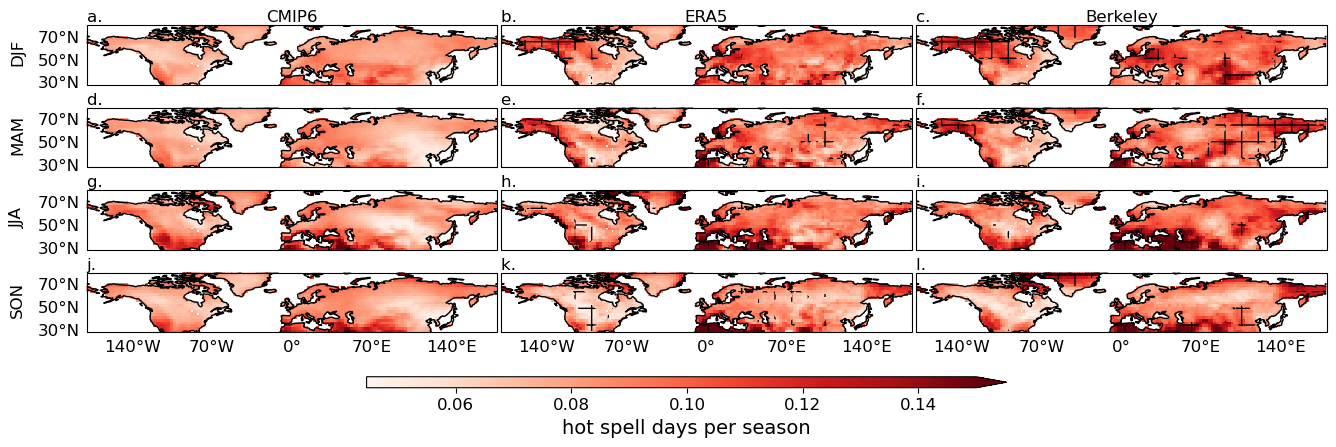

In [46]:
#plot
# dats1=[heat_seas.htdays.isel(season=0),heat_seas.htdays.isel(season=1),heat_seas.htdays.isel(season=2),heat_seas.htdays.isel(season=3)]
# dats2=[heatera_seas.t2m.isel(season=0),heatera_seas.t2m.isel(season=1),heatera_seas.t2m.isel(season=2),heatera_seas.t2m.isel(season=3)]
# dats3=[heatbk_seas.t2m.isel(season=0),heatbk_seas.t2m.isel(season=1),heatbk_seas.t2m.isel(season=2),heatbk_seas.t2m.isel(season=3)]

#dats2=[heat_seasonal_pvalues.pvalues.isel(season=0),heat_seasonal_pvalues.pvalues.isel(season=1),heat_seasonal_pvalues.pvalues.isel(season=2),heat_seasonal_pvalues.pvalues.isel(season=3)]

titles=heat_seas.season.values
#map_plotter(dats,2,2,4,titles,cmap='Reds',vmax=0.05,height=5)

fig=plt.figure(figsize=(16,5.5))
numplots=np.arange(1,5)

order=np.array([0,2,1,3])
for i in range (4):
    ax=fig.add_subplot(4,3,3*numplots[i]-2,projection=ccrs.PlateCarree())
    m=heat_seas.htdays.isel(season=order[i]).plot(ax=ax,vmax=0.15,cmap='Reds',transform=ccrs.PlateCarree(),extend='max',add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

    

    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    
#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    ax.coastlines()
    if i==0:
        ax.set_title('CMIP6',fontsize=12, y=0.92)
    else:
        ax.set_title('')
    ax.set_title(letters[3*i],loc='left',fontsize=12, y=0.92)
    ax.text(-0.15, 0.55, titles[order[i]], va='bottom', ha='center',rotation='vertical', rotation_mode='anchor',transform=ax.transAxes, fontsize=12)
#     if titles.any():
#         ax.set_title('CMIP6 '+titles[i])
    if i<3:
        gl.bottom_labels = False
        
    ax=fig.add_subplot(4,3,3*numplots[i]-1,projection=ccrs.PlateCarree())
    m=heatera_seas.t2m.isel(season=order[i]).plot(ax=ax,vmax=0.15,cmap='Reds',transform=ccrs.PlateCarree(),extend='max',add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

    ax.contourf(era_hatch1.longitude,era_hatch1.latitude, era_hatch1.isel(season=order[i]),hatches='++++' ,alpha=0)
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = False
#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    ax.coastlines()
    
    ax.set_title(letters[3*i+1],loc='left',fontsize=12, y=0.92)
    if i==0:
        ax.set_title('ERA5',fontsize=12, y=0.92)
    else:
        ax.set_title('')
    
    if i<3:
        gl.bottom_labels = False
        
    ax=fig.add_subplot(4,3,3*numplots[i],projection=ccrs.PlateCarree())
    m=heatbk_seas.t2m.isel(season=order[i]).plot(ax=ax,vmax=0.15,cmap='Reds',transform=ccrs.PlateCarree(),extend='max',add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

    ax.contourf(bk_hatch1.longitude,bk_hatch1.latitude, bk_hatch1.isel(season=order[i]),hatches='++++' ,alpha=0)
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = False
#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    ax.coastlines()
    
    #ax.text(0.04, 0.96, letters[3*i+2], transform=ax.transAxes, verticalalignment='bottom', horizontalalignment='left', fontsize=12, color='black')
    ax.set_title(letters[3*i+2],loc='left',fontsize=12, y=0.92)
    
    if i==0:
        ax.set_title('Berkeley', y=0.92)
    else:
        ax.set_title('')
    if i<3:
        gl.bottom_labels = False
#     if i%2>0:
#         gl.left_labels = False
        
cbar_ax = fig.add_axes([0.3, 0.2, 0.4, 0.02])
cbl=fig.colorbar(m, cax=cbar_ax, extend='max',orientation='horizontal')

cbl.set_label(label="hot spell days per season",size=14)
cbl.ax.tick_params(labelsize=12)
#plt.tight_layout()
plt.subplots_adjust(hspace=0.0001, wspace=0.01, bottom=0.28)

#plt.tight_layout()
plt.savefig('plots_sept/heatwave_mmm_era_bk_tmean_clim_2021.png')
plt.show()

In [ ]:
#plot
# dats1=[heat_seas.htdays.isel(season=0),heat_seas.htdays.isel(season=1),heat_seas.htdays.isel(season=2),heat_seas.htdays.isel(season=3)]
# dats2=[heatera_seas.t2m.isel(season=0),heatera_seas.t2m.isel(season=1),heatera_seas.t2m.isel(season=2),heatera_seas.t2m.isel(season=3)]
# dats3=[heatbk_seas.t2m.isel(season=0),heatbk_seas.t2m.isel(season=1),heatbk_seas.t2m.isel(season=2),heatbk_seas.t2m.isel(season=3)]

#dats2=[heat_seasonal_pvalues.pvalues.isel(season=0),heat_seasonal_pvalues.pvalues.isel(season=1),heat_seasonal_pvalues.pvalues.isel(season=2),heat_seasonal_pvalues.pvalues.isel(season=3)]

titles=heat_seas.season.values
#map_plotter(dats,2,2,4,titles,cmap='Reds',vmax=0.05,height=5)

fig=plt.figure(figsize=(16,5.5))
numplots=np.arange(1,5)

order=np.array([0,2,1,3])
for i in range (4):
    ax=fig.add_subplot(4,3,3*numplots[i]-2,projection=ccrs.PlateCarree())
    m=heat_seas.htdays.isel(season=order[i]).plot(ax=ax,vmax=0.15,cmap='Reds',transform=ccrs.PlateCarree(),extend='max',add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

    

    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    
#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    ax.coastlines()
    if i==0:
        ax.set_title('CMIP6',fontsize=12, y=0.92)
    else:
        ax.set_title('')
    ax.set_title(letters[3*i],loc='left',fontsize=12, y=0.92)
    ax.text(-0.15, 0.55, titles[order[i]], va='bottom', ha='center',rotation='vertical', rotation_mode='anchor',transform=ax.transAxes, fontsize=12)
#     if titles.any():
#         ax.set_title('CMIP6 '+titles[i])
    if i<3:
        gl.bottom_labels = False
        
    ax=fig.add_subplot(4,3,3*numplots[i]-1,projection=ccrs.PlateCarree())
    m=heatera_seas.t2m.isel(season=order[i]).plot(ax=ax,vmax=0.15,cmap='Reds',transform=ccrs.PlateCarree(),extend='max',add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

    ax.contourf(era_hatch1.longitude,era_hatch1.latitude, era_hatch1.isel(season=order[i]),hatches='++++' ,alpha=0)
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = False
#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    ax.coastlines()
    
    ax.set_title(letters[3*i+1],loc='left',fontsize=12, y=0.92)
    if i==0:
        ax.set_title('ERA5',fontsize=12, y=0.92)
    else:
        ax.set_title('')
    
    if i<3:
        gl.bottom_labels = False
        
    ax=fig.add_subplot(4,3,3*numplots[i],projection=ccrs.PlateCarree())
    m=heatbk_seas.t2m.isel(season=order[i]).plot(ax=ax,vmax=0.15,cmap='Reds',transform=ccrs.PlateCarree(),extend='max',add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

    ax.contourf(bk_hatch1.longitude,bk_hatch1.latitude, bk_hatch1.isel(season=order[i]),hatches='++++' ,alpha=0)
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = False
#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    ax.coastlines()
    
    #ax.text(0.04, 0.96, letters[3*i+2], transform=ax.transAxes, verticalalignment='bottom', horizontalalignment='left', fontsize=12, color='black')
    ax.set_title(letters[3*i+2],loc='left',fontsize=12, y=0.92)
    
    if i==0:
        ax.set_title('Berkeley', y=0.92)
    else:
        ax.set_title('')
    if i<3:
        gl.bottom_labels = False
#     if i%2>0:
#         gl.left_labels = False
        
cbar_ax = fig.add_axes([0.3, 0.2, 0.4, 0.02])
cbl=fig.colorbar(m, cax=cbar_ax, extend='max',orientation='horizontal')

cbl.set_label(label="hot spell days per season",size=14)
cbl.ax.tick_params(labelsize=12)
#plt.tight_layout()
plt.subplots_adjust(hspace=0.0001, wspace=0.01, bottom=0.28)

#plt.tight_layout()
plt.savefig('plots_more/heatwave_mmm_era_bk_tmean_clim_2021.png')
plt.show()

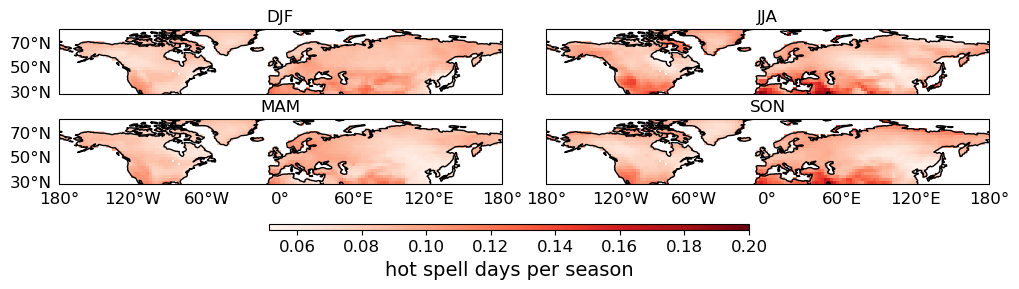

In [45]:
#plot
dats=[heat_seas.htdays.isel(season=0),heat_seas.htdays.isel(season=1),heat_seas.htdays.isel(season=2),heat_seas.htdays.isel(season=3)]
#dats2=[heat_seasonal_pvalues.pvalues.isel(season=0),heat_seasonal_pvalues.pvalues.isel(season=1),heat_seasonal_pvalues.pvalues.isel(season=2),heat_seasonal_pvalues.pvalues.isel(season=3)]

titles=heat_seas.season.values
#map_plotter(dats,2,2,4,titles,cmap='Reds',vmax=0.05,height=5)

fig=plt.figure(figsize=(12,3))
numplots=np.arange(1,5)
for i in range (4):
    ax=fig.add_subplot(2,2,numplots[i],projection=ccrs.PlateCarree())
    m=dats[i].plot(ax=ax,vmax=0.2,cmap='Reds',transform=ccrs.PlateCarree(),add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.top_labels = False
    gl.right_labels = False
#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    ax.coastlines()
    if titles.any():
        ax.set_title(titles[i])
    if i<2:
        gl.bottom_labels = False
    if i%2>0:
        gl.left_labels = False
cbar_ax = fig.add_axes([0.3, 0.17, 0.4, 0.02])
cbl=fig.colorbar(m, cax=cbar_ax,orientation='horizontal')
cbl.set_label(label="hot spell days per season",size=14)
cbl.ax.tick_params(labelsize=12)
#plt.tight_layout()
plt.subplots_adjust(hspace=0.0001, wspace=0.1, bottom=0.28)

# plt.tight_layout()
plt.savefig('heatwave_mmm_tmean_clim.png')
plt.show()

In [7]:
#latvar
clim_annual_mn2=heat_mult21.groupby('time.season').mean().mean(dim='season')
clim_annual_mn2_era=heat_midlat21.groupby('time.season').mean().mean(dim='season')
clim_annual_mn2_bk=heatbk_midlat.groupby('time.season').mean().mean(dim='season')

climseas_mn =heat_mult21.groupby('time.season').mean()
climseas_mn_era=heat_midlat21.groupby('time.season').mean()
climseas_mn_bk=heatbk_midlat.groupby('time.season').mean()

clim_dif_cmip=((climseas_mn-clim_annual_mn2).mean(dim='longitude'))
clim_dif_cmip_mean=clim_dif_cmip.mean(dim='models')
clim_dif_cmip_upper=clim_dif_cmip.quantile(0.975,dim='models')
clim_dif_cmip_lower=clim_dif_cmip.quantile(0.025,dim='models')
clim_dif_era=((climseas_mn_era - clim_annual_mn2_era).mean(dim='longitude'))
clim_dif_bk=((climseas_mn_bk - clim_annual_mn2_bk).mean(dim='longitude'))

## Detrended Tmean

In [8]:
#models
###'HadGEM3-GC31-MM'
models1=['ACCESS-CM2','AWI-CM-1-1-MR','BCC-CSM2-MR', 'CanESM5','CESM2','CMCC-ESM2','CNRM-ESM2-1','EC-Earth3-CC','GFDL-ESM4','IITM-ESM','INM-CM5-0','KIOST-ESM','MIROC6','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','NorESM2-MM','TaiESM1']# temp_datcut={}
models22=['CESM2-WACCM', 'CMCC-CM2-SR5', 'CNRM-CM6-1','INM-CM4-8','IPSL-CM6A-LR', 'MIROC-ES2L','CNRM-CM6-1-HR']
models=models1+models22#['ACCESS-CM2','AWI-CM-1-1-MR','BCC-CSM2-MR', 'CanESM5','CESM2', 'CESM2-WACCM','CMCC-ESM2', 'CMCC-CM2-SR5','CNRM-ESM2-1', 'CNRM-CM6-1', 'CNRM-CM6-1-HR','EC-Earth3-CC','GFDL-ESM4','IITM-ESM','INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR','KIOST-ESM','MIROC6', 'MIROC-ES2L','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','NorESM2-MM','TaiESM1']
len(models)

25

In [9]:
#concatenate models
# detheat_mult=xr.concat(dettoconc,dim='models')
# detheat_mult.to_netcdf('cmip6/heat/cmip6_dethot_25mods_1950-2021.nc')
detheat_mult=xr.open_dataset('cmip6/heat/cmip6_dethot_25mods_1950-2021.nc')
detheat_mult21=detheat_mult.sel(time=slice('1950-01-01','2021-12-31'))

In [10]:
#read ERA5 and berkley

detheat=xr.open_dataset('era5/era5_detrendedtmean_heatdays_1950_2024_regrid.nc')
detheat1=detheat.sortby(detheat.time)
#heat79=cuttimestart(heat1,1979)
detheat_midl=cutmidlat(detheat1)


detheat_midlat=landmask(detheat_midl)
detheat_midlat21=detheat_midlat.sel(time=slice('1950-01-01','2021-12-31'))


detheat_bk=xr.open_dataset('berkley_detrendedtmean_heatdays_1950_2021_regrid.nc')
detheat1_bk=detheat_bk.sortby(detheat_bk.time)
#heat79=cuttimestart(heat1,1979)
detheatbk_midl=cutmidlat(detheat1_bk)

detheatbk_midlat=landmask(detheatbk_midl)

In [11]:
#seasonal average
#detheat_mult21=detheat_mult21.to_dataset(name='htdays')
detheat_seas_m=detheat_mult21.htdays.groupby('time.season').mean(dim=['time']).mean(dim=['models'])
count_days=[90,92,92,91]
detheat_seas=detheat_seas_m.copy()
for i in range(4):
    detheat_seas[i,]=count_days[i]*detheat_seas_m[i,]

# ssns=[]
# detheats=[]
# for i in range(4):
#     detheats.append(detheat_seas.htdays.isel(season=i).stack(z={'latitude','longitude'}).dropna(dim='z').values)
#     ssns.append(str(detheat_seas.htdays.isel(season=i).season.values))
    
detheatera_seas_m=detheat_midlat21.groupby('time.season').mean(dim=['time'])
count_days=[90,92,92,91]
detheatera_seas=detheatera_seas_m.t2m.copy()
for i in range(4):
    detheatera_seas[i,]=count_days[i]*detheatera_seas_m.t2m[i,]
# detheateras=[]
# for i in range(4):
#     detheateras.append(detheatera_seas.t2m.isel(season=i).stack(z={'latitude','longitude'}).dropna(dim='z').values)

detheatbk_seas_m=detheatbk_midlat.groupby('time.season').mean(dim=['time'])
count_days=[90,92,92,91]
detheatbk_seas=detheatbk_seas_m.t2m.copy()
for i in range(4):
    detheatbk_seas[i,]=count_days[i]*detheatbk_seas_m.t2m[i,]
# detheatbks=[]
# for i in range(4):
#     detheatbks.append(detheatbk_seas.t2m.isel(season=i).stack(z={'latitude','longitude'}).dropna(dim='z').values)


In [11]:
#hatching for CMIP CI

cmip_detseasmean_m=detheat_mult21.htdays.groupby('time.season').mean(dim=['time'])
cmip_detseasmean=cmip_detseasmean_m.copy()
for i in range(4):
    cmip_detseasmean[:,i,]=count_days[i]*cmip_detseasmean_m[:,i,]
    
cmip_detseasmean_mmm=cmip_detseasmean.mean(dim=['models'])

cmip_detseasmean_upper1=cmip_detseasmean.quantile(0.975,dim=['models'])
cmip_detseasmean_lower1=cmip_detseasmean.quantile(0.025,dim=['models'])

# cmip_detseasmean_upper2=cmip_detseasmean_mmm+(1.96*cmip_detseasmean.std(dim='models'))
# cmip_detseasmean_lower2=cmip_detseasmean_mmm-(1.96*cmip_detseasmean.std(dim='models'))

era_hatch1=xr.where((detheatera_seas>cmip_detseasmean_upper1)|(detheatera_seas<cmip_detseasmean_lower1), 1,np.nan)
bk_hatch1=xr.where((detheatbk_seas>cmip_detseasmean_upper1)|(detheatbk_seas<cmip_detseasmean_lower1), 1,np.nan)


/home/rwhite/ladmasu/mambaforge/envs/comput/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


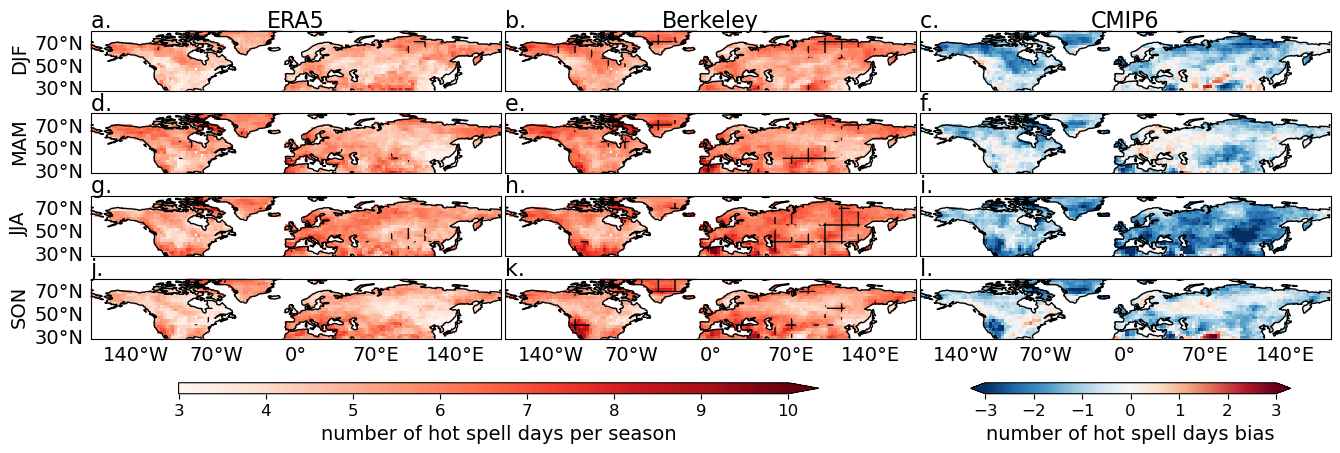

In [12]:
#plot
# dats1=[heat_seas.htdays.isel(season=0),heat_seas.htdays.isel(season=1),heat_seas.htdays.isel(season=2),heat_seas.htdays.isel(season=3)]
# dats2=[heatera_seas.t2m.isel(season=0),heatera_seas.t2m.isel(season=1),heatera_seas.t2m.isel(season=2),heatera_seas.t2m.isel(season=3)]
# dats3=[heatbk_seas.t2m.isel(season=0),heatbk_seas.t2m.isel(season=1),heatbk_seas.t2m.isel(season=2),heatbk_seas.t2m.isel(season=3)]

#dats2=[heat_seasonal_pvalues.pvalues.isel(season=0),heat_seasonal_pvalues.pvalues.isel(season=1),heat_seasonal_pvalues.pvalues.isel(season=2),heat_seasonal_pvalues.pvalues.isel(season=3)]

titles=detheat_seas.season.values
#map_plotter(dats,2,2,4,titles,cmap='Reds',vmax=0.05,height=5)

fig=plt.figure(figsize=(16,5.5))
numplots=np.arange(1,5)

order=np.array([0,2,1,3])
for i in range (4):
    ax=fig.add_subplot(4,3,3*numplots[i]-2,projection=ccrs.PlateCarree())
    m=detheatera_seas.isel(season=order[i]).plot(ax=ax,vmin=3,vmax=10,cmap='Reds',transform=ccrs.PlateCarree(),extend='max',add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

    ax.contourf(era_hatch1.longitude,era_hatch1.latitude, era_hatch1.isel(season=order[i]),hatches='++++' ,alpha=0)
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    
#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 14}
    gl.ylabel_style = {'size': 14}
    ax.coastlines()
    
    ax.set_title(letters[3*i],loc='left',fontsize=16, y=0.92)
    ax.text(-0.15, 0.55, titles[order[i]], va='bottom', ha='center',rotation='vertical', rotation_mode='anchor',transform=ax.transAxes, fontsize=14)

    if i==0:
        ax.set_title('ERA5',fontsize=16, y=0.92)
    else:
        ax.set_title('')
    
    if i<3:
        gl.bottom_labels = False
        
        
    ax=fig.add_subplot(4,3,3*numplots[i]-1,projection=ccrs.PlateCarree())
    m=detheatbk_seas.isel(season=order[i]).plot(ax=ax,vmin=3,vmax=10,cmap='Reds',transform=ccrs.PlateCarree(),extend='max',add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

    ax.contourf(bk_hatch1.longitude,bk_hatch1.latitude, bk_hatch1.isel(season=order[i]),hatches='++++' ,alpha=0)
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = False
#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 14}
    gl.ylabel_style = {'size': 14}
    ax.coastlines()
    
    #ax.text(0.04, 0.96, letters[3*i+2], transform=ax.transAxes, verticalalignment='bottom', horizontalalignment='left', fontsize=12, color='black')
    ax.set_title(letters[3*i+1],loc='left',fontsize=16, y=0.92)
    
    if i==0:
        ax.set_title('Berkeley',fontsize=16, y=0.92)
    else:
        ax.set_title('')
    if i<3:
        gl.bottom_labels = False
#     if i%2>0:
#         gl.left_labels = False
    
    ax=fig.add_subplot(4,3,3*numplots[i],projection=ccrs.PlateCarree())
    m2=(detheat_seas.isel(season=order[i])- detheatbk_seas.isel(season=order[i])).plot(ax=ax,cmap='RdBu_r', vmax=3, vmin=-3,transform=ccrs.PlateCarree(),extend='max',add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

    

    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = False
    
#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 14}
    gl.ylabel_style = {'size': 14}
    ax.coastlines()
    if i==0:
        ax.set_title('CMIP6',fontsize=16, y=0.92)
    else:
        ax.set_title('')
    ax.set_title(letters[3*i+2],loc='left',fontsize=16, y=0.92)
   #     if titles.any():
#         ax.set_title('CMIP6 '+titles[i])
    if i<3:
        gl.bottom_labels = False
           
cbar_ax = fig.add_axes([0.18, 0.2, 0.4, 0.02])
cbl=fig.colorbar(m, cax=cbar_ax, extend='max',orientation='horizontal')

cbl.set_label(label="number of hot spell days per season",size=14)
cbl.ax.tick_params(labelsize=12)

cbar_ax = fig.add_axes([0.675, 0.2, 0.2, 0.02])
cbl=fig.colorbar(m2, cax=cbar_ax, extend='both',orientation='horizontal')

cbl.set_label(label="number of hot spell days bias",size=14)
cbl.ax.tick_params(labelsize=12)
#plt.tight_layout()
plt.subplots_adjust(hspace=0.01, wspace=0.01, bottom=0.28)



#plt.tight_layout()
plt.savefig('plots_more/detrended_hotspell_climatology_supporting.png')
plt.show()

In [ ]:
#plot
# dats1=[heat_seas.htdays.isel(season=0),heat_seas.htdays.isel(season=1),heat_seas.htdays.isel(season=2),heat_seas.htdays.isel(season=3)]
# dats2=[heatera_seas.t2m.isel(season=0),heatera_seas.t2m.isel(season=1),heatera_seas.t2m.isel(season=2),heatera_seas.t2m.isel(season=3)]
# dats3=[heatbk_seas.t2m.isel(season=0),heatbk_seas.t2m.isel(season=1),heatbk_seas.t2m.isel(season=2),heatbk_seas.t2m.isel(season=3)]

#dats2=[heat_seasonal_pvalues.pvalues.isel(season=0),heat_seasonal_pvalues.pvalues.isel(season=1),heat_seasonal_pvalues.pvalues.isel(season=2),heat_seasonal_pvalues.pvalues.isel(season=3)]

titles=detheat_seas.season.values
#map_plotter(dats,2,2,4,titles,cmap='Reds',vmax=0.05,height=5)

fig=plt.figure(figsize=(16,5.5))
numplots=np.arange(1,5)

order=np.array([0,2,1,3])
for i in range (4):
    ax=fig.add_subplot(4,3,3*numplots[i]-2,projection=ccrs.PlateCarree())
    m=detheatera_seas.isel(season=order[i]).plot(ax=ax,vmin=0,vmax=9,cmap='Reds',transform=ccrs.PlateCarree(),extend='max',add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

    ax.contourf(era_hatch1.longitude,era_hatch1.latitude, era_hatch1.isel(season=order[i]),hatches='++++' ,alpha=0)
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    
#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    ax.coastlines()
    
    ax.set_title(letters[3*i],loc='left',fontsize=12, y=0.92)
    ax.text(-0.15, 0.55, titles[order[i]], va='bottom', ha='center',rotation='vertical', rotation_mode='anchor',transform=ax.transAxes, fontsize=12)

    if i==0:
        ax.set_title('ERA5',fontsize=12, y=0.92)
    else:
        ax.set_title('')
    
    if i<3:
        gl.bottom_labels = False
        
        
    ax=fig.add_subplot(4,3,3*numplots[i]-1,projection=ccrs.PlateCarree())
    m=detheatbk_seas.isel(season=order[i]).plot(ax=ax,vmin=0,vmax=9,cmap='Reds',transform=ccrs.PlateCarree(),extend='max',add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

    ax.contourf(bk_hatch1.longitude,bk_hatch1.latitude, bk_hatch1.isel(season=order[i]),hatches='++++' ,alpha=0)
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = False
#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    ax.coastlines()
    
    #ax.text(0.04, 0.96, letters[3*i+2], transform=ax.transAxes, verticalalignment='bottom', horizontalalignment='left', fontsize=12, color='black')
    ax.set_title(letters[3*i+1],loc='left',fontsize=12, y=0.92)
    
    if i==0:
        ax.set_title('Berkeley', y=0.92)
    else:
        ax.set_title('')
    if i<3:
        gl.bottom_labels = False
#     if i%2>0:
#         gl.left_labels = False
    
    ax=fig.add_subplot(4,3,3*numplots[i],projection=ccrs.PlateCarree())
    m2=(detheat_seas.isel(season=order[i])- detheatera_seas.isel(season=order[i])).plot(ax=ax,cmap='RdBu_r', vmax=3, vmin=-3,transform=ccrs.PlateCarree(),extend='max',add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

    

    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = False
    
#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    ax.coastlines()
    if i==0:
        ax.set_title('CMIP6',fontsize=12, y=0.92)
    else:
        ax.set_title('')
    ax.set_title(letters[3*i+2],loc='left',fontsize=12, y=0.92)
   #     if titles.any():
#         ax.set_title('CMIP6 '+titles[i])
    if i<3:
        gl.bottom_labels = False
    
    
    
        
cbar_ax = fig.add_axes([0.18, 0.2, 0.4, 0.02])
cbl=fig.colorbar(m, cax=cbar_ax, extend='max',orientation='horizontal')

cbl.set_label(label="number of hot spell days per season",size=14)
cbl.ax.tick_params(labelsize=12)

cbar_ax = fig.add_axes([0.675, 0.2, 0.2, 0.02])
cbl=fig.colorbar(m2, cax=cbar_ax, extend='both',orientation='horizontal')

cbl.set_label(label="number of hot spell days bias",size=14)
cbl.ax.tick_params(labelsize=12)
#plt.tight_layout()
plt.subplots_adjust(hspace=0.0001, wspace=0.01, bottom=0.28)



#plt.tight_layout()
plt.savefig('plots_more/detrended_hotspell_climatology_supporting.png')
plt.show()

In [12]:
#latvar
detclimseas_mn =detheat_mult21.groupby('time.season').mean()
detclimseas_mn_era=detheat_midlat21.groupby('time.season').mean()
detclimseas_mn_bk=detheatbk_midlat.groupby('time.season').mean()

detclim_annual_mn2=detheat_seas.mean(dim='season')
detclim_annual_mn2_era=detheatera_seas.mean(dim='season')
detclim_annual_mn2_bk=detheatbk_seas.mean(dim='season')



detclim_dif_cmip=((detclimseas_mn-detclim_annual_mn2).mean(dim='longitude'))
detclim_dif_cmip_mean=detclim_dif_cmip.mean(dim='models')
detclim_dif_cmip_upper=detclim_dif_cmip.quantile(0.975,dim='models')
detclim_dif_cmip_lower=detclim_dif_cmip.quantile(0.025,dim='models')
detclim_dif_era=((detclimseas_mn_era - detclim_annual_mn2_era).mean(dim='longitude'))
detclim_dif_bk=((detclimseas_mn_bk - detclim_annual_mn2_bk).mean(dim='longitude'))

## heatwave trends

In [13]:
#cmip
trseas_mn=xr.open_dataset('cmip6/heat/cmip6_hot_trend_25mods_1950-2021.nc').htdays
pvseas_mn=xr.open_dataset('cmip6/heat/cmip6_hot_trendpvals_25mods_1950-2021.nc').htdays

In [14]:
#era5 trend
trseas_mn_era=xr.open_dataset('era5/era5_hot_trend_final_1950-2021.nc').htdays
pvseas_mn_era=xr.open_dataset('era5/era5_hot_trendpvals_final_1950-2021.nc').htdays

In [15]:
#berkley trend
trseas_mn_bk= xr.open_dataset('berkeley/berkeley_hot_trend_final_1950-2021.nc').htdays
pvseas_mn_bk= xr.open_dataset('berkeley/berkeley_hot_trendpvals_final_1950-2021.nc').htdays

In [16]:
#sum for seasonal
count_days=[90,92,92,91]
eratr_seas=trseas_mn_era.copy()
for i in range(4):
    eratr_seas[i,]=count_days[i]*trseas_mn_era[i,]
    
bktr_seas=trseas_mn_bk.copy()
for i in range(4):
    bktr_seas[i,]=count_days[i]*trseas_mn_bk[i,]

cmiptr_seas=trseas_mn.copy()
for i in range(4):
    cmiptr_seas[i,]=count_days[i]*trseas_mn[i,]

In [17]:
#hatching for CMIP CI
trseas_heat=cmiptr_seas.copy(deep=True)
trseasera_heat=eratr_seas.copy(deep=True)
trseasbk_heat=bktr_seas.copy(deep=True)

cmip_seastr_upper1=trseas_heat.quantile(0.975,dim=['models'])
cmip_seastr_lower1=trseas_heat.quantile(0.025,dim=['models'])

era_hatch_tr=xr.where((trseasera_heat>cmip_seastr_upper1)|(trseasera_heat<cmip_seastr_lower1), 1,np.nan)
bk_hatch_tr=xr.where((trseasbk_heat>cmip_seastr_upper1)|(trseasbk_heat<cmip_seastr_lower1), 1,np.nan)



/home/rwhite/ladmasu/mambaforge/envs/comput/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


In [17]:
#lat vatiations


trseas_heat=cmiptr_seas#.mean(dim='season')
trseasera_heat=eratr_seas#.mean(dim='season')
trseasbk_heat=bktr_seas#.mean(dim='season')

trend_dif_cmip_or=((trseas_heat).mean(dim='longitude'))*10
trend_dif_cmip_mean_or=trend_dif_cmip_or.mean(dim='models')
trend_dif_cmip_upper_or=trend_dif_cmip_or.quantile(0.975,dim='models')
trend_dif_cmip_lower_or=trend_dif_cmip_or.quantile(0.025,dim='models')

trend_dif_era_or=((trseasera_heat).mean(dim='longitude'))*10
trend_dif_bk_or=((trseasbk_heat).mean(dim='longitude'))*10

In [44]:
print(0.5*(1.32+1.24))
print(0.5*(0.67+0.84))

print(0.5*(1.14+0.967))

1.28
0.755
1.0534999999999999


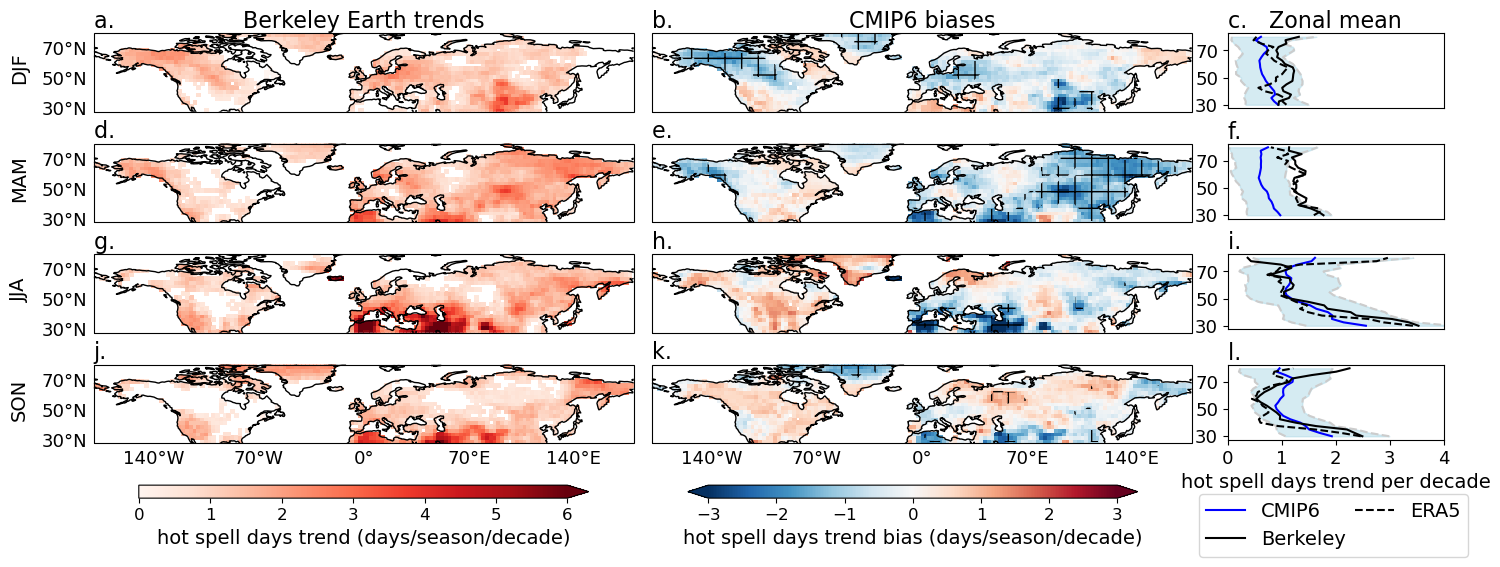

In [59]:
#plot
titles=heat_seas.mean().season.values
#map_plotter(dats,2,2,4,titles,cmap='Reds',vmax=0.05,height=5)

fig=plt.figure(figsize=(18,6.5))
numplots=np.arange(1,5)
gs = fig.add_gridspec(5,4)

order=np.array([0,2,1,3])
for i in range (4):
    if i ==0:
        ax=fig.add_axes([0.1,0.75,0.3,0.15],projection=ccrs.PlateCarree())
    elif i ==1:
        ax=fig.add_axes([0.1,0.58,0.3,0.15],projection=ccrs.PlateCarree())
    elif i ==2:
        ax=fig.add_axes([0.1,0.41,0.3,0.15],projection=ccrs.PlateCarree())
    else:
        ax=fig.add_axes([0.1,0.24,0.3,0.15],projection=ccrs.PlateCarree())
        
     
    pvs=xr.where(pvseas_mn_bk.isel(season=order[i])<0.05,trseasbk_heat.isel(season=order[i]),np.nan) 
#     pval=xr.where(pvs>0.8,trseas_mn_era.isel(season=order[i]),np.nan) 
    m1=(10*pvs).plot(ax=ax, vmax=6,vmin=0,cmap='Reds',transform=ccrs.PlateCarree(),add_colorbar=False)

    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    #gl.left_labels = False
    
    ax.set_title(letters[3*i],loc='left',fontsize=16, y=0.96)
    ax.text(-0.12, 0.55, titles[order[i]], va='bottom', ha='center',rotation='vertical', rotation_mode='anchor',transform=ax.transAxes, fontsize=14)
 
    ax.coastlines()
    if i==0:
        ax.set_title('Berkeley Earth trends', fontsize=16, y=0.96)
    else:
        ax.set_title('')
    
    if i<3:
        gl.bottom_labels = False
           
        
    if i ==0:
        ax=fig.add_axes([0.41,0.75,0.3,0.15],projection=ccrs.PlateCarree())
    elif i ==1:
        ax=fig.add_axes([0.41,0.58,0.3,0.15],projection=ccrs.PlateCarree())
    elif i ==2:
        ax=fig.add_axes([0.41,0.41,0.3,0.15],projection=ccrs.PlateCarree())
    else:
        ax=fig.add_axes([0.41,0.24,0.3,0.15],projection=ccrs.PlateCarree())

    difs=10*trseas_heat.isel(season=order[i]).mean(dim='models') - 10*trseasbk_heat.isel(season=order[i])

    m2=(difs).plot(ax=ax, cmap='RdBu_r', vmin=-3,vmax=3,transform=ccrs.PlateCarree(),add_colorbar=False)
    ax.contourf(bk_hatch_tr.longitude,bk_hatch_tr.latitude, bk_hatch_tr.isel(season=order[i]),hatches='++++' ,alpha=0)
   
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False

    gl.left_labels = False
    
#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    ax.coastlines()
    
    ax.set_title(letters[3*i+1],loc='left',fontsize=16, y=0.96)
    
    if i==0:
        ax.set_title('CMIP6 biases', fontsize=16,y=0.96)
    else:
        ax.set_title('')
    
    if i<3:
        gl.bottom_labels = False

    if i==0:
        ax=fig.add_axes([0.73,0.77,0.12,0.115])
    elif i==1:
        ax=fig.add_axes([0.73,0.6,0.12,0.115])

    elif i==2:
        ax=fig.add_axes([0.73,0.43,0.12,0.115])
        #ax.set_yticks([])
    else:
        ax=fig.add_axes([0.73,0.26,0.12,0.115])
        #ax.set_yticks([])
        
    lat=trend_dif_cmip_mean_or.latitude
    ax.plot(trend_dif_cmip_mean_or.isel(season=order[i]),lat,  color='blue', label='CMIP6')
    ax.plot(trend_dif_cmip_upper_or.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.plot(trend_dif_cmip_lower_or.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.fill_betweenx(lat,trend_dif_cmip_lower_or.isel(season=order[i]), trend_dif_cmip_upper_or.isel(season=order[i]), color='lightblue', alpha=0.5)
    #ax.axvline(color='k', linestyle='--')
    ax.plot(trend_dif_bk_or.isel(season=order[i]),lat, color='black', label='Berkeley')
    ax.plot(trend_dif_era_or.isel(season=order[i]),lat,linestyle='--', color='black', label='ERA5')
    
    #ax.set_title(titles[i])
    ax.set_xlim([0,4])
    #ax.set_ylabel('Latitude',fontsize=12)
    ax.set_xticks(np.arange(0, 5, 1))
    ax.set_yticks([30,50,70])
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    ax.set_title(letters[3*i+2],loc='left',fontsize=16, y=0.96)
    if i==0:
        ax.set_title('Zonal mean', fontsize=16,y=0.96)
    else:
        ax.set_title('')
        
    if i<3:
        ax.set_xticks([])
    else:
        ax.set_xlabel("hot spell days trend per decade",fontsize=14)
    if i==3:
        plt.legend(loc='lower left', ncol=2, bbox_to_anchor=(-0.18, -1.7),columnspacing=0.5, fontsize=14)
    
#     if i==2 or i==3:

#         ax.set_ylabel(' ')
#     elif i==3:
#         plt.legend()
#     if i%2>0:
#         gl.left_labels = False
        
cbar_ax = fig.add_axes([0.125, 0.17, 0.25, 0.02])
cbl=fig.colorbar(m1, cax=cbar_ax, extend='max',orientation='horizontal')
cbl.set_label(label="hot spell days trend (days/season/decade)",size=14)
cbl.ax.tick_params(labelsize=12)

cbar_ax = fig.add_axes([0.43, 0.17, 0.25, 0.02])
cbl=fig.colorbar(m2, cax=cbar_ax, extend='both',orientation='horizontal')
cbl.set_label(label="hot spell days trend bias (days/season/decade)",size=14)
cbl.ax.tick_params(labelsize=12)
#plt.tight_layout()
plt.subplots_adjust(hspace=0.03, wspace=0.01, bottom=0.28)

# plt.tight_layout()
plt.savefig('plots_more/hotspell_trends_per_season_main.png')
plt.show()

In [18]:
#lat vatiations seasondev
trseas_heat=cmiptr_seas.copy(deep=True)
trseasera_heat=eratr_seas.copy(deep=True)
trseasbk_heat=bktr_seas.copy(deep=True)

trend_annual_mn2=trseas_heat.mean(dim='season')
trend_annual_mn2_era=trseasera_heat.mean(dim='season')
trend_annual_mn2_bk=trseasbk_heat.mean(dim='season')

trend_ann_cmip=trend_annual_mn2.mean(dim='longitude')*10
trend_dif_cmip=((trseas_heat-trend_annual_mn2).mean(dim='longitude'))*10
trend_dif_cmip_mean=trend_dif_cmip.mean(dim='models')
trend_dif_cmip_upper=trend_dif_cmip.quantile(0.975,dim='models')
trend_dif_cmip_lower=trend_dif_cmip.quantile(0.025,dim='models')

trend_ann_era= trend_annual_mn2_era.mean(dim='longitude')*10
trend_dif_era=((trseasera_heat - trend_annual_mn2_era).mean(dim='longitude'))*10
trend_ann_bk=trend_annual_mn2_bk.mean(dim='longitude')*10
trend_dif_bk=((trseasbk_heat - trend_annual_mn2_bk).mean(dim='longitude'))*10

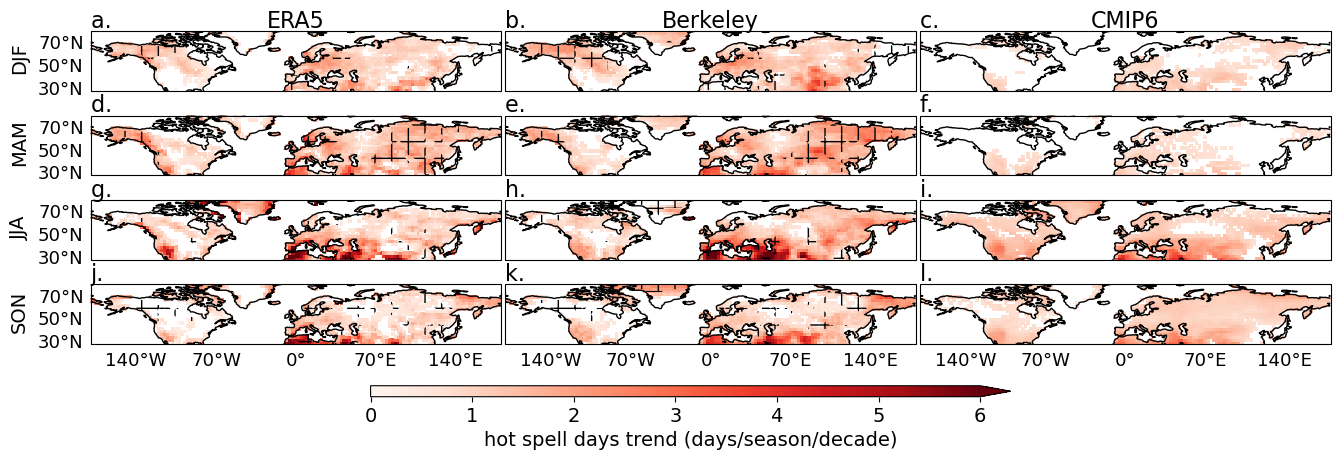

In [72]:
#plot with berk
#plot
# dats1=[heat_seas.htdays.isel(season=0),heat_seas.htdays.isel(season=1),heat_seas.htdays.isel(season=2),heat_seas.htdays.isel(season=3)]
# dats2=[heatera_seas.t2m.isel(season=0),heatera_seas.t2m.isel(season=1),heatera_seas.t2m.isel(season=2),heatera_seas.t2m.isel(season=3)]
# dats3=[heatbk_seas.t2m.isel(season=0),heatbk_seas.t2m.isel(season=1),heatbk_seas.t2m.isel(season=2),heatbk_seas.t2m.isel(season=3)]

#dats2=[heat_seasonal_pvalues.pvalues.isel(season=0),heat_seasonal_pvalues.pvalues.isel(season=1),heat_seasonal_pvalues.pvalues.isel(season=2),heat_seasonal_pvalues.pvalues.isel(season=3)]

titles=heat_seas.mean().season.values
#map_plotter(dats,2,2,4,titles,cmap='Reds',vmax=0.05,height=5)

fig=plt.figure(figsize=(16,5.5))
numplots=np.arange(1,5)

order=np.array([0,2,1,3])
for i in range (4):
    ax=fig.add_subplot(4,3,3*numplots[i]-2,projection=ccrs.PlateCarree())
    
    pvs=xr.where(pvseas_mn_era.isel(season=order[i])<0.05,trseasera_heat.isel(season=order[i]),np.nan) 
#     pval=xr.where(pvs>0.8,trseas_mn_era.isel(season=order[i]),np.nan) 
    m1=(10*pvs).plot(ax=ax, vmax=6,vmin=0,cmap='Reds',transform=ccrs.PlateCarree(),add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

    ax.contourf(era_hatch_tr.longitude,era_hatch_tr.latitude, era_hatch_tr.isel(season=order[i]),hatches='++++' ,alpha=0)
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    ax.text(-0.15, 0.55, titles[order[i]], va='bottom', ha='center',rotation='vertical', rotation_mode='anchor',transform=ax.transAxes, fontsize=14)

#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    ax.coastlines()
    
    ax.set_title(letters[3*i],loc='left',fontsize=16, y=0.92)
    if i==0:
        ax.set_title('ERA5',fontsize=16, y=0.92)
    else:
        ax.set_title('')
    
    if i<3:
        gl.bottom_labels = False
        
    ax=fig.add_subplot(4,3,3*numplots[i]-1,projection=ccrs.PlateCarree())
    
    pvs=xr.where(pvseas_mn_bk.isel(season=order[i])<0.05,trseasbk_heat.isel(season=order[i]),np.nan) 
#     pval=xr.where(pvs>0.8,trseas_mn_era.isel(season=order[i]),np.nan) 
    m1=(10*pvs).plot(ax=ax, vmax=6,vmin=0,cmap='Reds',transform=ccrs.PlateCarree(),add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

    ax.contourf(bk_hatch_tr.longitude,bk_hatch_tr.latitude, bk_hatch_tr.isel(season=order[i]),hatches='++++' ,alpha=0)
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = False
#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    ax.coastlines()
    
    #ax.text(0.04, 0.96, letters[3*i+2], transform=ax.transAxes, verticalalignment='bottom', horizontalalignment='left', fontsize=12, color='black')
    ax.set_title(letters[3*i+1],loc='left',fontsize=16, y=0.92)
    
    if i==0:
        ax.set_title('Berkeley',fontsize=16, y=0.92)
    else:
        ax.set_title('')
    if i<3:
        gl.bottom_labels = False
#     if i%2>0:
#         gl.left_labels = False
    
        
    ax=fig.add_subplot(4,3,3*numplots[i],projection=ccrs.PlateCarree())
    
    pvs1=xr.where(trseas_heat.isel(season=order[i])>0,1,0) 
    pval=xr.where((pvs1.mean(dim='models')>0.8),trseas_heat.isel(season=order[i]).mean(dim='models'),np.nan) 
#     pval=xr.where(pvs>0.8,trseas_mn_era.isel(season=order[i]),np.nan) 
    m1=(10*pval).plot(ax=ax, vmax=6,vmin=0,cmap='Reds',transform=ccrs.PlateCarree(),add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

    

    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = False
#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    ax.coastlines()
    if i==0:
        ax.set_title('CMIP6',fontsize=16, y=0.92)
    else:
        ax.set_title('')
    ax.set_title(letters[3*i+2],loc='left',fontsize=16, y=0.92)
    #     if titles.any():
#         ax.set_title('CMIP6 '+titles[i])
    if i<3:
        gl.bottom_labels = False
        

        
cbar_ax = fig.add_axes([0.3, 0.2, 0.4, 0.02])
cbl=fig.colorbar(m1, cax=cbar_ax, extend='max',orientation='horizontal')

cbl.set_label(label="hot spell days trend (days/season/decade)",size=14)
cbl.ax.tick_params(labelsize=14)
#plt.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.01, bottom=0.28)

#plt.tight_layout()
plt.savefig('plots_more/hotspell_trends_supporting.png')
plt.show()

In [36]:
#hatching for CMIP CI
trseas_mndev=trseas_heat-trseas_heat.mean(dim='season')
cmip_seastr_upper1=trseas_mndev.quantile(0.975,dim=['models'])
cmip_seastr_lower1=trseas_mndev.quantile(0.025,dim=['models'])


trseas_mn_eradev=trseasera_heat-trseasera_heat.mean(dim='season')
trseas_mn_bkdev=trseasbk_heat-trseasbk_heat.mean(dim='season')

era_hatch_tr=xr.where((trseas_mn_eradev>cmip_seastr_upper1)|(trseas_mn_eradev<cmip_seastr_lower1), 1,np.nan)
bk_hatch_tr=xr.where((trseas_mn_bkdev>cmip_seastr_upper1)|(trseas_mn_bkdev<cmip_seastr_lower1), 1,np.nan)



/home/rwhite/ladmasu/mambaforge/envs/comput/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


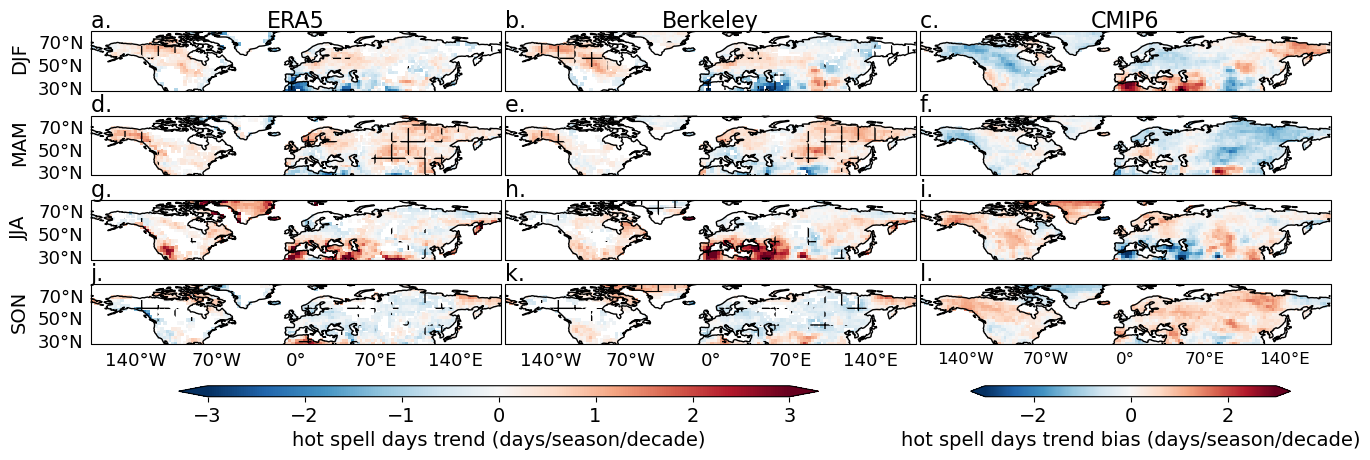

In [38]:
#plot ssndev
# dats1=[heat_seas.htdays.isel(season=0),heat_seas.htdays.isel(season=1),heat_seas.htdays.isel(season=2),heat_seas.htdays.isel(season=3)]
# dats2=[heatera_seas.t2m.isel(season=0),heatera_seas.t2m.isel(season=1),heatera_seas.t2m.isel(season=2),heatera_seas.t2m.isel(season=3)]
# dats3=[heatbk_seas.t2m.isel(season=0),heatbk_seas.t2m.isel(season=1),heatbk_seas.t2m.isel(season=2),heatbk_seas.t2m.isel(season=3)]

#dats2=[heat_seasonal_pvalues.pvalues.isel(season=0),heat_seasonal_pvalues.pvalues.isel(season=1),heat_seasonal_pvalues.pvalues.isel(season=2),heat_seasonal_pvalues.pvalues.isel(season=3)]

titles=trseas_mn_eradev.season.values
#map_plotter(dats,2,2,4,titles,cmap='Reds',vmax=0.05,height=5)

fig=plt.figure(figsize=(16,5.5))
numplots=np.arange(1,5)

order=np.array([0,2,1,3])
for i in range (4):
    ax=fig.add_subplot(4,3,3*numplots[i]-2,projection=ccrs.PlateCarree())
    pvs=xr.where(pvseas_mn_era.isel(season=order[i])<0.05,trseas_mn_eradev.isel(season=order[i]),np.nan) 
#     pval=xr.where(pvs>0.8,trseas_mn_era.isel(season=order[i]),np.nan) 
    m1=(10*pvs).plot(ax=ax, vmax=3,vmin=-3,cmap='RdBu_r',transform=ccrs.PlateCarree(),add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

    ax.contourf(era_hatch_tr.longitude,era_hatch_tr.latitude, era_hatch_tr.isel(season=order[i]),hatches='++++' ,alpha=0)
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    
#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    ax.coastlines()
    
    ax.set_title(letters[3*i],loc='left',fontsize=16, y=0.92)
    ax.text(-0.15, 0.55, titles[order[i]], va='bottom', ha='center',rotation='vertical', rotation_mode='anchor',transform=ax.transAxes, fontsize=14)

    if i==0:
        ax.set_title('ERA5',fontsize=16, y=0.92)
    else:
        ax.set_title('')
    
    if i<3:
        gl.bottom_labels = False
        
        
    ax=fig.add_subplot(4,3,3*numplots[i]-1,projection=ccrs.PlateCarree())
    pvs=xr.where(pvseas_mn_bk.isel(season=order[i])<0.05,trseas_mn_bkdev.isel(season=order[i]),np.nan) 
#     pval=xr.where(pvs>0.8,trseas_mn_era.isel(season=order[i]),np.nan) 
    m1=(10*pvs).plot(ax=ax, vmax=3,vmin=-3,cmap='RdBu_r',transform=ccrs.PlateCarree(),add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

    ax.contourf(bk_hatch_tr.longitude,bk_hatch_tr.latitude, bk_hatch_tr.isel(season=order[i]),hatches='++++' ,alpha=0)
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = False
#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    ax.coastlines()
    
    #ax.text(0.04, 0.96, letters[3*i+2], transform=ax.transAxes, verticalalignment='bottom', horizontalalignment='left', fontsize=12, color='black')
    ax.set_title(letters[3*i+1],loc='left',fontsize=16, y=0.92)
    
    if i==0:
        ax.set_title('Berkeley',fontsize=16, y=0.92)
    else:
        ax.set_title('')
    if i<3:
        gl.bottom_labels = False
#     if i%2>0:
#         gl.left_labels = False
    
    ax=fig.add_subplot(4,3,3*numplots[i],projection=ccrs.PlateCarree())
    difs=10*trseas_mndev.isel(season=order[i]).mean(dim='models') - 10*trseas_mn_bkdev.isel(season=order[i])
    m2=(difs).plot(ax=ax,cmap='RdBu_r', vmax=3, vmin=-3,transform=ccrs.PlateCarree(),extend='max',add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

    

    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = False
    
#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    ax.coastlines()
    if i==0:
        ax.set_title('CMIP6',fontsize=16, y=0.92)
    else:
        ax.set_title('')
    ax.set_title(letters[3*i+2],loc='left',fontsize=16, y=0.92)
   #     if titles.any():
#         ax.set_title('CMIP6 '+titles[i])
    if i<3:
        gl.bottom_labels = False
    
    
    
cbar_ax = fig.add_axes([0.18, 0.2, 0.4, 0.02])
cbl=fig.colorbar(m1, cax=cbar_ax, extend='both',orientation='horizontal')
cbl.set_label(label="hot spell days trend (days/season/decade)",size=14)
cbl.ax.tick_params(labelsize=14)

cbar_ax = fig.add_axes([0.675, 0.2, 0.2, 0.02])
cbl=fig.colorbar(m2, cax=cbar_ax, extend='both',orientation='horizontal')
cbl.set_label(label="hot spell days trend bias (days/season/decade)",size=14)
cbl.ax.tick_params(labelsize=14)
#plt.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.01, bottom=0.28)



# plt.tight_layout()
plt.savefig('plots_more/hotspell_devtrend_supporting.png')
plt.show()

## Temperature trend

In [19]:
#read cmip
temp_mult=xr.open_dataset('cmip6_tas_day_hist-ssp_25models_1950-2021_regridcon.nc')#.load()

In [20]:
#cmip trend
trseas_mn=xr.open_dataset('cmip6_tas_day_hist_mktrends.nc').tas
pvseas_mn=xr.open_dataset('cmip6_tas_day_hist_mkpvals.nc').tas

trs_midl=cutmidlat(trseas_mn)
trseas_mn=landmask(trs_midl)

pvs_midl=cutmidlat(pvseas_mn)
pvseas_mn=landmask(pvs_midl)

In [21]:
#read ERA5 and berkley

tmn=xr.open_dataset('era5/era5_tmean_daily_1950_2024_regridcon.nc')
tmn1=tmn.sortby(tmn.time).rename({'lat':'latitude','lon':'longitude'})
#heat79=cuttimestart(heat1,1979)
tmn_midl=cutmidlat(rotlon_180(tmn1))

tmn_midlat=landmask(tmn_midl)
tmn_midlat21=tmn_midlat.sel(time=slice('1950-01-01','2021-12-31'))
tmn_noleap21=tmn_midlat21.convert_calendar('noleap')

tmn_bk=xr.open_dataset('berkley_tmean_1950-2021_regridcon.nc')
tmn_bk1=tmn_bk.sortby(tmn_bk.time).rename({'lat':'latitude','lon':'longitude'})
#heat79=cuttimestart(heat1,1979)
tmnbk_midl=cutmidlat(rotlon_180(tmn_bk1))

tmnbk_midlat=landmask(tmnbk_midl)
tmnbk_noleap=tmnbk_midlat.convert_calendar('noleap')
#



In [22]:
#era5 trend
trseas_mn_era=xr.open_dataset('era5/era5_tmean_trend_final_1950-2021.nc').htdays
pvseas_mn_era=xr.open_dataset('era5/era5_tmean_trendpvals_final_1950-2021.nc').htdays


In [23]:
#berkley
tmnbk_ch=tmnbk_midlat.chunk({'latitude': 26, 'longitude': 60})
tmnbk_seas=tmnbk_ch.groupby('time.season')

titles=tmnbk_seas.mean().season.values
# year= np.arange(1950,2025)

trseas_mn_bk=xr.open_dataset('berkeley/berkeley_tmean_trend_final_1950-2021.nc').htdays
pvseas_mn_bk=xr.open_dataset('berkeley/berkeley_tmean_trend_final_1950-2021.nc').htdays

In [24]:
#hatching for CMIP CI

cmip_tmntr_upper1=trseas_mn.quantile(0.975,dim=['models'])
cmip_tmntr_lower1=trseas_mn.quantile(0.025,dim=['models'])

eratmn_hatch_tr=xr.where((trseas_mn_era>cmip_tmntr_upper1)|(trseas_mn_era<cmip_tmntr_lower1), 1,np.nan)
bktmn_hatch_tr=xr.where((trseas_mn_bk>cmip_tmntr_upper1)|(trseas_mn_bk<cmip_tmntr_lower1), 1,np.nan)



/home/rwhite/ladmasu/mambaforge/envs/comput/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


In [ ]:
#plot
titles=trseas_mn.season.values
#map_plotter(dats,2,2,4,titles,cmap='Reds',vmax=0.05,height=5)

order=np.array([0,2,1,3])
fig=plt.figure(figsize=(16,5.5))
numplots=np.arange(1,5)
for i in range (4):
    ax=fig.add_subplot(4,3,3*numplots[i]-2,projection=ccrs.PlateCarree())
    
    
    pvs=xr.where(pvseas_mn_era.isel(season=order[i])<0.05,trseas_mn_era.isel(season=order[i]),np.nan) 
    
    m=(10*pvs).plot(ax=ax, vmax=0.8,vmin=0,cmap='Reds',transform=ccrs.PlateCarree(),add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

    ax.contourf(eratmn_hatch_tr.longitude,eratmn_hatch_tr.latitude, eratmn_hatch_tr.isel(season=order[i]),hatches='++++' ,alpha=0)
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    
#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 14}
    gl.ylabel_style = {'size': 14}
    ax.coastlines()
    ax.set_title(letters[3*i],loc='left',fontsize=16, y=0.92)
    ax.text(-0.15, 0.55, titles[order[i]], va='bottom', ha='center',rotation='vertical', rotation_mode='anchor',transform=ax.transAxes, fontsize=14)

    if i==0:
        ax.set_title('ERA5',fontsize=16, y=0.92)
    else:
        ax.set_title('')
    if i<3:
        gl.bottom_labels = False
    
    ax=fig.add_subplot(4,3,3*numplots[i]-1,projection=ccrs.PlateCarree())
    
    pvs=xr.where(pvseas_mn_bk.isel(season=order[i])<0.05,trseas_mn_bk.isel(season=order[i]),np.nan) 
    m=(10*pvs).plot(ax=ax, vmax=0.8,vmin=0,cmap='Reds',transform=ccrs.PlateCarree(),add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

    ax.contourf(bktmn_hatch_tr.longitude,bktmn_hatch_tr.latitude, bktmn_hatch_tr.isel(season=order[i]),hatches='++++' ,alpha=0)
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = False
#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 14}
    gl.ylabel_style = {'size': 14}
    ax.coastlines()
    ax.set_title(letters[3*i+1],loc='left',fontsize=16, y=0.92)
    if i==0:
        ax.set_title('Berkeley',fontsize=16, y=0.92)
    else:
        ax.set_title('')
    if i<3:
        gl.bottom_labels = False
#     if i%2>0:
#         gl.left_labels = False
    ax=fig.add_subplot(4,3,3*numplots[i],projection=ccrs.PlateCarree())

    m2=(10*trseas_mn.isel(season=order[i]).mean(dim='models') - 10*trseas_mn_bk.isel(season=order[i])).plot(ax=ax, vmax=0.4,vmin=-0.4,cmap='RdBu_r',transform=ccrs.PlateCarree(),add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = False
    
#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 14}
    gl.ylabel_style = {'size': 14}
    ax.coastlines()
    if i==0:
        ax.set_title('CMIP6',fontsize=16, y=0.92)
    else:
        ax.set_title('')
    ax.set_title(letters[3*i+2],loc='left',fontsize=16, y=0.92)
    
    if i<3:
        gl.bottom_labels = False

cbar_ax = fig.add_axes([0.18, 0.2, 0.4, 0.02])
cbl=fig.colorbar(m, cax=cbar_ax, extend='both',orientation='horizontal')
cbl.set_label(label="Temperature trend (\u00b0C/decade)",size=14)
cbl.ax.tick_params(labelsize=14)

cbar_ax = fig.add_axes([0.675, 0.2, 0.2, 0.02])
cbl=fig.colorbar(m2, cax=cbar_ax, extend='both',orientation='horizontal')
cbl.set_label(label="Temperature trend bias (\u00b0C/decade)",size=14)
cbl.ax.tick_params(labelsize=14)
#plt.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.01, bottom=0.28)


# plt.tight_layout()
plt.savefig('plots_more/temperature_trends_supporting.png')
plt.show()

In [25]:
#latvar
trseas_tmp=trseas_mn.copy(deep=True)
trseasera_tmp=trseas_mn_era.copy(deep=True)
trseasbk_tmp=trseas_mn_bk.copy(deep=True)

tmptrend_annual_mn2=trseas_tmp.mean(dim='season')
tmptrend_annual_mn2_era=trseas_mn_era.mean(dim='season')
tmptrend_annual_mn2_bk=trseas_mn_bk.mean(dim='season')

tmptrend_ann_cmip=tmptrend_annual_mn2.mean(dim='longitude')*10
tmptrend_dif_cmip=((trseas_tmp-tmptrend_annual_mn2).mean(dim='longitude'))*10
tmptrend_dif_cmip_mean=tmptrend_dif_cmip.mean(dim='models')
tmptrend_dif_cmip_upper=tmptrend_dif_cmip.quantile(0.975,dim='models')
tmptrend_dif_cmip_lower=tmptrend_dif_cmip.quantile(0.025,dim='models')

tmptrend_ann_era=tmptrend_annual_mn2_era.mean(dim='longitude')*10
tmptrend_dif_era=((trseas_mn_era - tmptrend_annual_mn2_era).mean(dim='longitude'))*10
tmptrend_ann_bk=tmptrend_annual_mn2_bk.mean(dim='longitude')*10
tmptrend_dif_bk=((trseas_mn_bk - tmptrend_annual_mn2_bk).mean(dim='longitude'))*10

### Median and lower quanile

In [37]:
#median slope
trseas_md= xr.open_dataset('cmip6_tas_day_median_hist_mktrends.nc').tas
pvseas_md=xr.open_dataset('cmip6_tas_day_median_hist_mkpvals.nc').tas
#era5 trend
trseas_md_era= xr.open_dataset('era5/era5_tmean_median_trend_final_1950-2021.nc').htdays
pvseas_md_era=xr.open_dataset('era5/era5_tmean_median_trendpvals_final_1950-2021.nc').htdays
#berkley
trseas_md_bk= xr.open_dataset('berkeley/berkeley_tmean_median_trend_final_1950-2021.nc').htdays
pvseas_md_bk=xr.open_dataset('berkeley/berkeley_tmean_median_trendpvals_final_1950-2021.nc').htdays

In [38]:
#latvar
# trseas_tmp=trseas_md.copy(deep=True)
# trseasera_tmp=trseas_md_era.copy(deep=True)
# trseasbk_tmp=trseas_md_bk.copy(deep=True)

tmptrend_annual_md2=trseas_md.mean(dim='season')
tmptrend_annual_md2_era=trseas_md_era.mean(dim='season')
tmptrend_annual_md2_bk=trseas_md_bk.mean(dim='season')

mdtrend_dif_cmip=((trseas_md-tmptrend_annual_md2).mean(dim='longitude'))*10
mdtrend_dif_cmip_mean=mdtrend_dif_cmip.mean(dim='models')
mdtrend_dif_cmip_upper=mdtrend_dif_cmip.quantile(0.975,dim='models')
mdtrend_dif_cmip_lower=mdtrend_dif_cmip.quantile(0.025,dim='models')
mdtrend_dif_era=((trseas_md_era - tmptrend_annual_md2_era).mean(dim='longitude'))*10
mdtrend_dif_bk=((trseas_md_bk - tmptrend_annual_md2_bk).mean(dim='longitude'))*10

#### 25th percentile

In [39]:
#q25 slope
trseas_q25= xr.open_dataset('cmip6_tas_day_q25_hist_mktrends.nc').tas
pvseas_q25=xr.open_dataset('cmip6_tas_day_q25_hist_mkpvals.nc').tas
#era5 trend
trseas_q25_era= xr.open_dataset('era5/era5_tmean_q25_trend_final_1950-2021.nc').htdays
pvseas_q25_era=xr.open_dataset('era5/era5_tmean_q25_trendpvals_final_1950-2021.nc').htdays
#berkley
trseas_q25_bk= xr.open_dataset('berkeley/berkeley_tmean_q25_trend_final_1950-2021.nc').htdays
pvseas_q25_bk=xr.open_dataset('berkeley/berkeley_tmean_q25_trendpvals_final_1950-2021.nc').htdays

In [54]:
#latvar
# trseas_tmp=trseas_q25.copy(deep=True)
# trseasera_tmp=trseas_q25_era.copy(deep=True)
# trseasbk_tmp=trseas_q25_bk.copy(deep=True)

tmptrend_annual_q252=trseas_q25.mean(dim='season')
tmptrend_annual_q252_era=trseas_q25_era.mean(dim='season')
tmptrend_annual_q252_bk=trseas_q25_bk.mean(dim='season')

q25trend_dif_cmip=((trseas_q25-tmptrend_annual_q252).mean(dim='longitude'))*10
q25trend_dif_cmip_mean=q25trend_dif_cmip.mean(dim='models')
q25trend_dif_cmip_upper=q25trend_dif_cmip.quantile(0.975,dim='models')
q25trend_dif_cmip_lower=q25trend_dif_cmip.quantile(0.025,dim='models')
q25trend_dif_era=((trseas_q25_era - tmptrend_annual_q252_era).mean(dim='longitude'))*10
q25trend_dif_bk=((trseas_q25_bk - tmptrend_annual_q252_bk).mean(dim='longitude'))*10

#### 75th percentile

In [41]:
#q75 slope
trseas_q75= xr.open_dataset('cmip6_tas_day_q75_hist_mktrends.nc').tas
pvseas_q75=xr.open_dataset('cmip6_tas_day_q75_hist_mkpvals.nc').tas
#era5 trend
trseas_q75_era= xr.open_dataset('era5/era5_tmean_q75_trend_final_1950-2021.nc').htdays
pvseas_q75_era=xr.open_dataset('era5/era5_tmean_q75_trendpvals_final_1950-2021.nc').htdays
#berkley
trseas_q75_bk= xr.open_dataset('berkeley/berkeley_tmean_q75_trend_final_1950-2021.nc').htdays
pvseas_q75_bk=xr.open_dataset('berkeley/berkeley_tmean_q75_trendpvals_final_1950-2021.nc').htdays

In [55]:
#latvar

tmptrend_annual_q752=trseas_q75.mean(dim='season')
tmptrend_annual_q752_era=trseas_q75_era.mean(dim='season')
tmptrend_annual_q752_bk=trseas_q75_bk.mean(dim='season')

q75trend_dif_cmip=((trseas_q75-tmptrend_annual_q752).mean(dim='longitude'))*10
q75trend_dif_cmip_mean=q75trend_dif_cmip.mean(dim='models')
q75trend_dif_cmip_upper=q75trend_dif_cmip.quantile(0.975,dim='models')
q75trend_dif_cmip_lower=q75trend_dif_cmip.quantile(0.025,dim='models')
q75trend_dif_era=((trseas_q75_era - tmptrend_annual_q752_era).mean(dim='longitude'))*10
q75trend_dif_bk=((trseas_q75_bk - tmptrend_annual_q752_bk).mean(dim='longitude'))*10

In [ ]:
#PLOT LATVAR

fig=plt.figure(figsize=(16,8))
order=np.array([0,2,1,3])
for i,ss in enumerate(titles):
    ax=fig.add_subplot(4,4,4*i+1)
    
    lat=tmptrend_dif_cmip_mean.latitude
    ax.plot(tmptrend_dif_cmip_mean.isel(season=order[i]),lat,linestyle='-.',  color='blue', label='CMIP6 MMM')
    ax.plot(tmptrend_dif_cmip_upper.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.plot(tmptrend_dif_cmip_lower.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.fill_betweenx(lat,tmptrend_dif_cmip_lower.isel(season=order[i]), tmptrend_dif_cmip_upper.isel(season=order[i]), color='lightblue', alpha=0.5)
    ax.axvline(color='k', linestyle='--')
    ax.plot(tmptrend_dif_era.isel(season=order[i]),lat,linestyle='--', color='black', label='ERA5')
    ax.plot(tmptrend_dif_bk.isel(season=order[i]),lat, color='black', label='Berkley Earth')
    ax.set_title(letters[4*i],loc='left',fontsize=16, y=0.97)
    
    ax.set_ylabel(titles[order[i]], fontsize=14)
    if i==0:
        ax.set_title('Mean trend',fontsize=16, y=0.97)
    else:
        ax.set_title('')

    ax.set_yticks([])
    if i<3:
        ax.set_xticks([])
#     else:
    
    plt.xticks(fontsize=14)
    ax.set_xlim([-0.25,0.25])
    
    ax=fig.add_subplot(4,4,4*i+2)
    
    lat=q25trend_dif_cmip_mean.latitude
    ax.plot(q25trend_dif_cmip_mean.isel(season=order[i]),lat,linestyle='-.',  color='blue', label='CMIP6 MMM')
    ax.plot(q25trend_dif_cmip_upper.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.plot(q25trend_dif_cmip_lower.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.fill_betweenx(lat,q25trend_dif_cmip_lower.isel(season=order[i]), q25trend_dif_cmip_upper.isel(season=order[i]), color='lightblue', alpha=0.5)
    ax.axvline(color='k', linestyle='--')
    ax.plot(q25trend_dif_era.isel(season=order[i]),lat,linestyle='--', color='black', label='ERA5')
    ax.plot(q25trend_dif_bk.isel(season=order[i]),lat, color='black', label='Berkley Earth')
    ax.set_title(letters[4*i+1],loc='left',fontsize=16, y=0.97)
    if i==0:
        ax.set_title('25th quantile trend',fontsize=16, y=0.97)
    else:
        ax.set_title('')

    ax.set_yticks([])
    if i<3:
        ax.set_xticks([])
    plt.xticks(fontsize=14)
    ax.set_xlim([-0.25,0.25])
    
    ax=fig.add_subplot(4,4,4*i+3)
    
    lat=mdtrend_dif_cmip_mean.latitude
    ax.plot(mdtrend_dif_cmip_mean.isel(season=order[i]),lat,linestyle='-.',  color='blue', label='CMIP6 MMM')
    ax.plot(mdtrend_dif_cmip_upper.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.plot(mdtrend_dif_cmip_lower.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.fill_betweenx(lat,mdtrend_dif_cmip_lower.isel(season=order[i]), mdtrend_dif_cmip_upper.isel(season=order[i]), color='lightblue', alpha=0.5)
    ax.axvline(color='k', linestyle='--')
    ax.plot(mdtrend_dif_era.isel(season=order[i]),lat,linestyle='--', color='black', label='ERA5')
    ax.plot(mdtrend_dif_bk.isel(season=order[i]),lat, color='black', label='Berkley Earth')
    ax.set_title(letters[4*i+2],loc='left',fontsize=16, y=0.97)
    if i==0:
        ax.set_title('Median trend',fontsize=16, y=0.97)
    else:
        ax.set_title('')

    ax.set_yticks([])
    if i<3:
        ax.set_xticks([])
        
#     else:
#         plt.xticks(fontize=14)
    plt.xticks(fontsize=14)
    ax.set_xlim([-0.25,0.25])
    #plt.legend()
    
    
    
    ax=fig.add_subplot(4,4,4*i+4)
    lat=q75trend_dif_cmip_mean.latitude
    ax.plot(q75trend_dif_cmip_mean.isel(season=order[i]),lat,linestyle='-.',  color='blue', label='CMIP6 MMM')
    ax.plot(q75trend_dif_cmip_upper.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.plot(q75trend_dif_cmip_lower.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.fill_betweenx(lat,q75trend_dif_cmip_lower.isel(season=order[i]), q75trend_dif_cmip_upper.isel(season=order[i]), color='lightblue', alpha=0.5)
    ax.axvline(color='k', linestyle='--')
    ax.plot(q75trend_dif_era.isel(season=order[i]),lat,linestyle='--', color='black', label='ERA5')
    ax.plot(q75trend_dif_bk.isel(season=order[i]),lat, color='black', label='Berkley Earth')
    ax.set_title(letters[4*i+3],loc='left',fontsize=16, y=0.97)
    if i==0:
        ax.set_title('75th quantile trend',fontsize=16, y=0.97)
    else:
        ax.set_title('')

    ax.set_yticks([])
    if i<3:
        ax.set_xticks([])
#     else:
#         plt.legend(loc='lower left', ncol=2, bbox_to_anchor=(-0.1, -0.8),columnspacing=0.5, fontsize=14)#, ncol=2
    
#     else:
#         plt.xticks(fontize=14)
    plt.xticks(fontsize=14)
    ax.set_xlim([-0.25,0.25])

handles=[]
labels=[]
h, l = ax.get_legend_handles_labels()
handles.extend(h)
labels.extend(l)
fig.legend(handles, labels,ncol=3, loc='lower center', fontsize=14, bbox_to_anchor=(0.5, 0))    
plt.tight_layout()    
plt.subplots_adjust(hspace=0.2, wspace=0.01, bottom=0.1)  
plt.savefig('plots_more/Latvariation_quantiles_supporting.png')

In [87]:
#PLOT LATVAR

fig=plt.figure(figsize=(16,8))
order=np.array([0,2,1,3])
for i,ss in enumerate(titles):
    ax=fig.add_subplot(4,4,4*i+1)
    
    lat=tmptrend_dif_cmip_mean.latitude
    for j in range(25):
        ax.plot(tmptrend_dif_cmip.isel(season=order[i], models=j),lat,linestyle='-.', color='0.8')
    ax.plot(tmptrend_dif_cmip_mean.isel(season=order[i]),lat,linestyle='-.',  color='blue', label='CMIP6 MMM')
    
    ax.fill_betweenx(lat,tmptrend_dif_cmip_lower.isel(season=order[i]), tmptrend_dif_cmip_upper.isel(season=order[i]), color='lightblue', alpha=0.5)
    ax.axvline(color='k', linestyle='--')
    ax.plot(tmptrend_dif_era.isel(season=order[i]),lat,linestyle='--', color='black', label='ERA5')
    ax.plot(tmptrend_dif_bk.isel(season=order[i]),lat, color='black', label='Berkley Earth')
    ax.set_title(letters[4*i],loc='left',fontsize=16, y=0.97)
    
    ax.set_ylabel(titles[order[i]], fontsize=14)
    if i==0:
        ax.set_title('Mean trend',fontsize=16, y=0.97)
    else:
        ax.set_title('')

    ax.set_yticks([])
    if i<3:
        ax.set_xticks([])
#     else:
    
    plt.xticks(fontsize=14)
    ax.set_xlim([-0.25,0.25])
    
    ax=fig.add_subplot(4,4,4*i+2)
    
    lat=q25trend_dif_cmip_mean.latitude
    for j in range(25):
        ax.plot(q25trend_dif_cmip.isel(season=order[i], models=j),lat,linestyle='-.', color='0.8')
    ax.plot(q25trend_dif_cmip_mean.isel(season=order[i]),lat,linestyle='-.',  color='blue', label='CMIP6 MMM')
    
    ax.fill_betweenx(lat,q25trend_dif_cmip_lower.isel(season=order[i]), q25trend_dif_cmip_upper.isel(season=order[i]), color='lightblue', alpha=0.5)
    ax.axvline(color='k', linestyle='--')
    ax.plot(q25trend_dif_era.isel(season=order[i]),lat,linestyle='--', color='black', label='ERA5')
    ax.plot(q25trend_dif_bk.isel(season=order[i]),lat, color='black', label='Berkley Earth')
    ax.set_title(letters[4*i+1],loc='left',fontsize=16, y=0.97)
    if i==0:
        ax.set_title('25th quantile trend',fontsize=16, y=0.97)
    else:
        ax.set_title('')

    ax.set_yticks([])
    if i<3:
        ax.set_xticks([])
    plt.xticks(fontsize=14)
    ax.set_xlim([-0.25,0.25])
    
    ax=fig.add_subplot(4,4,4*i+3)
    
    lat=mdtrend_dif_cmip_mean.latitude
    for j in range(25):
        ax.plot(mdtrend_dif_cmip.isel(season=order[i], models=j),lat,linestyle='-.', color='0.8')
    ax.plot(mdtrend_dif_cmip_mean.isel(season=order[i]),lat,linestyle='-.',  color='blue', label='CMIP6 MMM')
    
    ax.fill_betweenx(lat,mdtrend_dif_cmip_lower.isel(season=order[i]), mdtrend_dif_cmip_upper.isel(season=order[i]), color='lightblue', alpha=0.5)
    ax.axvline(color='k', linestyle='--')
    ax.plot(mdtrend_dif_era.isel(season=order[i]),lat,linestyle='--', color='black', label='ERA5')
    ax.plot(mdtrend_dif_bk.isel(season=order[i]),lat, color='black', label='Berkley Earth')
    ax.set_title(letters[4*i+2],loc='left',fontsize=16, y=0.97)
    if i==0:
        ax.set_title('Median trend',fontsize=16, y=0.97)
    else:
        ax.set_title('')

    ax.set_yticks([])
    if i<3:
        ax.set_xticks([])
        
#     else:
#         plt.xticks(fontize=14)
    plt.xticks(fontsize=14)
    ax.set_xlim([-0.25,0.25])
    #plt.legend()
    
    
    
    ax=fig.add_subplot(4,4,4*i+4)
    lat=q75trend_dif_cmip_mean.latitude
    for j in range(25):
        ax.plot(q75trend_dif_cmip.isel(season=order[i], models=j),lat,linestyle='-.', color='0.8')
    ax.plot(q75trend_dif_cmip_mean.isel(season=order[i]),lat,linestyle='-.',  color='blue', label='CMIP6 MMM')
    ax.fill_betweenx(lat,q75trend_dif_cmip_lower.isel(season=order[i]), q75trend_dif_cmip_upper.isel(season=order[i]), color='lightblue', alpha=0.5)
    ax.axvline(color='k', linestyle='--')
    ax.plot(q75trend_dif_era.isel(season=order[i]),lat,linestyle='--', color='black', label='ERA5')
    ax.plot(q75trend_dif_bk.isel(season=order[i]),lat, color='black', label='Berkley Earth')
    ax.set_title(letters[4*i+3],loc='left',fontsize=16, y=0.97)
    if i==0:
        ax.set_title('75th quantile trend',fontsize=16, y=0.97)
    else:
        ax.set_title('')

    ax.set_yticks([])
    if i<3:
        ax.set_xticks([])
#     else:
#         plt.legend(loc='lower left', ncol=2, bbox_to_anchor=(-0.1, -0.8),columnspacing=0.5, fontsize=14)#, ncol=2
    
#     else:
#         plt.xticks(fontize=14)
    plt.xticks(fontsize=14)
    ax.set_xlim([-0.25,0.25])

handles=[]
labels=[]
h, l = ax.get_legend_handles_labels()
handles.extend(h)
labels.extend(l)
fig.legend(handles, labels,ncol=3, loc='lower center', fontsize=14, bbox_to_anchor=(0.5, 0))    
plt.tight_layout()    
plt.subplots_adjust(hspace=0.2, wspace=0.01, bottom=0.1)  
plt.savefig('plots_more/Latvariation_quantiles_spaghetti_supporting.png')

## Temp variability


In [26]:
#var seasonal mean 
temp_sdrolled=tmn_noleap21.rolling(time=10,center=True).std()
bktemp_sdrolled=tmnbk_noleap.rolling(time=10,center=True).std()
cmptemp_sdrolled=temp_mult.rolling(time=10,center=True).std()

temp_seas=temp_sdrolled.t2m.groupby('time.season').mean()
bktemp_seas=bktemp_sdrolled.temperature.groupby('time.season').mean()
cmptemp_seas=cmptemp_sdrolled.tas.groupby('time.season').mean()

In [27]:
#latvar variability
tmn_mult_var=temp_mult.tas.rolling(time=10).std()
var_annual_mn2=tmn_mult_var.groupby('time.season').mean().mean(dim='season')

tmn_era_var=tmn_noleap21.t2m.rolling(time=10).std()
var_annual_mn2_era=tmn_era_var.groupby('time.season').mean().mean(dim='season')

varseas_mn =tmn_mult_var.groupby('time.season').mean()
varseas_mn_era=tmn_era_var.groupby('time.season').mean()

var_dif_cmip=((varseas_mn-var_annual_mn2).mean(dim='longitude'))
var_dif_cmip_mean=var_dif_cmip.mean(dim='models')
var_dif_cmip_upper=var_dif_cmip.quantile(0.975,dim='models')
var_dif_cmip_lower=var_dif_cmip.quantile(0.025,dim='models')
var_dif_era=((varseas_mn_era - var_annual_mn2_era).mean(dim='longitude'))

tmn_bk_var=tmnbk_noleap.temperature.rolling(time=10).std()
var_annual_mn2_bk=tmn_bk_var.groupby('time.season').mean().mean(dim='season')
varseas_mn_bk=tmn_bk_var.groupby('time.season').mean()
var_dif_bk=((varseas_mn_bk - var_annual_mn2_bk).mean(dim='longitude'))

trseas_var=varseas_mn.copy(deep=True)
trseasera_var=varseas_mn_era.copy(deep=True)
trseasbk_var=varseas_mn_bk.copy(deep=True)

In [27]:
#hatching for CMIP CI

cmip_var_upper1=cmptemp_seas.quantile(0.975,dim=['models'])
cmip_var_lower1=cmptemp_seas.quantile(0.025,dim=['models'])

eravar_hatch_tr=xr.where((temp_seas>cmip_var_upper1)|(temp_seas<cmip_var_lower1), 1,np.nan)
bkvar_hatch_tr=xr.where((bktemp_seas>cmip_var_upper1)|(bktemp_seas<cmip_var_lower1), 1,np.nan)



/home/rwhite/ladmasu/mambaforge/envs/comput/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


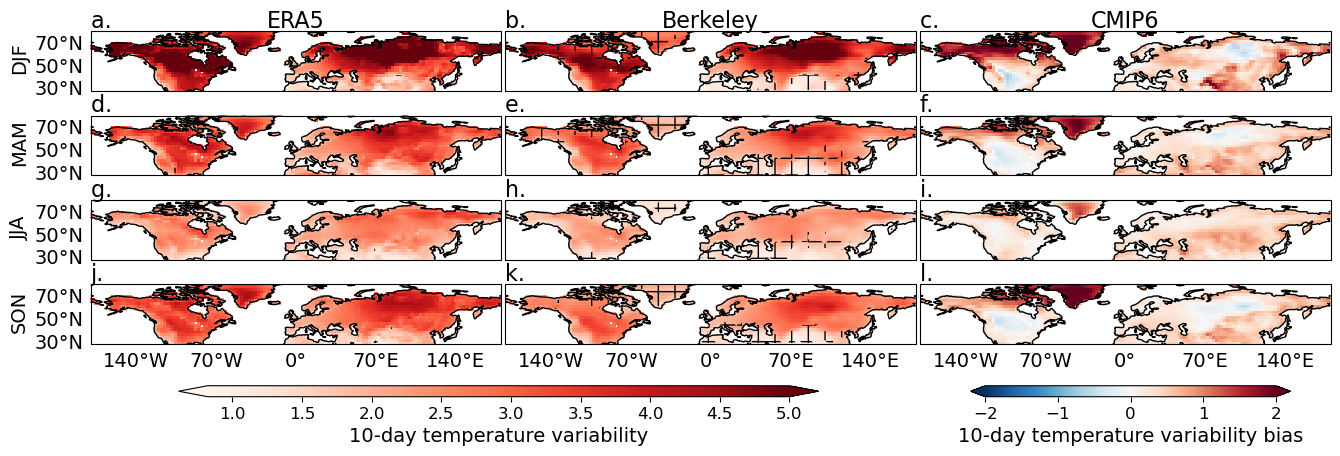

In [28]:
#plot
# dats1=[temp_seas.isel(season=0),temp_seas.isel(season=1),temp_seas.isel(season=2),temp_seas.isel(season=3)]
# dats2=[bktemp_seas.isel(season=0),bktemp_seas.isel(season=1),bktemp_seas.isel(season=2),bktemp_seas.isel(season=3)]
# dats3=[cmptemp_seas.isel(season=0).mean(dim='models'),cmptemp_seas.isel(season=1).mean(dim='models'),cmptemp_seas.isel(season=2).mean(dim='models'),cmptemp_seas.isel(season=3).mean(dim='models')]

#dats2=[heat_seasonal_pvalues.pvalues.isel(season=0),heat_seasonal_pvalues.pvalues.isel(season=1),heat_seasonal_pvalues.pvalues.isel(season=2),heat_seasonal_pvalues.pvalues.isel(season=3)]

titles=temp_seas.season.values
#map_plotter(dats,2,2,4,titles,cmap='Reds',vmax=0.05,height=5)

fig=plt.figure(figsize=(16,5.5))
numplots=np.arange(1,5)
for i in range (4):
    ax=fig.add_subplot(4,3,3*i+1,projection=ccrs.PlateCarree())
    
    m=temp_seas.isel(season=order[i]).plot(ax=ax,cmap='Reds', vmax=5,transform=ccrs.PlateCarree(),add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

    ax.contourf(eravar_hatch_tr.longitude,eravar_hatch_tr.latitude, eravar_hatch_tr.isel(season=order[i]),hatches='++++' ,alpha=0)
      
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    #gl.ylabels_rit2mt = False
    
    gl.xlabel_style = {'size': 14}
    gl.ylabel_style = {'size': 14}
    ax.coastlines()
    ax.set_title(letters[3*i],loc='left',fontsize=16, y=0.92)
    ax.text(-0.15, 0.55, titles[order[i]], va='bottom', ha='center',rotation='vertical', rotation_mode='anchor',transform=ax.transAxes, fontsize=14)

    if i==0:
        ax.set_title('ERA5', fontsize=16, y=0.92)
    else:
        ax.set_title('')
    if i<3:
        gl.bottom_labels = False

        
    ax=fig.add_subplot(4,3,3*i+2,projection=ccrs.PlateCarree())
    m=bktemp_seas.isel(season=order[i]).plot(ax=ax,cmap='Reds', vmax=5,transform=ccrs.PlateCarree(),add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

      
    ax.contourf(bkvar_hatch_tr.longitude,bkvar_hatch_tr.latitude, bkvar_hatch_tr.isel(season=order[i]),hatches='++++' ,alpha=0)
   
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.left_labels = False
    gl.right_labels = False
    
    #gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 14}
    gl.ylabel_style = {'size': 14}
    ax.coastlines()
    ax.set_title(letters[3*i+1],loc='left',fontsize=16, y=0.92)
    if i==0:
        ax.set_title('Berkeley', fontsize=16, y=0.92)
    else:
        ax.set_title('')
    if i<3:
        gl.bottom_labels = False
        
        
    ax=fig.add_subplot(4,3,3*i+3,projection=ccrs.PlateCarree())
    m2=(cmptemp_seas.isel(season=order[i]).mean(dim='models') -bktemp_seas.isel(season=order[i])).plot(ax=ax,cmap='RdBu_r', vmax=2,vmin=-2,transform=ccrs.PlateCarree(),add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

      
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.left_labels = False
    gl.right_labels = False
    #gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 14}
    gl.ylabel_style = {'size': 14}
    ax.coastlines()
    ax.set_title(letters[3*i+2],loc='left',fontsize=16, y=0.92)
    
    if i==0:
        ax.set_title('CMIP6', fontsize=16, y=0.92)
    else:
        ax.set_title('')
    if i<3:
        gl.bottom_labels = False
    
    
    
    
cbar_ax = fig.add_axes([0.18, 0.2, 0.4, 0.02])
cbl=fig.colorbar(m, cax=cbar_ax, extend='both',orientation='horizontal')
cbl.set_label(label="10-day temperature variability",size=14)
cbl.ax.tick_params(labelsize=12)

cbar_ax = fig.add_axes([0.675, 0.2, 0.2, 0.02])
cbl=fig.colorbar(m2, cax=cbar_ax, extend='both',orientation='horizontal')
cbl.set_label(label="10-day temperature variability bias",size=14)
cbl.ax.tick_params(labelsize=12)
#plt.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.01, bottom=0.28)

#plt.show()
# plt.tight_layout()
plt.savefig('plots_more/temperature_variability_cliamtology_supporting.png')

In [28]:
#trends

trvar_mn_cmp=xr.open_dataset('cmip6_tasvar_hist_mktrends.nc').tas
pvvar_mn_cmp=xr.open_dataset('cmip6_tasvar_hist_mkpvals.nc').tas

trvar_mn_era=xr.open_dataset('era5/era5_tmeanvar_trend_final_1950-2021.nc').htdays
pvvar_mn_era=xr.open_dataset('era5/era5_tmeanvar_trendpvals_final_1950-2021.nc').htdays

trvar_mn_bk=xr.open_dataset('berkeley/berkeley_tmeanvar_trend_final_1950-2021.nc').htdays
pvvar_mn_bk=xr.open_dataset('berkeley/berkeley_tmeanvar_trendpvals_final_1950-2021.nc').htdays

In [30]:
#hatching for CMIP CI

cmip_vartr_upper1=trvar_mn_cmp.quantile(0.975,dim=['models'])
cmip_vartr_lower1=trvar_mn_cmp.quantile(0.025,dim=['models'])

eravartr_hatch_tr=xr.where((trvar_mn_era>cmip_vartr_upper1)|(trvar_mn_bk<cmip_vartr_lower1), 1,np.nan)
bkvartr_hatch_tr=xr.where((trvar_mn_bk>cmip_vartr_upper1)|(trvar_mn_bk<cmip_vartr_lower1), 1,np.nan)



/home/rwhite/ladmasu/mambaforge/envs/comput/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


In [ ]:
#var trend plot
# djf_slope=slope.compute()
# djf_pv=pval.compute()
#map_plotter2(trseas,pvseas,2,2,4,ssns,vmax=0.003,cmap='RdBu_r',height=5)
# dats=trseas*10
#dats2=

fig=plt.figure(figsize=(16,5.5))
numplots=np.arange(1,5)
for i in range (4):
    ax=fig.add_subplot(4,3,3*i+1,projection=ccrs.PlateCarree())
    
    pval=xr.where(pvvar_mn_era.isel(season=order[i])<0.05,trvar_mn_era.isel(season=order[i]),np.nan)
    m=(10*pval).plot(ax=ax,vmin=-0.15, vmax=0.15, cmap='RdBu_r',transform=ccrs.PlateCarree(),add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})
    
      
    #ax.contourf(pval.longitude.values,pval.latitude.values,pval.values,hatches='.', alpha=0., transform=ccrs.PlateCarree())
    ax.contourf(eravartr_hatch_tr.longitude,eravartr_hatch_tr.latitude, eravartr_hatch_tr.isel(season=order[i]),hatches='++++' ,alpha=0)
      
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    
    #gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    ax.coastlines()
    ax.set_title(letters[3*i],loc='left',fontsize=16, y=0.92)
    ax.text(-0.15, 0.55, titles[order[i]], va='bottom', ha='center',rotation='vertical', rotation_mode='anchor',transform=ax.transAxes, fontsize=14)

    if i==0:
        ax.set_title('ERA5',fontsize=16, y=0.92)
    else:
        ax.set_title('')
    if i<3:
        gl.bottom_labels = False
        
    ax=fig.add_subplot(4,3,3*i+2,projection=ccrs.PlateCarree()) 
    pval=xr.where(pvvar_mn_bk.isel(season=order[i])<0.05,trvar_mn_bk.isel(season=order[i]),np.nan)
    m=(10*pval).plot(ax=ax,vmin=-0.15, vmax=0.15, cmap='RdBu_r',transform=ccrs.PlateCarree(),add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})
    
      
    #ax.contourf(pval.longitude.values,pval.latitude.values,pval.values,hatches='.', alpha=0., transform=ccrs.PlateCarree())
      
    ax.contourf(bkvartr_hatch_tr.longitude,bkvartr_hatch_tr.latitude, bkvartr_hatch_tr.isel(season=order[i]),hatches='++++' ,alpha=0)
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = False
    #gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 14}
    gl.ylabel_style = {'size': 14}
    ax.coastlines()
    ax.set_title(letters[3*i+1],loc='left',fontsize=16, y=0.92)
    if i==0:
        ax.set_title('Berkeley',fontsize=16, y=0.92)
    else:
        ax.set_title('')
    if i<3:
        gl.bottom_labels = False
        
    
    ax=fig.add_subplot(4,3,3*i+3,projection=ccrs.PlateCarree())
    
#     pvs1=xr.where(trvar_mn_cmp.isel(season=order[i])>0,1,0) 
#     pvs2=xr.where(trvar_mn_cmp.isel(season=order[i])<0,-1,0)
#     pval=xr.where((pvs1.mean(dim='models')>0.8)|(pvs2.mean(dim='models')<-0.8),trvar_mn_cmp.isel(season=order[i]).mean(dim='models'),np.nan) 

    m2=(10*trvar_mn_cmp.isel(season=order[i]).mean(dim='models') - trvar_mn_bk.isel(season=order[i])).plot(ax=ax,vmin=-0.1, vmax=0.1, cmap='RdBu_r',transform=ccrs.PlateCarree(),add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})
    
      
    #ax.contourf(pval.longitude.values,pval.latitude.values,pval.values,hatches='.', alpha=0., transform=ccrs.PlateCarree())
      
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = False
    
#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 14}
    gl.ylabel_style = {'size': 14}
    ax.coastlines()
    if i==0:
        ax.set_title('CMIP6',fontsize=16, y=0.92)
    else:
        ax.set_title('')
    ax.set_title(letters[3*i+2],loc='left',fontsize=16, y=0.92)
    
    if i<3:
        gl.bottom_labels = False
    
        
cbar_ax = fig.add_axes([0.18, 0.2, 0.4, 0.02])
cbl=fig.colorbar(m, cax=cbar_ax, extend='both',orientation='horizontal')
cbl.set_label(label="10-day temperature variability trend",size=14)
cbl.ax.tick_params(labelsize=12)

cbar_ax = fig.add_axes([0.675, 0.2, 0.2, 0.02])
cbl=fig.colorbar(m2, cax=cbar_ax, extend='both',orientation='horizontal')
cbl.set_label(label="10-day temperature variability trend bias",size=14)
cbl.ax.tick_params(labelsize=12)
#plt.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.01, bottom=0.28)
#plt.show()
plt.savefig('plots_more/temperature_variability_trends_supporting.png')

In [29]:
#latvar
trseas_vartr=trvar_mn_cmp.copy(deep=True)
trseasera_vartr=trvar_mn_era.copy(deep=True)
trseasbk_vartr=trvar_mn_bk.copy(deep=True)

vartrend_annual_mn2=trvar_mn_cmp.mean(dim='season')
vartrend_annual_mn2_era=trvar_mn_era.mean(dim='season')
vartrend_annual_mn2_bk=trvar_mn_bk.mean(dim='season')

vartrend_dif_cmip=((trvar_mn_cmp-vartrend_annual_mn2).mean(dim='longitude'))*10
vartrend_dif_cmip_mean=vartrend_dif_cmip.mean(dim='models')
vartrend_dif_cmip_upper=vartrend_dif_cmip.quantile(0.975,dim='models')
vartrend_dif_cmip_lower=vartrend_dif_cmip.quantile(0.025,dim='models')
vartrend_dif_era=((trvar_mn_era - vartrend_annual_mn2_era).mean(dim='longitude'))*10
vartrend_dif_bk=((trvar_mn_bk - vartrend_annual_mn2_bk).mean(dim='longitude'))*10

## Plot lat variation in HW clim, temp trend, temp var, temp var trend

In [152]:
#latvar ration (tmp)
trseas_tmp=trseas_mn.copy(deep=True)
trseasera_tmp=trseas_mn_era.copy(deep=True)
trseasbk_tmp=trseas_mn_bk.copy(deep=True)

tmptrend_annual_mn2=trseas_tmp.mean(dim='season')
tmptrend_annual_mn2_era=trseasera_tmp.mean(dim='season')
tmptrend_annual_mn2_bk=trseasbk_tmp.mean(dim='season')

tmptrend_ann_cmip=tmptrend_annual_mn2.mean(dim=['longitude'])*10
tmptrend_ann_cmip_mean=tmptrend_ann_cmip.mean(dim=['models'])
tmptrend_ann_cmip_upper=tmptrend_ann_cmip.quantile(0.975,dim='models')
tmptrend_ann_cmip_lower=tmptrend_ann_cmip.quantile(0.025,dim='models')

tmptrend_dif_cmip=((trseas_tmp-tmptrend_annual_mn2).mean(dim='longitude'))*10
tmptrend_dif_cmip_mean=tmptrend_dif_cmip.mean(dim='models')
tmptrend_dif_cmip_upper=tmptrend_dif_cmip.quantile(0.975,dim='models')
tmptrend_dif_cmip_lower=tmptrend_dif_cmip.quantile(0.025,dim='models')

tmptrend_ann_era=tmptrend_annual_mn2_era.mean(dim='longitude')*10
tmptrend_dif_era=((trseasera_tmp - tmptrend_annual_mn2_era).mean(dim='longitude'))*10
tmptrend_ann_bk=tmptrend_annual_mn2_bk.mean(dim='longitude')*10
tmptrend_dif_bk=((trseasbk_tmp - tmptrend_annual_mn2_bk).mean(dim='longitude'))*10

In [153]:
#latvar ration (det)
detclimseas_mn =detheat_mult21.groupby('time.season').mean()
detclimseas_mn_era=detheat_midlat21.groupby('time.season').mean()
detclimseas_mn_bk=detheatbk_midlat.groupby('time.season').mean()

detclim_annual_mn2=detclimseas_mn.mean(dim='season')
detclim_annual_mn2_era=detclimseas_mn_era.mean(dim='season')
detclim_annual_mn2_bk=detclimseas_mn_bk.mean(dim='season')

detclim_ann_cmip=detclim_annual_mn2.mean(dim=['longitude'])*10
detclim_ann_cmip_mean=detclim_ann_cmip.mean(dim=['models'])
detclim_ann_cmip_upper=detclim_ann_cmip.quantile(0.975,dim='models')
detclim_ann_cmip_lower=detclim_ann_cmip.quantile(0.025,dim='models')

detclim_ann_era=detclim_annual_mn2_era.mean(dim='longitude')*10
detclim_ann_bk=detclim_annual_mn2_bk.mean(dim='longitude')*10


detclim_dif_cmip=((detclimseas_mn-detclim_annual_mn2).mean(dim='longitude'))
detclim_dif_cmip_mean=detclim_dif_cmip.mean(dim='models')
detclim_dif_cmip_upper=detclim_dif_cmip.quantile(0.975,dim='models')
detclim_dif_cmip_lower=detclim_dif_cmip.quantile(0.025,dim='models')
detclim_dif_era=((detclimseas_mn_era -detclim_annual_mn2_era).mean(dim='longitude'))
detclim_dif_bk=((detclimseas_mn_bk - detclim_annual_mn2_bk).mean(dim='longitude'))

In [154]:
#latvar ration (httrend)
#lat vatiations seasondev

trend_annual_mn2=trseas_heat.mean(dim='season')
trend_annual_mn2_era=trseasera_heat.mean(dim='season')
trend_annual_mn2_bk=trseasbk_heat.mean(dim='season')

trend_ann_cmip=trend_annual_mn2.mean(dim=['longitude'])*10
trend_ann_cmip_mean=trend_ann_cmip.mean(dim=['models'])
trend_ann_cmip_upper=trend_ann_cmip.quantile(0.975,dim='models')
trend_ann_cmip_lower=trend_ann_cmip.quantile(0.025,dim='models')

trend_dif_cmip=((trseas_heat-trend_annual_mn2).mean(dim='longitude'))*10
trend_dif_cmip_mean=trend_dif_cmip.mean(dim='models')
trend_dif_cmip_upper=trend_dif_cmip.quantile(0.975,dim='models')
trend_dif_cmip_lower=trend_dif_cmip.quantile(0.025,dim='models')

trend_ann_era= trend_annual_mn2_era.mean(dim='longitude')*10
trend_dif_era=((trseasera_heat - trend_annual_mn2_era).mean(dim='longitude'))*10
trend_ann_bk=trend_annual_mn2_bk.mean(dim='longitude')*10
trend_dif_bk=((trseasbk_heat - trend_annual_mn2_bk).mean(dim='longitude'))*10

In [155]:
#latvar ration (variability)


var_dif_cmip=((varseas_mn-var_annual_mn2).mean(dim='longitude'))
var_dif_cmip_mean=var_dif_cmip.mean(dim='models')
var_dif_cmip_upper=var_dif_cmip.quantile(0.975,dim='models')
var_dif_cmip_lower=var_dif_cmip.quantile(0.025,dim='models')
var_dif_era=((varseas_mn_era - var_annual_mn2_era).mean(dim='longitude'))

tmn_bk_var=tmnbk_noleap.temperature.rolling(time=10).std()
var_annual_mn2_bk=tmn_bk_var.groupby('time.season').mean().mean(dim='season')
varseas_mn_bk=tmn_bk_var.groupby('time.season').mean()

var_ann_cmip=var_annual_mn2.mean(dim=['longitude'])*10
var_ann_cmip_mean=var_ann_cmip.mean(dim=['models'])
var_ann_cmip_upper=var_ann_cmip.quantile(0.975,dim='models')
var_ann_cmip_lower=var_ann_cmip.quantile(0.025,dim='models')
var_ann_era=var_annual_mn2_era.mean(dim='longitude')*10
var_ann_bk=var_annual_mn2_bk.mean(dim='longitude')*10

var_dif_bk=((varseas_mn_bk - var_annual_mn2_bk).mean(dim='longitude'))
trseas_var=varseas_mn.copy(deep=True)
trseasera_var=varseas_mn_era.copy(deep=True)
trseasbk_var=varseas_mn_bk.copy(deep=True)

In [127]:
#latvar ration (vartrend)
trseas_vartr=trvar_mn_cmp.copy(deep=True)
trseasera_vartr=trvar_mn_era.copy(deep=True)
trseasbk_vartr=trvar_mn_bk.copy(deep=True)

vartrend_annual_mn2=trvar_mn_cmp.mean(dim='season')
vartrend_annual_mn2_era=trvar_mn_era.mean(dim='season')
vartrend_annual_mn2_bk=trvar_mn_bk.mean(dim='season')

vartrend_ann_cmip=vartrend_annual_mn2.mean(dim=['longitude'])*10
vartrend_ann_cmip_mean=vartrend_ann_cmip.mean(dim=['models'])
vartrend_ann_cmip_upper=vartrend_ann_cmip.quantile(0.975,dim='models')
vartrend_ann_cmip_lower=vartrend_ann_cmip.quantile(0.025,dim='models')
vartrend_ann_era=vartrend_annual_mn2_era.mean(dim='longitude')*10
vartrend_ann_bk=vartrend_annual_mn2_bk.mean(dim='longitude')*10

vartrend_dif_cmip=((trvar_mn_cmp-vartrend_annual_mn2).mean(dim='longitude'))*10
vartrend_dif_cmip_mean=vartrend_dif_cmip.mean(dim='models')
vartrend_dif_cmip_upper=vartrend_dif_cmip.quantile(0.975,dim='models')
vartrend_dif_cmip_lower=vartrend_dif_cmip.quantile(0.025,dim='models')
vartrend_dif_era=((trvar_mn_era - vartrend_annual_mn2_era).mean(dim='longitude'))*10
vartrend_dif_bk=((trvar_mn_bk - vartrend_annual_mn2_bk).mean(dim='longitude'))*10

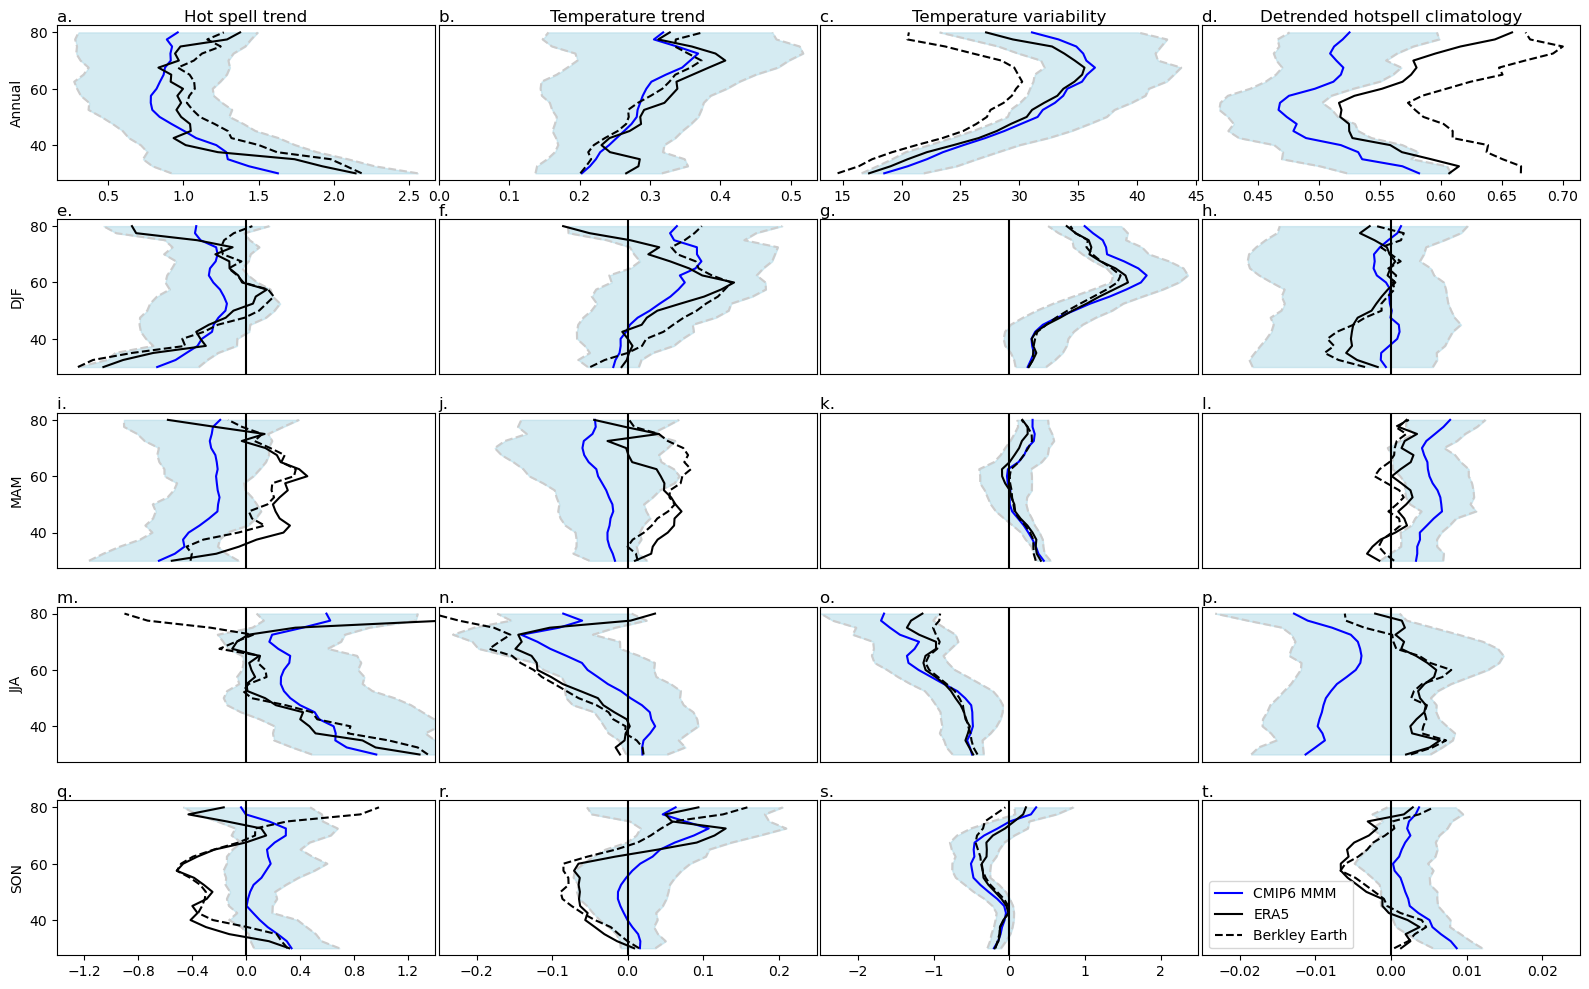

In [163]:
#plot together
fig=plt.figure(figsize=(16,10))
order=np.array([0,2,1,3])
ax=fig.add_subplot(5,4,1)
i=0
lat=trend_ann_cmip_mean.latitude
ax.plot(trend_ann_cmip_mean,lat,  color='blue', label='CMIP6 MMM')
ax.plot(trend_ann_cmip_upper,lat,linestyle='--', color='0.8')
ax.plot(trend_ann_cmip_lower,lat,linestyle='--', color='0.8')
ax.fill_betweenx(lat,trend_ann_cmip_lower, trend_ann_cmip_upper, color='lightblue', alpha=0.5)

ax.plot(trend_ann_era,lat, color='black', label='ERA5')
ax.plot(trend_ann_bk,lat,linestyle='--', color='black', label='Berkley Earth')
ax.set_title(letters[0],loc='left',fontsize=12, y=0.97)
if i==0:
    ax.set_title('Hot spell trend',fontsize=12, y=0.97)
else:
    ax.set_title('')

ax.set_ylabel('Annual')
# if i<3:
#     ax.set_xticks([])
# else:
#     ax.set_xticks([-0.01,-0.005,0,0.005,0.01])
#     ax.set_xticklabels([-0.01,-0.005,0,0.005,0.01])
# ax.set_xlim([-0.01,0.01])
#plt.legend()


ax=fig.add_subplot(5,4,2)
lat=tmptrend_ann_cmip_mean.latitude
ax.plot(tmptrend_ann_cmip_mean,lat,  color='blue', label='CMIP6 MMM')
ax.plot(tmptrend_ann_cmip_upper,lat,linestyle='--', color='0.8')
ax.plot(tmptrend_ann_cmip_lower,lat,linestyle='--', color='0.8')
ax.fill_betweenx(lat,tmptrend_ann_cmip_lower, tmptrend_ann_cmip_upper, color='lightblue', alpha=0.5)

ax.plot(tmptrend_ann_era,lat, color='black', label='ERA5')
ax.plot(tmptrend_ann_bk,lat,linestyle='--', color='black', label='Berkley Earth')
ax.set_title(letters[4*i+1],loc='left',fontsize=12, y=0.97)
if i==0:
    ax.set_title('Temperature trend',fontsize=12, y=0.97)
else:
    ax.set_title('')

ax.set_yticks([])
ax.set_xticks(np.arange(0,0.6,0.1))
# if i<3:
#     ax.set_xticks([])
#ax.set_xlim([-0.25,0.25])

#plt.legend()

ax=fig.add_subplot(5,4,3)
lat=var_ann_cmip_mean.latitude
ax.plot(var_ann_cmip_mean,lat,  color='blue', label='CMIP6 MMM')
ax.plot(var_ann_cmip_upper,lat,linestyle='--', color='0.8')
ax.plot(var_ann_cmip_lower,lat,linestyle='--', color='0.8')
ax.fill_betweenx(lat,var_ann_cmip_lower, var_ann_cmip_upper, color='lightblue', alpha=0.5)

ax.plot(var_ann_era,lat, color='black', label='ERA5')
ax.plot(var_ann_bk,lat, linestyle='--',color='black', label='Berkley Earth')
ax.set_title(letters[4*i+2],loc='left',fontsize=12, y=0.97)
if i==0:
    ax.set_title('Temperature variability',fontsize=12, y=0.97)
else:
    ax.set_title('')
ax.set_yticks([])

# if i<3:
#     ax.set_xticks([])
#ax.set_xlim([-2.5,2.5])

ax=fig.add_subplot(5,4,4)
lat=detclim_ann_cmip_mean.latitude
ax.plot(detclim_ann_cmip_mean.htdays,lat,  color='blue', label='CMIP6 MMM')
ax.plot(detclim_ann_cmip_upper.htdays,lat,linestyle='--', color='0.8')
ax.plot(detclim_ann_cmip_lower.htdays,lat,linestyle='--', color='0.8')
ax.fill_betweenx(lat,detclim_ann_cmip_lower.htdays, detclim_ann_cmip_upper.htdays, color='lightblue', alpha=0.5)

ax.plot(detclim_ann_era.t2m,lat, color='black', label='ERA5')
ax.plot(detclim_ann_bk.t2m,lat, linestyle='--',color='black', label='Berkley Earth')
ax.set_title(letters[4*i+3],loc='left',fontsize=12, y=0.97)
if i==0:
    ax.set_title('Detrended hotspell climatology',fontsize=12, y=0.97)
else:
    ax.set_title('')
#ax.set_xlim([-0.025,0.025])
ax.set_yticks([])
# if i<3:
#     ax.set_xticks([])


if i==3:
    plt.legend()


for i,ss in enumerate(titles):
    ax=fig.add_subplot(5,4,4*i+5)
    
    trend_dif_cmip_mean
    lat=trend_dif_cmip_mean.latitude
    ax.plot(trend_dif_cmip_mean.isel(season=order[i]),lat,  color='blue', label='CMIP6 MMM')
    ax.plot(trend_dif_cmip_upper.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.plot(trend_dif_cmip_lower.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.fill_betweenx(lat,trend_dif_cmip_lower.isel(season=order[i]), trend_dif_cmip_upper.isel(season=order[i]), color='lightblue', alpha=0.5)
    ax.axvline(color='k')
    ax.plot(trend_dif_era.isel(season=order[i]),lat, color='black', label='ERA5')
    ax.plot(trend_dif_bk.isel(season=order[i]),lat,linestyle='--', color='black', label='Berkley Earth')
    ax.set_title(letters[4*i+4],loc='left',fontsize=12, y=0.97)
    ax.set_title('')
#     if i==0:
#         ax.set_title('Hot spell trend',fontsize=12, y=0.97)
#     else:
#         ax.set_title('')

    ax.set_ylabel(titles[order[i]])
    if i<3:
        ax.set_xticks([])
    else:
        ax.set_xticks(np.arange(-1.2,1.6,0.4))
        #ax.set_xticklabels([-0.01,-0.005,0,0.005,0.01])
    ax.set_xlim([-1.4,1.4])
    #plt.legend()
    
    
    ax=fig.add_subplot(5,4,4*i+6)
    lat=tmptrend_dif_cmip_mean.latitude
    ax.plot(tmptrend_dif_cmip_mean.isel(season=order[i]),lat,  color='blue', label='CMIP6 MMM')
    ax.plot(tmptrend_dif_cmip_upper.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.plot(tmptrend_dif_cmip_lower.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.fill_betweenx(lat,tmptrend_dif_cmip_lower.isel(season=order[i]), tmptrend_dif_cmip_upper.isel(season=order[i]), color='lightblue', alpha=0.5)
    ax.axvline(color='k')
    ax.plot(tmptrend_dif_era.isel(season=order[i]),lat, color='black', label='ERA5')
    ax.plot(tmptrend_dif_bk.isel(season=order[i]),lat,linestyle='--', color='black', label='Berkley Earth')
    ax.set_title(letters[4*i+5],loc='left',fontsize=12, y=0.97)

    ax.set_title('')
    #     if i==0:
#         ax.set_title('Temperature trend',fontsize=12, y=0.97)
#     else:
#         ax.set_title('')

    ax.set_yticks([])
    if i<3:
        ax.set_xticks([])
    ax.set_xlim([-0.25,0.25])
    
    #plt.legend()
    
    ax=fig.add_subplot(5,4,4*i+7)
    lat=var_dif_cmip_mean.latitude
    ax.plot(var_dif_cmip_mean.isel(season=order[i]),lat,  color='blue', label='CMIP6 MMM')
    ax.plot(var_dif_cmip_upper.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.plot(var_dif_cmip_lower.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.fill_betweenx(lat,var_dif_cmip_lower.isel(season=order[i]), var_dif_cmip_upper.isel(season=order[i]), color='lightblue', alpha=0.5)
    ax.axvline(color='k')
    ax.plot(var_dif_era.isel(season=order[i]),lat, color='black', label='ERA5')
    ax.plot(var_dif_bk.isel(season=order[i]),lat, linestyle='--',color='black', label='Berkley Earth')
    ax.set_title(letters[4*i+6],loc='left',fontsize=12, y=0.97)

    ax.set_title('')
    #     if i==0:
#         ax.set_title('Temperature variability',fontsize=12, y=0.97)
#     else:
#         ax.set_title('')
    ax.set_yticks([])
    if i<3:
        ax.set_xticks([])
    ax.set_xlim([-2.5,2.5])
    
    ax=fig.add_subplot(5,4,4*i+8)
    lat=detclim_dif_cmip_mean.latitude
    ax.plot(detclim_dif_cmip_mean.htdays.isel(season=order[i]),lat,  color='blue', label='CMIP6 MMM')
    ax.plot(detclim_dif_cmip_upper.htdays.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.plot(detclim_dif_cmip_lower.htdays.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.fill_betweenx(lat,detclim_dif_cmip_lower.htdays.isel(season=order[i]), detclim_dif_cmip_upper.htdays.isel(season=order[i]), color='lightblue', alpha=0.5)
    ax.axvline(color='k')
    ax.plot(detclim_dif_era.t2m.isel(season=order[i]),lat, color='black', label='ERA5')
    ax.plot(detclim_dif_bk.t2m.isel(season=order[i]),lat, linestyle='--',color='black', label='Berkley Earth')
    ax.set_title(letters[4*i+7],loc='left',fontsize=12, y=0.97)
    ax.set_title('')
    #     if i==0:
#         ax.set_title('Detrended hotspell climatology',fontsize=12, y=0.97)
#     else:
#         ax.set_title('')
    ax.set_xlim([-0.025,0.025])
    ax.set_yticks([])
    if i<3:
        ax.set_xticks([])
    
    
    if i==3:
        plt.legend()
plt.tight_layout()  
plt.subplots_adjust(hspace=0.25, wspace=0.01)
    
plt.savefig('plots_final/parameters_latvar_main.png')

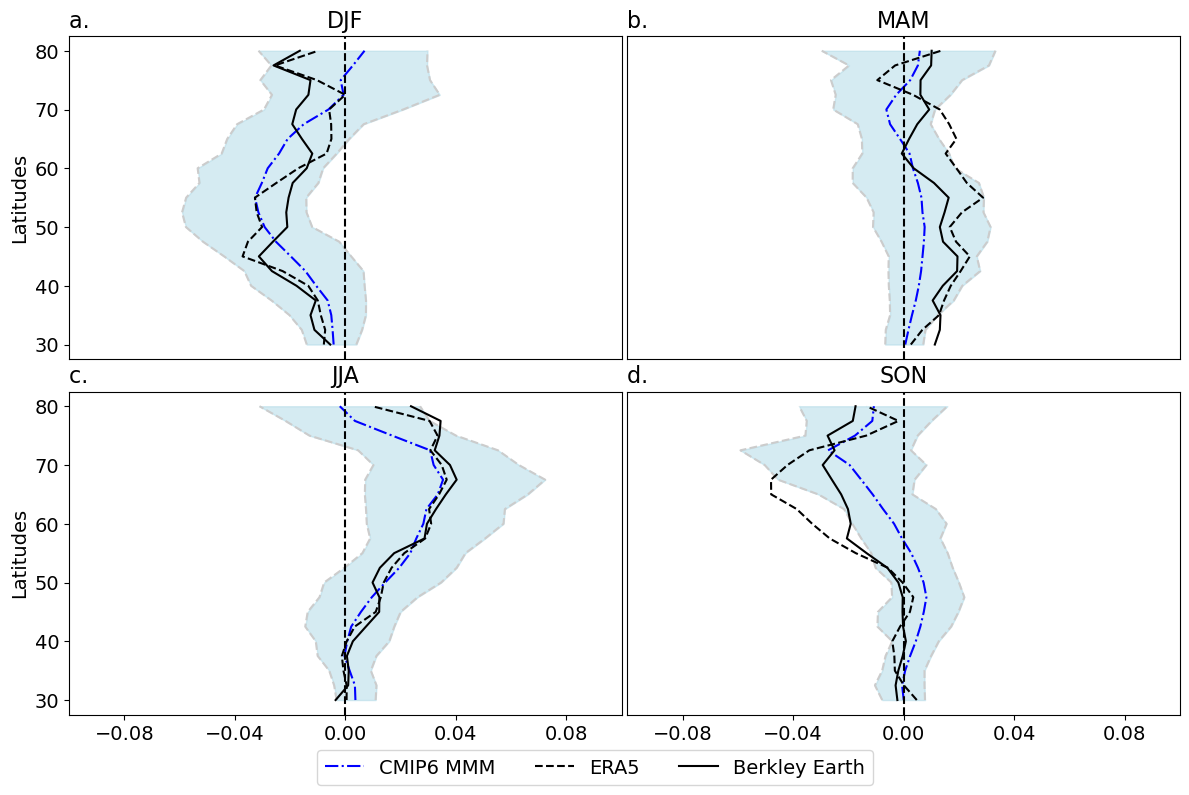

In [130]:
#plot together
fig=plt.figure(figsize=(12,8))
for i,ss in enumerate(titles):
    ax=fig.add_subplot(2,2,i+1)
    
    
    lat=vartrend_dif_cmip_mean.latitude
    ax.plot(vartrend_dif_cmip_mean.isel(season=order[i]),lat,linestyle='-.',  color='blue', label='CMIP6 MMM')
    ax.plot(vartrend_dif_cmip_upper.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.plot(vartrend_dif_cmip_lower.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.fill_betweenx(lat,vartrend_dif_cmip_lower.isel(season=order[i]), vartrend_dif_cmip_upper.isel(season=order[i]), color='lightblue', alpha=0.5)
    ax.axvline(color='k', linestyle='--')
    ax.plot(vartrend_dif_era.isel(season=order[i]),lat,linestyle='--', color='black', label='ERA5')
    ax.plot(vartrend_dif_bk.isel(season=order[i]),lat, color='black', label='Berkley Earth')
    ax.set_title(letters[i],loc='left',fontsize=16)
    ax.set_title(titles[order[i]], fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    if i==1 or i==3:
        ax.set_yticks([])
#     else:
#         ax.set_yticks([np.arange(30,90,10)])
#         ax.set_yticklabels(['30','40','50','60','70','80'], fontsize=12)
    ax.set_xlim([-0.1,0.1])
#     ax.set_xticks(np.arange(-0.01,0.015,0.005))
    if i<2:
        ax.set_xticks([])
    else:
        ax.set_xticks(np.arange(-0.08,0.12,0.04))
        
#     if i>1:
#         ax.set_xlabel('Seasonal deviations of temperature variability trend', fontsize=14)
    
    if i%2==0:
        ax.set_ylabel('Latitudes', fontsize=14)
    

handles=[]
labels=[]
h, l = ax.get_legend_handles_labels()
handles.extend(h)
labels.extend(l)
fig.legend(handles, labels,ncol=3, loc='lower center', fontsize=14, bbox_to_anchor=(0.5, 0))  
plt.tight_layout()  
plt.subplots_adjust(hspace=0.1, wspace=0.01, bottom=0.1)
    
plt.savefig('plots_more/Latvariation_vartrend_supporting.png')

In [110]:
#latvar ration (tmp)
#trseas_tmp=trseas_tmp#.sel(latitude=slice(30,80))
tmptrend_annual_mn2=trseas_tmp.mean(dim='season')
tmptrend_annual_mn2_era=trseasera_tmp.mean(dim='season')
tmptrend_annual_mn2_bk=trseasbk_tmp.mean(dim='season')

tmptrend_ann_cmip=tmptrend_annual_mn2.mean(dim=['longitude'])*10
tmptrend_ann_cmip_mean=tmptrend_ann_cmip.mean(dim=['models'])
tmptrend_ann_cmip_upper=tmptrend_ann_cmip.quantile(0.975,dim='models')
tmptrend_ann_cmip_lower=tmptrend_ann_cmip.quantile(0.025,dim='models')

tmptrend_dif_cmip=trseas_tmp.mean(dim='longitude') / tmptrend_annual_mn2.mean(dim='longitude')
tmptrend_dif_cmip_mean=tmptrend_dif_cmip.mean(dim='models')
tmptrend_dif_cmip_upper=tmptrend_dif_cmip.quantile(0.975,dim='models')
tmptrend_dif_cmip_lower=tmptrend_dif_cmip.quantile(0.025,dim='models')

tmptrend_ann_era=tmptrend_annual_mn2_era.mean(dim='longitude')*10
tmptrend_dif_era=trseasera_tmp.mean(dim='longitude') / tmptrend_annual_mn2_era.mean(dim='longitude')
tmptrend_ann_bk=tmptrend_annual_mn2_bk.mean(dim='longitude')*10
tmptrend_dif_bk=trseasbk_tmp.mean(dim='longitude') / tmptrend_annual_mn2_bk.mean(dim='longitude')

In [111]:
#latvar ration (det)
detheat_seas_m=detheat_mult21.htdays.groupby('time.season').mean(dim=['time'])
count_days=[90,92,92,91]
detheat_seas2=detheat_seas_m.copy()
for i in range(4):
    detheat_seas2[:,i,]=count_days[i]*detheat_seas_m[:,i,]

detclim_annual_mn2=detheat_seas2.mean(dim='season')
detclim_annual_mn2_era=detheatera_seas.mean(dim='season')
detclim_annual_mn2_bk=detheatbk_seas.mean(dim='season')

# detclim_dif_cmip=((detclimseas_mn-detclim_annual_mn2).mean(dim='longitude'))
# detclim_dif_cmip_mean=detclim_dif_cmip.mean(dim='models')
# detclim_dif_cmip_upper=detclim_dif_cmip.quantile(0.975,dim='models')
# detclim_dif_cmip_lower=detclim_dif_cmip.quantile(0.025,dim='models')
# detclim_dif_era=((detclimseas_mn_era - detclim_annual_mn2_era).mean(dim='longitude'))
# detclim_dif_bk=((detclimseas_mn_bk - detclim_annual_mn2_bk).mean(dim='longitude'))

detclim_ann_era=detclim_annual_mn2_era.mean(dim='longitude')
detclim_ann_bk=detclim_annual_mn2_bk.mean(dim='longitude')

detheat_ann_cmip=detclim_annual_mn2.mean(dim=['longitude'])
detheat_ann_cmip_mean=detheat_ann_cmip.mean(dim=['models'])
detheat_ann_cmip_upper=detheat_ann_cmip.quantile(0.975,dim='models')
detheat_ann_cmip_lower=detheat_ann_cmip.quantile(0.025,dim='models')

detclim_dif_cmip=detheat_seas2.mean(dim='longitude') / detclim_annual_mn2.mean(dim='longitude')
detclim_dif_cmip_mean=detclim_dif_cmip.mean(dim='models')
detclim_dif_cmip_upper=detclim_dif_cmip.quantile(0.975,dim='models')
detclim_dif_cmip_lower=detclim_dif_cmip.quantile(0.025,dim='models')
detclim_dif_era=detheatera_seas.mean(dim='longitude') / detclim_annual_mn2_era.mean(dim='longitude')
detclim_dif_bk=detheatbk_seas.mean(dim='longitude') / detclim_annual_mn2_bk.mean(dim='longitude')

In [112]:
#latvar ration (httrend)
#lat vatiations seasondev

trend_annual_mn2=trseas_heat.mean(dim='season')
trend_annual_mn2_era=trseasera_heat.mean(dim='season')
trend_annual_mn2_bk=trseasbk_heat.mean(dim='season')

trend_ann_cmip=trend_annual_mn2.mean(dim=['longitude'])*10
trend_ann_cmip_mean=trend_ann_cmip.mean(dim=['models'])
trend_ann_cmip_upper=trend_ann_cmip.quantile(0.975,dim='models')
trend_ann_cmip_lower=trend_ann_cmip.quantile(0.025,dim='models')


trend_dif_cmip=trseas_heat.mean(dim='longitude') / trend_annual_mn2.mean(dim='longitude')
trend_dif_cmip_mean=trend_dif_cmip.mean(dim='models')
trend_dif_cmip_upper=trend_dif_cmip.quantile(0.975,dim='models')
trend_dif_cmip_lower=trend_dif_cmip.quantile(0.025,dim='models')

trend_ann_era= trend_annual_mn2_era.mean(dim='longitude')*10
trend_dif_era=trseasera_heat.mean(dim='longitude') / trend_annual_mn2_era.mean(dim='longitude')
trend_ann_bk=trend_annual_mn2_bk.mean(dim='longitude')*10
trend_dif_bk=trseasbk_heat.mean(dim='longitude') / trend_annual_mn2_bk.mean(dim='longitude')

In [113]:
#latvar ration (variability)


var_dif_cmip=varseas_mn.mean(dim='longitude') / var_annual_mn2.mean(dim='longitude')
var_dif_cmip_mean=var_dif_cmip.mean(dim='models')
var_dif_cmip_upper=var_dif_cmip.quantile(0.975,dim='models')
var_dif_cmip_lower=var_dif_cmip.quantile(0.025,dim='models')
var_dif_era=varseas_mn_era.mean(dim='longitude') / var_annual_mn2_era.mean(dim='longitude')

tmn_bk_var=tmnbk_noleap.temperature.rolling(time=10).std()
var_annual_mn2_bk=tmn_bk_var.groupby('time.season').mean().mean(dim='season')
varseas_mn_bk=tmn_bk_var.groupby('time.season').mean()

var_ann_cmip=var_annual_mn2.mean(dim=['longitude'])*10
var_ann_cmip_mean=var_ann_cmip.mean(dim=['models'])
var_ann_cmip_upper=var_ann_cmip.quantile(0.975,dim='models')
var_ann_cmip_lower=var_ann_cmip.quantile(0.025,dim='models')
var_ann_era=var_annual_mn2_era.mean(dim='longitude')*10
var_ann_bk=var_annual_mn2_bk.mean(dim='longitude')*10

var_dif_bk=varseas_mn_bk.mean(dim='longitude') / var_annual_mn2_bk.mean(dim='longitude')
trseas_var=varseas_mn.copy(deep=True)
trseasera_var=varseas_mn_era.copy(deep=True)
trseasbk_var=varseas_mn_bk.copy(deep=True)

In [ ]:
#plot together
fig=plt.figure(figsize=(16,10))
order=np.array([0,2,1,3])
ax=fig.add_subplot(5,4,1)
i=0
lat=trend_ann_cmip_mean.latitude
ax.plot(trend_ann_cmip_mean,lat,linestyle='-.',  color='blue', label='CMIP6 MMM')
ax.plot(trend_ann_cmip_upper,lat,linestyle='--', color='0.8')
ax.plot(trend_ann_cmip_lower,lat,linestyle='--', color='0.8')
ax.fill_betweenx(lat,trend_ann_cmip_lower, trend_ann_cmip_upper, color='lightblue', alpha=0.5)

ax.plot(trend_ann_era,lat,linestyle='--', color='black', label='ERA5')
ax.plot(trend_ann_bk,lat, color='black', label='Berkley Earth')
ax.set_title(letters[0],loc='left',fontsize=16, y=0.97)
if i==0:
    ax.set_title('Hot spell trend',fontsize=16, y=0.97)
else:
    ax.set_title('')

ax.set_ylabel('Average',fontsize=14)

# if i<3:
#     ax.set_xticks([])
# else:
#     ax.set_xticks([-0.01,-0.005,0,0.005,0.01])
#     ax.set_xticklabels([-0.01,-0.005,0,0.005,0.01])
# ax.set_xlim([-0.01,0.01])
#plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax=fig.add_subplot(5,4,2)
lat=tmptrend_ann_cmip_mean.latitude
ax.plot(tmptrend_ann_cmip_mean,lat,linestyle='-.',  color='blue', label='CMIP6 MMM')
ax.plot(tmptrend_ann_cmip_upper,lat,linestyle='--', color='0.8')
ax.plot(tmptrend_ann_cmip_lower,lat,linestyle='--', color='0.8')
ax.fill_betweenx(lat,tmptrend_ann_cmip_lower, tmptrend_ann_cmip_upper, color='lightblue', alpha=0.5)

ax.plot(tmptrend_ann_era,lat,linestyle='--', color='black', label='ERA5')
ax.plot(tmptrend_ann_bk,lat, color='black', label='Berkley Earth')
ax.set_title(letters[4*i+1],loc='left',fontsize=16, y=0.97)
if i==0:
    ax.set_title('Temperature trend',fontsize=16, y=0.97)
else:
    ax.set_title('')


ax.set_xlim([0,0.6])
ax.set_yticks([])
ax.set_xticks(np.arange(0.1,0.6,0.1))
plt.xticks(fontsize=14)
# if i<3:
#     ax.set_xticks([])
#ax.set_xlim([-0.25,0.25])

#plt.legend()

ax=fig.add_subplot(5,4,3)
lat=var_ann_cmip_mean.latitude
ax.plot(var_ann_cmip_mean,lat,linestyle='-.',  color='blue', label='CMIP6 MMM')
ax.plot(var_ann_cmip_upper,lat,linestyle='--', color='0.8')
ax.plot(var_ann_cmip_lower,lat,linestyle='--', color='0.8')
ax.fill_betweenx(lat,var_ann_cmip_lower, var_ann_cmip_upper, color='lightblue', alpha=0.5)

ax.plot(var_ann_era,lat, linestyle='--', color='black', label='ERA5')
ax.plot(var_ann_bk,lat,color='black', label='Berkley Earth')
ax.set_title(letters[4*i+2],loc='left',fontsize=16, y=0.97)
if i==0:
    ax.set_title('Temperature variability',fontsize=16, y=0.97)
else:
    ax.set_title('')
ax.set_yticks([])
ax.set_xlim([0,50])
ax.set_xticks(np.arange(10,50,10))
plt.xticks(fontsize=14)
# if i<3:
#     ax.set_xticks([])
#ax.set_xlim([-2.5,2.5])

ax=fig.add_subplot(5,4,4)
lat=detheat_ann_cmip_mean.latitude
ax.plot(detheat_ann_cmip_mean,lat,linestyle='-.',  color='blue', label='CMIP6 MMM')
ax.plot(detheat_ann_cmip_upper,lat,linestyle='--', color='0.8')
ax.plot(detheat_ann_cmip_lower,lat,linestyle='--', color='0.8')
ax.fill_betweenx(lat,detheat_ann_cmip_lower, detheat_ann_cmip_upper, color='lightblue', alpha=0.5)

ax.plot(detclim_ann_era,lat, linestyle='--', color='black', label='ERA5')
ax.plot(detclim_ann_bk,lat,color='black', label='Berkley Earth')
ax.set_title(letters[4*i+3],loc='left',fontsize=16, y=0.97)
if i==0:
    ax.set_title('Detrended hotspell days',fontsize=16, y=0.97)
else:
    ax.set_title('')
#ax.set_xlim([-0.025,0.025])
ax.set_xlim([0,8])
ax.set_yticks([])
ax.set_xticks(np.arange(2,9,2))
plt.xticks(fontsize=14)
# if i<3:
#     ax.set_xticks([])


if i==3:
    plt.legend()


for i,ss in enumerate(titles):
    ax=fig.add_subplot(5,4,4*i+5)
    
    trend_dif_cmip_mean
    lat=trend_dif_cmip_mean.latitude
    ax.plot(trend_dif_cmip_mean.isel(season=order[i]),lat,linestyle='-.',  color='blue', label='CMIP6 MMM')
    ax.plot(trend_dif_cmip_upper.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.plot(trend_dif_cmip_lower.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.fill_betweenx(lat,trend_dif_cmip_lower.isel(season=order[i]), trend_dif_cmip_upper.isel(season=order[i]), color='lightblue', alpha=0.5)
    ax.axvline(1,color='k')
    ax.plot(trend_dif_era.isel(season=order[i]),lat, linestyle='--', color='black', label='ERA5')
    ax.plot(trend_dif_bk.isel(season=order[i]),lat, color='black', label='Berkley Earth')
    ax.set_title(letters[4*i+4],loc='left',fontsize=16, y=0.97)
    ax.set_title('')
#     if i==0:
#         ax.set_title('Hot spell trend',fontsize=12, y=0.97)
#     else:
#         ax.set_title('')

    ax.set_ylabel(titles[order[i]], fontsize=14)
    ax.set_xlim([0,2])
    plt.yticks(fontsize=14)
    if i<3:
        ax.set_xticks([])
    else:
        ax.set_xticks(np.arange(0.2,2,0.4))
        plt.xticks(fontsize=14)
        #ax.set_xticklabels([-0.01,-0.005,0,0.005,0.01])

    #plt.legend()
    
    
    ax=fig.add_subplot(5,4,4*i+6)
    lat=tmptrend_dif_cmip_mean.latitude
    ax.plot(tmptrend_dif_cmip_mean.isel(season=order[i]),lat,linestyle='-.',  color='blue', label='CMIP6 MMM')
    ax.plot(tmptrend_dif_cmip_upper.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.plot(tmptrend_dif_cmip_lower.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.fill_betweenx(lat,tmptrend_dif_cmip_lower.isel(season=order[i]), tmptrend_dif_cmip_upper.isel(season=order[i]), color='lightblue', alpha=0.5)
    ax.axvline(1,color='k')
    ax.plot(tmptrend_dif_era.isel(season=order[i]),lat, linestyle='--', color='black', label='ERA5')
    ax.plot(tmptrend_dif_bk.isel(season=order[i]),lat,color='black', label='Berkley Earth')
    ax.set_title(letters[4*i+5],loc='left',fontsize=16, y=0.97)

    ax.set_title('')
    #     if i==0:
#         ax.set_title('Temperature trend',fontsize=12, y=0.97)
#     else:
#         ax.set_title('')

    ax.set_yticks([])
    plt.yticks(fontsize=14)
    ax.set_xlim([0.1,1.9])
    if i<3:
        ax.set_xticks([])
    else:
        ax.set_xticks(np.arange(0.2,1.9,0.4))
        plt.xticks(fontsize=14)
    
    #plt.legend()
    
    ax=fig.add_subplot(5,4,4*i+7)
    lat=var_dif_cmip_mean.latitude
    ax.plot(var_dif_cmip_mean.isel(season=order[i]),lat,linestyle='-.',  color='blue', label='CMIP6 MMM')
    ax.plot(var_dif_cmip_upper.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.plot(var_dif_cmip_lower.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.fill_betweenx(lat,var_dif_cmip_lower.isel(season=order[i]), var_dif_cmip_upper.isel(season=order[i]), color='lightblue', alpha=0.5)
    ax.axvline(1,color='k')
    ax.plot(var_dif_era.isel(season=order[i]),lat, linestyle='--', color='black', label='ERA5')
    ax.plot(var_dif_bk.isel(season=order[i]),lat,color='black', label='Berkley Earth')
    ax.set_title(letters[4*i+6],loc='left',fontsize=16, y=0.97)

    ax.set_title('')
    #     if i==0:
#         ax.set_title('Temperature variability',fontsize=12, y=0.97)
#     else:
#         ax.set_title('')
    ax.set_yticks([])
    ax.set_xlim([0.2,1.7])
    if i<3:
        ax.set_xticks([])
    else:
        ax.set_xticks(np.arange(0.6,1.7,0.4))
        plt.xticks(fontsize=14)
    
    ax=fig.add_subplot(5,4,4*i+8)
    lat=detclim_dif_cmip_mean.latitude
    ax.plot(detclim_dif_cmip_mean.isel(season=order[i]),lat,linestyle='-.',  color='blue', label='CMIP6 MMM')
    ax.plot(detclim_dif_cmip_upper.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.plot(detclim_dif_cmip_lower.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.fill_betweenx(lat,detclim_dif_cmip_lower.isel(season=order[i]), detclim_dif_cmip_upper.isel(season=order[i]), color='lightblue', alpha=0.5)
    ax.axvline(1,color='k')
    ax.plot(detclim_dif_era.isel(season=order[i]),lat , linestyle='--', color='black', label='ERA5')
    ax.plot(detclim_dif_bk.isel(season=order[i]),lat,color='black', label='Berkley Earth')
    ax.set_title(letters[4*i+7],loc='left',fontsize=16, y=0.97)
    ax.set_title('')
    #     if i==0:
#         ax.set_title('Detrended hotspell climatology',fontsize=12, y=0.97)
#     else:
#         ax.set_title('')
    ax.set_xlim([0.5,1.4])
    ax.set_yticks([])
    if i<3:
        ax.set_xticks([])
    else:
        ax.set_xticks(np.arange(0.6,1.7,0.4))
        plt.xticks(fontsize=14)
    
#     if i==3:
#         plt.legend(fontsize=14)

handles=[]
labels=[]
h, l = ax.get_legend_handles_labels()
handles.extend(h)
labels.extend(l)
fig.legend(handles, labels,ncol=3, loc='lower center', fontsize=14, bbox_to_anchor=(0.5, 0))  
plt.tight_layout()  
plt.subplots_adjust(hspace=0.35, wspace=0.01, bottom=0.1)
    
plt.savefig('plots_more/parameters_latvar_main.png')

## Emergent????

In [30]:
#latvar variability
def sonmam(dat):
    dat1=dat.sel(season='MAM').mean(dim=['latitude','longitude'])-dat.sel(season='SON').mean(dim=['latitude','longitude'])
    return dat1

def sonmam2(dat):
    dat1=dat.sel(season='MAM')-dat.sel(season='SON')
    dat2=dat1.stack(z={'latitude','longitude'})
    return dat1

y=sonmam(trseas_heat) 
y1=sonmam(trseasera_heat) 
y2=sonmam(trseasbk_heat) 

xtmp=sonmam(trseas_tmp)
xtmpera=sonmam(trseasera_tmp)
xtmpbk=sonmam(trseasbk_tmp)

xvar=sonmam(trseas_var)
xvarera=sonmam(trseasera_var)
xvarbk=sonmam(trseasbk_var)

xvartr=sonmam(trseas_vartr)
xvartrera=sonmam(trseasera_vartr)
xvartrbk=sonmam(trseasbk_vartr)

xdtclim=sonmam(detclimseas_mn.htdays)
xdtclim_era=sonmam(detclimseas_mn_era.t2m)
xdtclim_bk=sonmam(detclimseas_mn_bk.t2m)


xvarcor=trseas_tmp/trseas_var
xtmp_var=sonmam(xvarcor)
xvarcor1=trseasera_tmp/trseasera_var
xtmp_varera=sonmam(xvarcor1)
xvarcor2=trseasbk_tmp/trseasbk_var
xtmp_varbk=sonmam(xvarcor2)

In [31]:
def sonmam2(dat):
    dat1=dat.sel(season='MAM')-dat.sel(season='SON')
    dat2=dat1.stack(z={'latitude','longitude'})
    
    datup=dat2.quantile(0.975,dim='z')
    datlow=dat2.quantile(0.025,dim='z')
    return datup,datlow

def sonmam(dat):
    dat1=dat.sel(season='MAM').mean(dim=['latitude','longitude'])-dat.sel(season='SON').mean(dim=['latitude','longitude'])
    return dat1

yup,ylow=sonmam2(trseas_heat) 
yup1,y1low=sonmam2(trseasera_heat) 
yup2,y2low=sonmam2(trseasbk_heat) 



In [32]:
#prepare
def sonmam3(dat):
    dat1=dat.sel(season='MAM')-dat.sel(season='SON')
    dat2=dat1.stack(z={'latitude','longitude'})
    
    return dat2

yall=sonmam3(trseas_heat)
#xall_tmp=sonmam3(trseas_tmp)

yera_all=sonmam3(trseasera_heat)
#xeraall_tmp=sonmam3(trseasera_heat)

ybk_all=sonmam3(trseasbk_heat)
#xbkall_tmp=sonmam3(trseasbk_heat)

xtmp_all=sonmam3(trseas_tmp)
xtmpera_all=sonmam3(trseasera_tmp)
xtmpbk_all=sonmam3(trseasbk_tmp)

xvar_all=sonmam3(trseas_var)
xvarera_all=sonmam3(trseasera_var)
xvarbk_all=sonmam3(trseasbk_var)

xvartr_all=sonmam3(trseas_vartr)
xvartrera_all=sonmam3(trseasera_vartr)
xvartrbk_all=sonmam3(trseasbk_vartr)

xdtclim_all=sonmam3(detclimseas_mn.htdays)
xdtclim_era_all=sonmam3(detclimseas_mn_era.t2m)
xdtclim_bk_all=sonmam3(detclimseas_mn_bk.t2m)


xvarcor=trseas_tmp/trseas_var
xtmp_var_all=sonmam3(xvarcor)
xvarcor1=trseasera_tmp/trseasera_var
xtmp_varera_all=sonmam3(xvarcor1)
xvarcor2=trseasbk_tmp/trseasbk_var
xtmp_varbk_all=sonmam3(xvarcor2)



In [34]:
#model means
lat_radians = np.deg2rad(xtmpera_all.unstack().latitude)
weights = np.cos(lat_radians)

y_weighted=yall.unstack().weighted(weights).mean(("longitude", "latitude"))
yera_weighted=yera_all.unstack().weighted(weights).mean(("longitude", "latitude"))
ybk_weighted=ybk_all.unstack().weighted(weights).mean(("longitude", "latitude"))

xtmp_weighted=xtmp_all.unstack().weighted(weights).mean(("longitude", "latitude"))
xtmpera_weighted=xtmpera_all.unstack().weighted(weights).mean(("longitude", "latitude"))
xtmpbk_weighted=xtmpbk_all.unstack().weighted(weights).mean(("longitude", "latitude"))

xtmp_var_weighted=xtmp_var_all.unstack().weighted(weights).mean(("longitude", "latitude"))
xtmp_varera_weighted=xtmp_varera_all.unstack().weighted(weights).mean(("longitude", "latitude"))
xtmp_varbk_weighted=xtmp_varbk_all.unstack().weighted(weights).mean(("longitude", "latitude"))

xvar_weighted=xvar_all.unstack().weighted(weights).mean(("longitude", "latitude"))
xvarera_weighted=xvarera_all.unstack().weighted(weights).mean(("longitude", "latitude"))
xvarbk_weighted=xvarbk_all.unstack().weighted(weights).mean(("longitude", "latitude"))

xvartr_weighted=xvartr_all.unstack().weighted(weights).mean(("longitude", "latitude"))
xvartrera_weighted=xvartrera_all.unstack().weighted(weights).mean(("longitude", "latitude"))
xvartrbk_weighted=xvartrbk_all.unstack().weighted(weights).mean(("longitude", "latitude"))

xdtclim_weighted=xdtclim_all.unstack().weighted(weights).mean(("longitude", "latitude"))
xdtclimera_weighted=xdtclim_era_all.unstack().weighted(weights).mean(("longitude", "latitude"))
xdtclimbk_weighted=xdtclim_bk_all.unstack().weighted(weights).mean(("longitude", "latitude"))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

<Figure size 1800x1000 with 0 Axes>

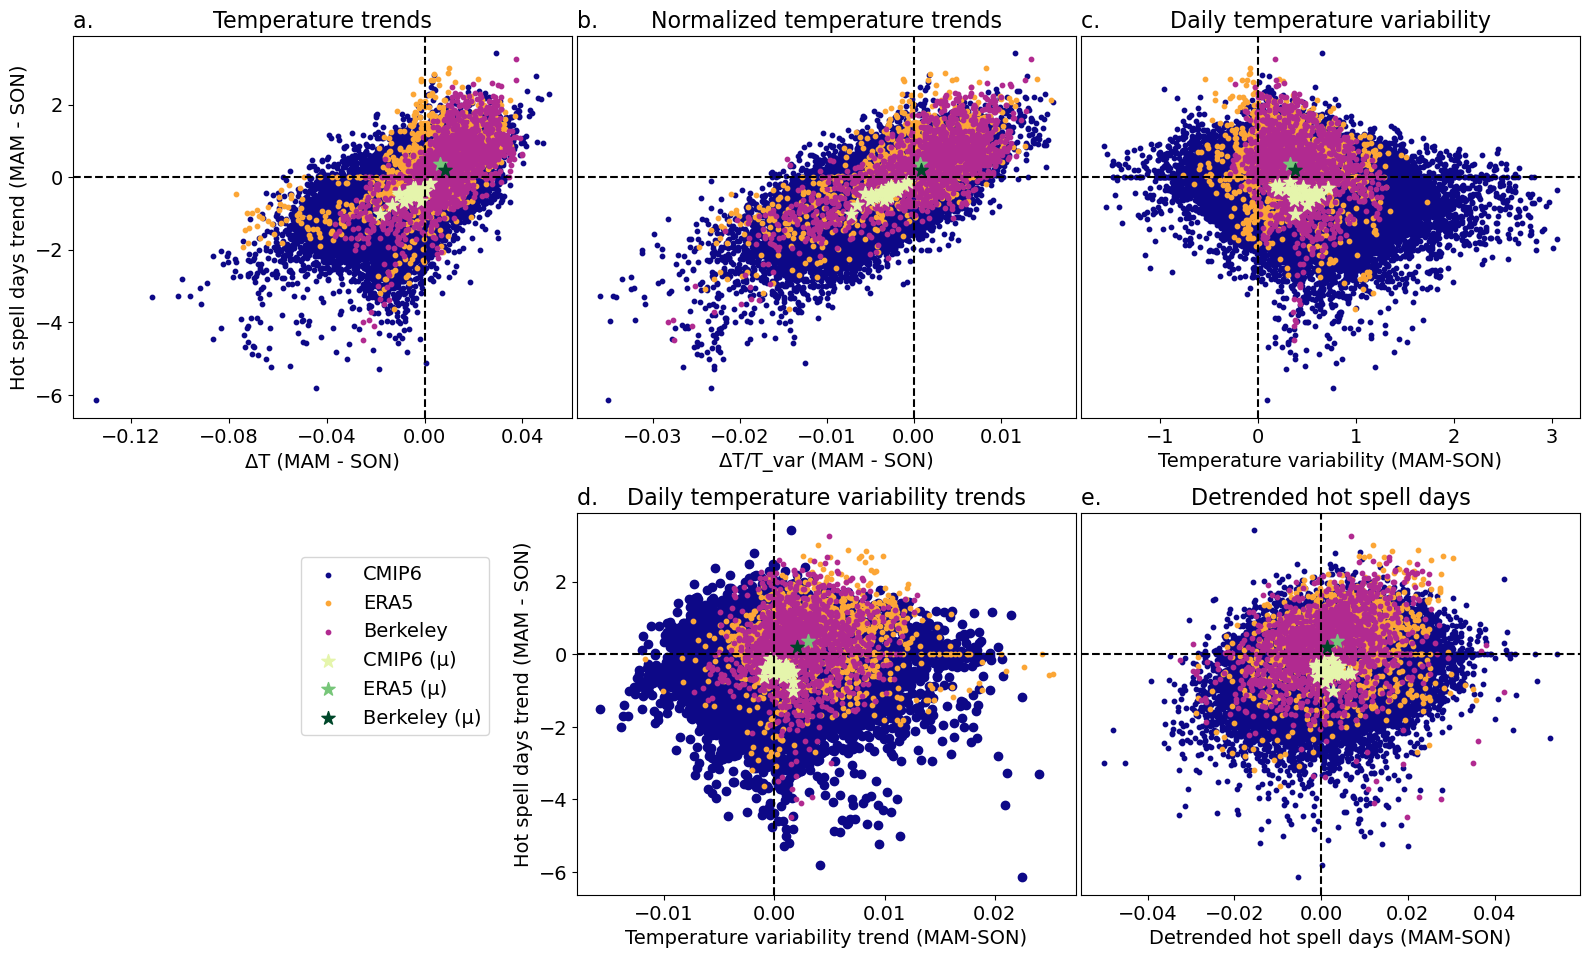

In [38]:
#plot
fig=plt.figure(figsize=(18,10))
plt.suptitle("Hotspell trend (MAM - SON) against different parameters (MAM - SON) ",x=0.05, ha='left', fontsize=14,fontweight='bold')
cmap = plt.get_cmap('plasma')
cmap2 = plt.get_cmap('YlGn')
nums=np.linspace(0,1,18)
# ax=fig.add_subplot(331)
# for i in range(18):
#     ax.scatter(xall.isel(models=i),yall.isel(models=i),c=cmap(nums[i]))
# ax.scatter(xeraall,yeraall,c='k')
# ax.scatter(xbkall,ybkall,c='0.05')

# #plot
# ## plot
fig=plt.figure(figsize=(16,10))
#plt.suptitle("Hotspell trend (MAM - SON) against different parameters (MAM - SON) ",x=0.05, ha='left', fontsize=14,fontweight='bold')

ax=fig.add_subplot(231)
for i in range(25):
    ax.scatter(xtmp_all.isel(models=i),10*yall.isel(models=i), s=10, alpha=1,c=cmap(0),label='CMIP6')
#ax.vlines(xtmp, ymin=10*ylow, ymax=10*yup, color=cmap(0.8),alpha=1, linestyle='--')


ax.scatter(xtmpera_all,10*yera_all,c=cmap(0.8), s=10, alpha=1, label='ERA5')
ax.scatter(xtmpbk_all,10*ybk_all,c=cmap(0.4), s=10, alpha=1, label='Berkeley')

ax.scatter(xtmp_weighted,10*y_weighted,marker='*', s=100,c=cmap2(0.2),label='CMIP6 (μ)')
ax.scatter(xtmpera_weighted,10*yera_weighted,marker='*', s=100,c=cmap2(0.5),label='ERA5 (μ)')
ax.scatter(xtmpbk_weighted,10*ybk_weighted,marker='*', s=100,c=cmap2(0.99),label='Berkeley (μ)')


ax.set_title('Temperature trends', fontsize=16)
ax.set_ylabel('Hot spell days trend (MAM - SON)', fontsize=14)
ax.set_xlabel(u'ΔT (MAM - SON)', fontsize=14)
ax.axhline(color='k', linestyle='--')
ax.axvline(color='k', linestyle='--')
ax.set_title(letters[0],loc='left',fontsize=16)

ax.set_xticks(np.arange(-0.12,0.05,0.04))

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

ax=fig.add_subplot(232)
for i in range(25):
    ax.scatter(xtmp_var_all.isel(models=i),10*yall.isel(models=i), s=10, alpha=1,c=cmap(0),label='CMIP6')
#ax.vlines(xtmp, ymin=10*ylow, ymax=10*yup, color=cmap(0.8),alpha=1, linestyle='--')

ax.scatter(xtmp_varera_all,10*yera_all,c=cmap(0.8), s=10, alpha=1, label='ERA5')

ax.scatter(xtmp_varbk_all,10*ybk_all,c=cmap(0.4), s=10, alpha=1, label='Berkeley')


ax.scatter(xtmp_var_weighted,10*yall.mean(dim='z'),marker='*', s=100,c=cmap2(0.2),label='CMIP6 (μ)')
ax.scatter(xtmp_varera_weighted,10*yera_weighted,marker='*', s=100,c=cmap2(0.5),label='ERA5 (μ)')
ax.scatter(xtmp_varbk_weighted,10*ybk_weighted,marker='*', s=100,c=cmap2(0.99),label='Berkeley (μ)')


ax.set_title('Normalized temperature trends', fontsize=16)
#ax.set_ylabel('Heatdays trend', fontsize=12)
ax.set_xlabel(u'ΔT/T_var (MAM - SON)', fontsize=14)
ax.axhline(color='k', linestyle='--')
ax.axvline(color='k', linestyle='--')
ax.set_yticks([])
ax.set_title(letters[1],loc='left',fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

ax=fig.add_subplot(233)
for i in range(25):
    ax.scatter(xvar_all.isel(models=i),10*yall.isel(models=i), s=10, alpha=1,c=cmap(0),label='CMIP6')#cmap(nums[i])
#ax.vlines(xtmp, ymin=10*ylow, ymax=10*yup, color=cmap(0.8),alpha=1, linestyle='--')


ax.scatter(xvarera_all,10*yera_all,c=cmap(0.8), s=10, alpha=1, label='ERA5')
ax.scatter(xvarbk_all,10*ybk_all,c=cmap(0.4), s=10, alpha=1, label='Berkeley')


ax.scatter(xvar_weighted,10*yall.mean(dim='z'),marker='*', s=100,c=cmap2(0.2),label='CMIP6 (μ)')
ax.scatter(xvarera_weighted,10*yera_weighted,marker='*', s=100,c=cmap2(0.5),label='ERA5 (μ)')
ax.scatter(xvarbk_weighted,10*ybk_weighted,marker='*', s=100,c=cmap2(0.99),label='Berkeley (μ)')

ax.set_title('Daily temperature variability', fontsize=16)
#ax.set_ylabel('Heatdays trend', fontsize=12)
ax.set_yticks([])
ax.set_xlabel('Temperature variability (MAM-SON)', fontsize=14)
ax.axhline(color='k', linestyle='--')
ax.axvline(color='k', linestyle='--')
ax.set_title(letters[2],loc='left',fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

ax=fig.add_subplot(235)
for i in range(18):
    ax.scatter(xvartr_all.isel(models=i),10*yall.isel(models=i),c=cmap(0),label='CMIP6')
#ax.vlines(xtmp, ymin=10*ylow, ymax=10*yup, color=cmap(0.8),alpha=1, linestyle='--')


ax.scatter(xvartrera_all,10*yera_all, s=10,c=cmap(0.8), label='ERA5')
ax.scatter(xvartrbk_all,10*ybk_all, s=10,c=cmap(0.4), label='Berkeley')

ax.scatter(xvartr_weighted,10*yall.mean(dim='z'),marker='*', s=100,c=cmap2(0.2),label='CMIP6 (μ)')
ax.scatter(xvartrera_weighted,10*yera_weighted,marker='*', s=100,c=cmap2(0.5),label='ERA5 (μ)')
ax.scatter(xvartrbk_weighted,10*ybk_weighted,marker='*', s=100,c=cmap2(0.99),label='Berkeley (μ)')


ax.set_title('Daily temperature variability trends' , fontsize=16)
#ax.set_ylabel('Heatdays trend', fontsize=12)


ax.set_xlabel('Temperature variability trend (MAM-SON)', fontsize=14)
ax.axhline(color='k', linestyle='--')
ax.axvline(color='k', linestyle='--')
ax.set_title(letters[3],loc='left',fontsize=16)
ax.set_ylabel('Hot spell days trend (MAM - SON)', fontsize=14)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

ax=fig.add_subplot(236)
for i in range(25):
    if i==0:
        ax.scatter(xdtclim_all.isel(models=i),10*yall.isel(models=i), s=10, alpha=1,c=cmap(0),label='CMIP6')
    else:
        ax.scatter(xdtclim_all.isel(models=i),10*yall.isel(models=i), s=10, alpha=1,c=cmap(0))
#ax.vlines(xtmp, ymin=10*ylow, ymax=10*yup, color=cmap(0.8),alpha=1, linestyle='--')


ax.scatter(xdtclim_era_all,10*yera_all,c=cmap(0.8), s=10,alpha=1, label='ERA5')
ax.scatter(xdtclim_bk_all,10*ybk_all,c=cmap(0.4), s=10,alpha=1, label='Berkeley')



ax.scatter(xdtclim_weighted,10*yall.mean(dim='z'),marker='*', s=100,c=cmap2(0.2),  label='CMIP6 (μ)')
ax.scatter(xdtclim_era_all.mean(dim='z'),10*yera_weighted,marker='*', s=100,c=cmap2(0.5),label='ERA5 (μ)')
ax.scatter(xdtclim_bk_all.mean(dim='z'),10*ybk_weighted,marker='*', s=100,c=cmap2(0.99),label='Berkeley (μ)')

ax.set_title(letters)
ax.set_title('Detrended hot spell days', fontsize=16)
ax.set_yticks([])

ax.set_xlabel('Detrended hot spell days (MAM-SON)', fontsize=14)
ax.axhline(color='k', linestyle='--')
ax.axvline(color='k', linestyle='--')
ax.set_title(letters[4],loc='left',fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

handles=[]
labels=[]
h, l = ax.get_legend_handles_labels()
handles.extend(h)
labels.extend(l)
fig.legend(handles, labels, loc='lower center', fontsize=14, bbox_to_anchor=(0.25, 0.25))  
plt.tight_layout()  
plt.subplots_adjust(hspace=0.25, wspace=0.01, bottom=0.1)

plt.savefig('plots_more/constraint_MAM-SON_weighted.png')
#plt.savefig('plots_sept/constraint_MAM-SON.png')


In [39]:
#cor
from scipy import stats

res = stats.pearsonr(xtmp_weighted,y_weighted)
print('vs tmp: ',res)


# res2 = stats.pearsonr(xtmp_sd, y)
# print('vs sd corrected tmp: ',res2)

res3 = stats.pearsonr(xtmp_var_weighted,y_weighted)
print('vs var corrected tmp: ',res3)

# res = stats.pearsonr(trseas_sd, y)
# print('vs sd: ',res)

res2 = stats.pearsonr(xvar_weighted,y_weighted)
print('vs var: ',res2)

# res3 = stats.pearsonr(xvartr, y)
# print('vs var trend: ',res3)

# res4 = stats.pearsonr(xdtclim, y)
# print('vs ht clim: ',res4)





vs tmp:  PearsonRResult(statistic=0.7717012268466972, pvalue=6.266841666157388e-06)
vs var corrected tmp:  PearsonRResult(statistic=0.8320409517113335, pvalue=2.52566769842292e-07)
vs var:  PearsonRResult(statistic=-0.13866896775066184, pvalue=0.5085780276050745)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

<Figure size 1800x1000 with 0 Axes>

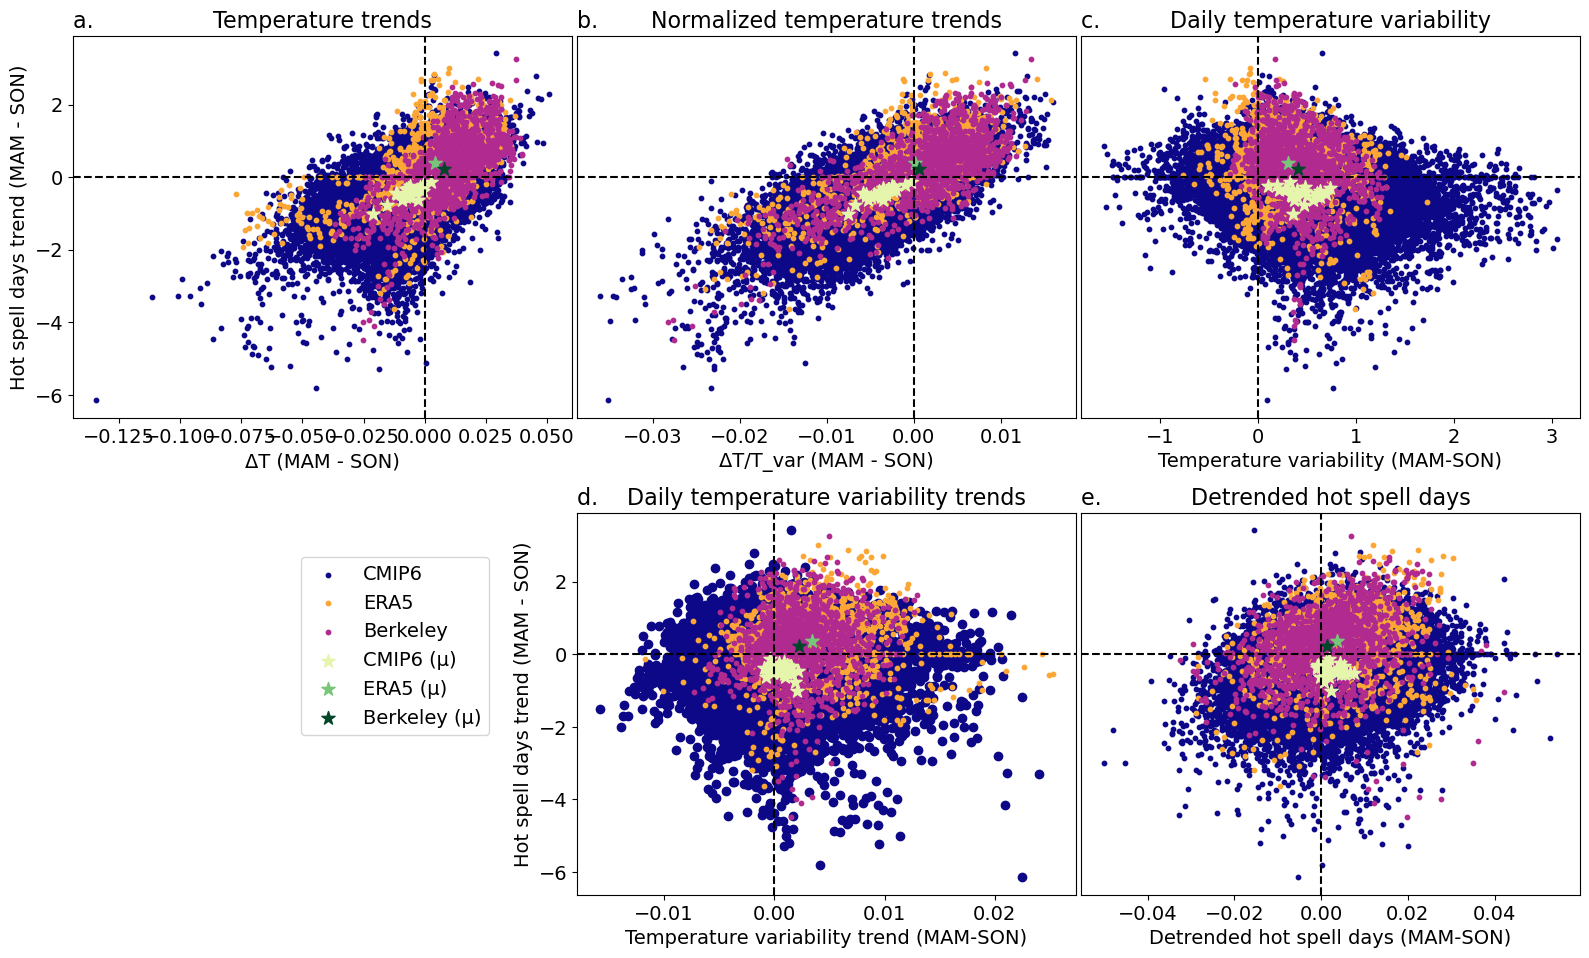

In [140]:
#plot
fig=plt.figure(figsize=(18,10))
plt.suptitle("Hotspell trend (MAM - SON) against different parameters (MAM - SON) ",x=0.05, ha='left', fontsize=14,fontweight='bold')
cmap = plt.get_cmap('plasma')
cmap2 = plt.get_cmap('YlGn')
nums=np.linspace(0,1,18)
# ax=fig.add_subplot(331)
# for i in range(18):
#     ax.scatter(xall.isel(models=i),yall.isel(models=i),c=cmap(nums[i]))
# ax.scatter(xeraall,yeraall,c='k')
# ax.scatter(xbkall,ybkall,c='0.05')

# #plot
# ## plot
fig=plt.figure(figsize=(16,10))
#plt.suptitle("Hotspell trend (MAM - SON) against different parameters (MAM - SON) ",x=0.05, ha='left', fontsize=14,fontweight='bold')

ax=fig.add_subplot(231)
for i in range(25):
    ax.scatter(xtmp_all.isel(models=i),10*yall.isel(models=i), s=10, alpha=1,c=cmap(0),label='CMIP6')
#ax.vlines(xtmp, ymin=10*ylow, ymax=10*yup, color=cmap(0.8),alpha=1, linestyle='--')


ax.scatter(xtmpera_all,10*yera_all,c=cmap(0.8), s=10, alpha=1, label='ERA5')
ax.scatter(xtmpbk_all,10*ybk_all,c=cmap(0.4), s=10, alpha=1, label='Berkeley')

ax.scatter(xtmp_all.mean(dim='z'),10*yall.mean(dim='z'),marker='*', s=100,c=cmap2(0.2),label='CMIP6 (μ)')
ax.scatter(xtmpera_all.mean(dim='z'),10*yera_all.mean(dim='z'),marker='*', s=100,c=cmap2(0.5),label='ERA5 (μ)')
ax.scatter(xtmpbk_all.mean(dim='z'),10*ybk_all.mean(dim='z'),marker='*', s=100,c=cmap2(0.99),label='Berkeley (μ)')


ax.set_title('Temperature trends', fontsize=16)
ax.set_ylabel('Hot spell days trend (MAM - SON)', fontsize=14)
ax.set_xlabel(u'ΔT (MAM - SON)', fontsize=14)
ax.axhline(color='k', linestyle='--')
ax.axvline(color='k', linestyle='--')
ax.set_title(letters[0],loc='left',fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

ax=fig.add_subplot(232)
for i in range(25):
    ax.scatter(xtmp_var_all.isel(models=i),10*yall.isel(models=i), s=10, alpha=1,c=cmap(0),label='CMIP6')
#ax.vlines(xtmp, ymin=10*ylow, ymax=10*yup, color=cmap(0.8),alpha=1, linestyle='--')

ax.scatter(xtmp_varera_all,10*yera_all,c=cmap(0.8), s=10, alpha=1, label='ERA5')

ax.scatter(xtmp_varbk_all,10*ybk_all,c=cmap(0.4), s=10, alpha=1, label='Berkeley')


ax.scatter(xtmp_var_all.mean(dim='z'),10*yall.mean(dim='z'),marker='*', s=100,c=cmap2(0.2),label='CMIP6 (μ)')
ax.scatter(xtmp_varera_all.mean(dim='z'),10*yera_all.mean(dim='z'),marker='*', s=100,c=cmap2(0.5),label='ERA5 (μ)')
ax.scatter(xtmp_varbk_all.mean(dim='z'),10*ybk_all.mean(dim='z'),marker='*', s=100,c=cmap2(0.99),label='Berkeley (μ)')


ax.set_title('Normalized temperature trends', fontsize=16)
#ax.set_ylabel('Heatdays trend', fontsize=12)
ax.set_xlabel(u'ΔT/T_var (MAM - SON)', fontsize=14)
ax.axhline(color='k', linestyle='--')
ax.axvline(color='k', linestyle='--')
ax.set_yticks([])
ax.set_title(letters[1],loc='left',fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

ax=fig.add_subplot(233)
for i in range(25):
    ax.scatter(xvar_all.isel(models=i),10*yall.isel(models=i), s=10, alpha=1,c=cmap(0),label='CMIP6')#cmap(nums[i])
#ax.vlines(xtmp, ymin=10*ylow, ymax=10*yup, color=cmap(0.8),alpha=1, linestyle='--')


ax.scatter(xvarera_all,10*yera_all,c=cmap(0.8), s=10, alpha=1, label='ERA5')
ax.scatter(xvarbk_all,10*ybk_all,c=cmap(0.4), s=10, alpha=1, label='Berkeley')


ax.scatter(xvar_all.mean(dim='z'),10*yall.mean(dim='z'),marker='*', s=100,c=cmap2(0.2),label='CMIP6 (μ)')
ax.scatter(xvarera_all.mean(dim='z'),10*yera_all.mean(dim='z'),marker='*', s=100,c=cmap2(0.5),label='ERA5 (μ)')
ax.scatter(xvarbk_all.mean(dim='z'),10*ybk_all.mean(dim='z'),marker='*', s=100,c=cmap2(0.99),label='Berkeley (μ)')

ax.set_title('Daily temperature variability', fontsize=16)
#ax.set_ylabel('Heatdays trend', fontsize=12)
ax.set_yticks([])
ax.set_xlabel('Temperature variability (MAM-SON)', fontsize=14)
ax.axhline(color='k', linestyle='--')
ax.axvline(color='k', linestyle='--')
ax.set_title(letters[2],loc='left',fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

ax=fig.add_subplot(235)
for i in range(18):
    ax.scatter(xvartr_all.isel(models=i),10*yall.isel(models=i),c=cmap(0),label='CMIP6')
#ax.vlines(xtmp, ymin=10*ylow, ymax=10*yup, color=cmap(0.8),alpha=1, linestyle='--')


ax.scatter(xvartrera_all,10*yera_all, s=10,c=cmap(0.8), label='ERA5')
ax.scatter(xvartrbk_all,10*ybk_all, s=10,c=cmap(0.4), label='Berkeley')

ax.scatter(xvartr_all.mean(dim='z'),10*yall.mean(dim='z'),marker='*', s=100,c=cmap2(0.2),label='CMIP6 (μ)')
ax.scatter(xvartrera_all.mean(dim='z'),10*yera_all.mean(dim='z'),marker='*', s=100,c=cmap2(0.5),label='ERA5 (μ)')
ax.scatter(xvartrbk_all.mean(dim='z'),10*ybk_all.mean(dim='z'),marker='*', s=100,c=cmap2(0.99),label='Berkeley (μ)')


ax.set_title('Daily temperature variability trends' , fontsize=16)
#ax.set_ylabel('Heatdays trend', fontsize=12)


ax.set_xlabel('Temperature variability trend (MAM-SON)', fontsize=14)
ax.axhline(color='k', linestyle='--')
ax.axvline(color='k', linestyle='--')
ax.set_title(letters[3],loc='left',fontsize=16)
ax.set_ylabel('Hot spell days trend (MAM - SON)', fontsize=14)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

ax=fig.add_subplot(236)
for i in range(25):
    if i==0:
        ax.scatter(xdtclim_all.isel(models=i),10*yall.isel(models=i), s=10, alpha=1,c=cmap(0),label='CMIP6')
    else:
        ax.scatter(xdtclim_all.isel(models=i),10*yall.isel(models=i), s=10, alpha=1,c=cmap(0))
#ax.vlines(xtmp, ymin=10*ylow, ymax=10*yup, color=cmap(0.8),alpha=1, linestyle='--')


ax.scatter(xdtclim_era_all,10*yera_all,c=cmap(0.8), s=10,alpha=1, label='ERA5')
ax.scatter(xdtclim_bk_all,10*ybk_all,c=cmap(0.4), s=10,alpha=1, label='Berkeley')



ax.scatter(xdtclim_all.mean(dim='z'),10*yall.mean(dim='z'),marker='*', s=100,c=cmap2(0.2),  label='CMIP6 (μ)')
ax.scatter(xdtclim_era_all.mean(dim='z'),10*yera_all.mean(dim='z'),marker='*', s=100,c=cmap2(0.5),label='ERA5 (μ)')
ax.scatter(xdtclim_bk_all.mean(dim='z'),10*ybk_all.mean(dim='z'),marker='*', s=100,c=cmap2(0.99),label='Berkeley (μ)')

ax.set_title(letters)
ax.set_title('Detrended hot spell days', fontsize=16)
ax.set_yticks([])

ax.set_xlabel('Detrended hot spell days (MAM-SON)', fontsize=14)
ax.axhline(color='k', linestyle='--')
ax.axvline(color='k', linestyle='--')
ax.set_title(letters[4],loc='left',fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

handles=[]
labels=[]
h, l = ax.get_legend_handles_labels()
handles.extend(h)
labels.extend(l)
fig.legend(handles, labels, loc='lower center', fontsize=14, bbox_to_anchor=(0.25, 0.25))  
plt.tight_layout()  
plt.subplots_adjust(hspace=0.25, wspace=0.01, bottom=0.1)

plt.savefig('plots_more/constraint_MAM-SON_grid.png')
#plt.savefig('plots_sept/constraint_MAM-SON.png')


In [90]:
#cor
from scipy import stats

res = stats.pearsonr(xtmp, y)
print('vs tmp: ',res)


# res2 = stats.pearsonr(xtmp_sd, y)
# print('vs sd corrected tmp: ',res2)

res3 = stats.pearsonr(xtmp_var, y)
print('vs var corrected tmp: ',res3)

# res = stats.pearsonr(trseas_sd, y)
# print('vs sd: ',res)

res2 = stats.pearsonr(xvar, y)
print('vs var: ',res2)

# res3 = stats.pearsonr(xvartr, y)
# print('vs var trend: ',res3)

# res4 = stats.pearsonr(xdtclim, y)
# print('vs ht clim: ',res4)





vs tmp:  PearsonRResult(statistic=0.7685855832543317, pvalue=0.00019411439471374092)
vs var corrected tmp:  PearsonRResult(statistic=0.854862989996208, pvalue=6.214483353994704e-06)
vs var:  PearsonRResult(statistic=-0.18839871948516052, pvalue=0.4540571125360925)


In [163]:
#cor
from scipy import stats

res = stats.pearsonr(xtmp_all.mean(dim='z'),yall.mean(dim='z'))
print('vs tmp: ',res)


# res2 = stats.pearsonr(xtmp_sd, y)
# print('vs sd corrected tmp: ',res2)

res3 = stats.pearsonr(xtmp_var_all.mean(dim='z'),yall.mean(dim='z'))
print('vs var corrected tmp: ',res3)

# res = stats.pearsonr(trseas_sd, y)
# print('vs sd: ',res)

res2 = stats.pearsonr(xvar_all.mean(dim='z'),yall.mean(dim='z'))
print('vs var: ',res2)

# res3 = stats.pearsonr(xvartr, y)
# print('vs var trend: ',res3)

# res4 = stats.pearsonr(xdtclim, y)
# print('vs ht clim: ',res4)





vs tmp:  PearsonRResult(statistic=0.7738602888508728, pvalue=5.683368506851281e-06)
vs var corrected tmp:  PearsonRResult(statistic=0.8513516931923493, pvalue=6.852187169102579e-08)
vs var:  PearsonRResult(statistic=-0.21398296533609484, pvalue=0.304374390009861)


In [ ]:
ax.scatter(xtmp_all.mean(dim='z'),10*yall.mean(dim='z'),marker='*', s=100,c=cmap2(0.2),label='CMIP6 (μ)')
ax.scatter(xtmpera_all.mean(dim='z'),10*yera_all.mean(dim='z'),marker='*', s=100,c=cmap2(0.5),label='ERA5 (μ)')
ax.scatter(xtmpbk_all.mean(dim='z'),10*yera_all.mean(dim='z'),marker='*', s=100,c=cmap2(0.99),label='Berkeley (μ)')

In [164]:
print('ERA5: ',stats.pearsonr(xtmpera_all.dropna(dim='z'), yera_all.dropna(dim='z')))
print('BK: ',stats.pearsonr(xtmpbk_all.dropna(dim='z'), ybk_all.dropna(dim='z')))
sttmp=[]
for i in range(1,25):
    r,p=stats.pearsonr(xtmp_all.isel(models=i).dropna(dim='z'), yall.isel(models=i).dropna(dim='z'))
    print(r,p)
    sttmp.append(r)

ERA5:  PearsonRResult(statistic=0.5651908512940658, pvalue=1.3818141044682534e-124)
BK:  PearsonRResult(statistic=0.6804302137541891, pvalue=5.0200457380685974e-200)
0.5312348693457644 1.2906051301530557e-107
0.3718055191628754 2.61538199455925e-49
0.4885858054101838 7.277619997128668e-89
0.7254273419478788 6.329444459047735e-240
0.5811817385593159 2.7667943929275986e-133
0.56242522802524 3.953499612408914e-123
0.5549812692139305 2.816990533274311e-119
0.2813235021559208 4.336848763108815e-28
0.5739144416335374 2.8483058369920125e-129
0.5683176441731694 2.9992443422786065e-126
0.3985256040998095 4.9782794728175886e-57
0.6833251132826267 2.246590179378692e-202
0.6637944008250495 4.899573562516996e-187
0.7272254049881672 1.100375756304451e-241
0.524004006940613 3.023942769228353e-104
0.6523856154579424 1.3327325905585264e-178
0.33292502503558175 2.6447134950083464e-39
0.729194992536967 1.2519197154839395e-243
0.38063783208086027 8.802585286859214e-52
0.501989225458536 1.7914234565013566e

In [165]:
print('ERA5: ',stats.pearsonr(xtmp_varera_all.dropna(dim='z'), yera_all.dropna(dim='z')))
print('BK: ',stats.pearsonr(xtmp_varbk_all.dropna(dim='z'), ybk_all.dropna(dim='z')))
sttmpvar=[]
for i in range(25):
    r,p=stats.pearsonr(xtmp_var_all.isel(models=i).dropna(dim='z'), yall.isel(models=i).dropna(dim='z'))
    print(r,p)
    sttmpvar.append(r)

ERA5:  PearsonRResult(statistic=0.6993624629719092, pvalue=6.684885985329558e-216)
BK:  PearsonRResult(statistic=0.7483659579792454, pvalue=1.7233449513727965e-263)
0.5722970531956594 2.157780983884193e-128
0.6897753129252095 1.0412570553303972e-207
0.4413751248279319 5.529572840111626e-71
0.7703074961652958 1.4716559939790409e-288
0.7979161971807363 0.0
0.6999237140650925 2.164464740741073e-216
0.6829405982723122 4.625178933916106e-202
0.7233896285166526 6.0096324985027556e-238
0.36162329424341155 1.4941788658987323e-46
0.662822977741735 2.6475482146544246e-186
0.6927753019524745 3.080663941107345e-210
0.5392477115619265 1.9049018323872606e-111
0.7007979509717496 3.717158558754035e-217
0.7262052877099202 1.100755619237089e-240
0.7394837931805586 4.5358462700536934e-254
0.6293586432162925 1.2037550958113247e-162
0.7353190865607677 8.748064550912897e-250
0.5501055830747568 8.336364199802525e-117
0.7985319306026447 0.0
0.5945511626465312 6.166695821973919e-141
0.6106482727541165 1.219755

In [167]:
print('ERA5: ',stats.pearsonr(xvarera_all.dropna(dim='z'), yera_all.dropna(dim='z')))
print('BK: ',stats.pearsonr(xvarbk_all.dropna(dim='z'), ybk_all.dropna(dim='z')))
stvarvar=[]
for i in range(25):
    r,p=stats.pearsonr(xvar_all.isel(models=i).dropna(dim='z'), yall.isel(models=i).dropna(dim='z'))
    print(r,p)
    stvarvar.append(r)

ERA5:  PearsonRResult(statistic=-0.16856121979040592, pvalue=8.184203378061229e-11)
BK:  PearsonRResult(statistic=-0.22524207682297065, pvalue=2.4979439725124585e-18)
-0.09691384951715919 0.00020118084998864156
-0.38270416884831876 2.2643412962730703e-52
-0.2061013098768544 1.548752805229732e-15
-0.414345506641209 6.018196672455658e-62
0.02698375388425452 0.3016864593903021
-0.2877077421692193 2.3447745463813052e-29
-0.46778017486031503 1.2267122159887306e-80
-0.21151382614134806 2.674248446219866e-16
-0.08160100309055758 0.0017600677763729164
-0.11736577181897251 6.574126530451622e-06
-0.16527794137716725 1.904698402063855e-10
-0.29481900610010664 8.311214527699286e-31
-0.052814634534769485 0.043118152477162254
-0.16430825213687195 2.4365485847104046e-10
-0.3490017875708872 2.853552473373506e-43
-0.20758927595596066 9.602321123132905e-16
-0.050641259603493645 0.05247408061110499
-0.29603684739021263 4.646246850556814e-31
-0.2983150545535251 1.5536097326087236e-31
-0.19352121843865672 

In [169]:
print(np.array(sttmp).mean())
print(np.array(sttmpvar).mean())
print(np.array(stvarvar).mean())

0.5257634337412197
0.6456842321995596
-0.20083733329322942


In [ ]:
# PLOT all toogether

# Future

In [170]:
#models
###'HadGEM3-GC31-MM'
models1=['ACCESS-CM2','AWI-CM-1-1-MR','BCC-CSM2-MR', 'CanESM5','CESM2','CMCC-ESM2','CNRM-ESM2-1','EC-Earth3-CC','GFDL-ESM4','IITM-ESM','INM-CM5-0','KIOST-ESM','MIROC6','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','NorESM2-MM','TaiESM1']# temp_datcut={}
models22=['CESM2-WACCM', 'CMCC-CM2-SR5', 'CNRM-CM6-1','INM-CM4-8','IPSL-CM6A-LR', 'MIROC-ES2L','CNRM-CM6-1-HR']
models=models1+models22#['ACCESS-CM2','AWI-CM-1-1-MR','BCC-CSM2-MR', 'CanESM5','CESM2', 'CESM2-WACCM','CMCC-ESM2', 'CMCC-CM2-SR5','CNRM-ESM2-1', 'CNRM-CM6-1', 'CNRM-CM6-1-HR','EC-Earth3-CC','GFDL-ESM4','IITM-ESM','INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR','KIOST-ESM','MIROC6', 'MIROC-ES2L','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','NorESM2-MM','TaiESM1']
len(models)

25

In [141]:
#trend
trseas_heatfut=xr.open_dataset('cmip6_heat_fut_mktrends.nc').tas
pvseas_heatfut=xr.open_dataset('cmip6_heat_fut_mkpvals.nc').tas

In [142]:
#sum for seasonal
count_days=[90,92,92,91]


cmipfut_seas=trseas_heatfut.copy()
for i in range(4):
    cmipfut_seas[i,]=count_days[i]*trseas_heatfut[i,]

In [143]:
#lat vatiations

#lat vatiations seasondev
trseas_heat=cmiptr_seas.copy(deep=True)

trend_annual_mn2=trseas_heat.mean(dim='season')


trend_ann_cmip=trend_annual_mn2.mean(dim='longitude')*10
trend_dif_cmip=((trseas_heat-trend_annual_mn2).mean(dim='longitude'))*10
trend_dif_cmip_mean=trend_dif_cmip.mean(dim='models')
trend_dif_cmip_upper=trend_dif_cmip.quantile(0.975,dim='models')
trend_dif_cmip_lower=trend_dif_cmip.quantile(0.025,dim='models')

trend_annual_mnfut2=cmipfut_seas.mean(dim='season')

trend_dif_cmipfut=cmipfut_seas.mean(dim='longitude')-trend_annual_mnfut2.mean(dim='longitude')
trend_dif_cmipfut_mean=trend_dif_cmipfut.mean(dim='models')
trend_dif_cmipfut_upper=trend_dif_cmipfut.quantile(0.975,dim='models')
trend_dif_cmipfut_lower=trend_dif_cmipfut.quantile(0.025,dim='models')



In [145]:
#trends
trseas_tmpfut=xr.open_dataset('cmip6_tmean_trend_final_2030-2099.nc').tas
pvseas_tmpfut=xr.open_dataset('cmip6_tmean_trendpvals_final_2030-2099.nc').tas

In [146]:
#lat var corrected
hist_trendnorm=trseas_heat/trseas_tmp.mean()

clim_annual_mn2=hist_trendnorm.mean(dim='season')


clim_dif_hist=hist_trendnorm.mean(dim='longitude')/clim_annual_mn2.mean(dim='longitude')
clim_dif_hist_mean_cor=clim_dif_hist.mean(dim='models')
clim_dif_hist_upper_cor=clim_dif_hist.quantile(0.975,dim='models')
clim_dif_hist_lower_cor=clim_dif_hist.quantile(0.025,dim='models')

In [147]:
#lat var corrected
fut_trendnorm=trseas_heatfut/trseas_tmpfut.mean()

clim_annual_mnfut=fut_trendnorm.mean(dim='season')


clim_dif_fut=fut_trendnorm.mean(dim='longitude')/clim_annual_mnfut.mean(dim='longitude')
clim_dif_fut_mean_cor=clim_dif_fut.mean(dim='models')
clim_dif_fut_upper_cor=clim_dif_fut.quantile(0.975,dim='models')
clim_dif_fut_lower_cor=clim_dif_fut.quantile(0.025,dim='models')

In [148]:
#latvar corrected
#lat vatiations seasondev


trseas_heat=10*cmiptr_seas.copy(deep=True)
# trseasera_heat=eratr_seas.copy(deep=True)
# trseasbk_heat=bktr_seas.copy(deep=True)


trend_annual_mn2=trseas_heat.mean(dim='season')

trend_ann_cmip=trend_annual_mn2.mean(dim='longitude')
trend_dif_cmip=((trseas_heat-trend_annual_mn2).mean(dim='longitude'))
trend_dif_cmip_mean=trend_dif_cmip.mean(dim='models')
trend_dif_cmip_upper=trend_dif_cmip.quantile(0.975,dim='models')
trend_dif_cmip_lower=trend_dif_cmip.quantile(0.025,dim='models')

#lat vatiations
trseasfut_heat=10*cmipfut_seas.copy(deep=True)
trend_annual_mnfut2=trseasfut_heat.mean(dim='season')

trend_dif_cmipfut=((trseasfut_heat-trend_annual_mnfut2).mean(dim='longitude'))
trend_dif_cmipfut_mean=trend_dif_cmipfut.mean(dim='models')
trend_dif_cmipfut_upper=trend_dif_cmipfut.quantile(0.975,dim='models')
trend_dif_cmipfut_lower=trend_dif_cmipfut.quantile(0.025,dim='models')

In [ ]:
#plot
import matplotlib.ticker as mticker
titles=trseas_tmpfut.season.values
#map_plotter(dats,2,2,4,titles,cmap='Reds',vmax=0.05,height=5)

fig=plt.figure(figsize=(16,7))
numplots=np.arange(1,5)
#gs = fig.add_gridspec(5,4)
order=np.array([0,2,1,3])

for i in range (4):
    if i ==0:
        ax=fig.add_axes([0.2,0.75,0.37,0.3],projection=ccrs.PlateCarree())
    elif i ==1:
        ax=fig.add_axes([0.2,0.58,0.37,0.3],projection=ccrs.PlateCarree())
    elif i ==2:
        ax=fig.add_axes([0.2,0.41,0.37,0.3],projection=ccrs.PlateCarree())
    else:
        ax=fig.add_axes([0.2,0.24,0.37,0.3],projection=ccrs.PlateCarree())

    pvs=xr.where(cmipfut_seas.isel(season=order[i])>0,1,0) 
    pval=xr.where(pvs.mean(dim='models')>0.8,cmipfut_seas.isel(season=order[i]),np.nan) 
    m=(10*pval.mean(dim='models')).plot(ax=ax, vmax=12,vmin=0,cmap='Reds',transform=ccrs.PlateCarree(),add_colorbar=False)
#         else:
#             dats[i].plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal'})

    ax.set_ylabel(titles[i])
    ax.yaxis.set_label_coords(0.1,0.75)
    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, dms=True, x_inline=False, y_inline=False,color = "None")
    gl.ylocator = mticker.FixedLocator([ 30, 50, 70])
    gl.xlocator = mticker.FixedLocator([ -140, -70, 0, 70, 140])
    gl.top_labels = False
    gl.right_labels = False
    
#     gl.ylabels_rit2mt = False
    gl.xlabel_style = {'size': 14}
    gl.ylabel_style = {'size': 14}
    ax.coastlines()
    if i==0:
        ax.set_title('CMIP6 2030-2099 hot spell trends',fontsize=16, y=0.97)
    else:
        ax.set_title('')
    ax.set_title(letters[3*i],loc='left',fontsize=16, y=0.97)
    ax.text(-0.12, 0.55, titles[order[i]], va='bottom', ha='center',rotation='vertical', rotation_mode='anchor',transform=ax.transAxes, fontsize=14)
#
#     if titles.any():
#         ax.set_title('CMIP6 Future '+titles[i])
    if i<3:
        gl.bottom_labels = False
        

   
    if i ==0:
        ax=fig.add_axes([0.6,0.84,0.14,0.125])
    elif i ==1:
        ax=fig.add_axes([0.6,0.67,0.14,0.125])
    elif i ==2:
        ax=fig.add_axes([0.6,0.5,0.14,0.125])
    else:
        ax=fig.add_axes([0.6,0.33,0.14,0.125])

        #ax.set_yticks([])
    #ax.set_title(letters[3*i+1],loc='left',fontsize=12, y=0.97)
        
    lat=trend_dif_cmip_mean.latitude
    ax.plot(trend_dif_cmipfut_mean.isel(season=order[i]),lat,  color='blue', label='Future')
    ax.plot(trend_dif_cmipfut_upper.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.plot(trend_dif_cmipfut_lower.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.fill_betweenx(lat,trend_dif_cmipfut_lower.isel(season=order[i]), trend_dif_cmipfut_upper.isel(season=order[i]), color='lightblue', alpha=0.5)
    ax.axvline(0,color='k')
    ax.plot(trend_dif_cmip_mean.isel(season=order[i]),lat, color='black',linestyle='--', label='Historical')

    ax.set_xlim([-6,6])
    ax.set_ylabel('')
    ax.set_yticks([30,50,70])
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if i==0 or i==2:
        ax.set_xticks([])
    
#     if i==3:
#         plt.legend()
    ax.set_title(letters[3*i+1],loc='left',fontsize=16, y=0.97)
    
    if i==0:
        ax.set_title('Seasonal',fontsize=16, y=0.97)
    if i<3:
        ax.set_xticks([])

    else:
        ax.set_xticks(np.arange(-2.5,7.5,2.5))
        ax.set_xticklabels(['-2.5','0','2.5','5'])
        ax.set_xlabel('minus annual mean', fontsize=14)
        #ax.set_xlabel('hot spell trend per decade', fontsize=12)
    
    if i==0:
        ax=fig.add_axes([0.75,0.84,0.14,0.125])
    elif i==1:
        ax=fig.add_axes([0.75,0.67,0.14,0.125])

    elif i==2:
        ax=fig.add_axes([0.75,0.5,0.14,0.125])
        #ax.set_yticks([])
    else:
        ax=fig.add_axes([0.75,0.33,0.14,0.125])
        
    lat=trend_dif_cmip_mean.latitude
    ax.plot(clim_dif_fut_mean_cor.isel(season=order[i]),lat,  color='blue', label='Future')
    ax.plot(clim_dif_fut_upper_cor.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.plot(clim_dif_fut_lower_cor.isel(season=order[i]),lat,linestyle='--', color='0.8')
    ax.fill_betweenx(lat,clim_dif_fut_lower_cor.isel(season=order[i]), clim_dif_fut_upper_cor.isel(season=order[i]), color='lightblue', alpha=0.5)
    ax.axvline(1,color='k')
    ax.plot(clim_dif_hist_mean_cor.isel(season=order[i]),lat, color='black',linestyle='--', label='Historical')

    ax.set_xlim([0,2])
    ax.set_ylabel('')
    ax.set_yticks([])
    
#     if i==0 or i==2:
#         ax.set_xticks([])
    
#     if i==3:
#         plt.legend()
    ax.set_title(letters[3*i+2],loc='left',fontsize=16, y=0.97)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if i==0:
        ax.set_title('Normalized',fontsize=16, y=0.97)
    if i<3:
        ax.set_xticks([])
    else:
        ax.set_xticks(np.arange(0,2.5,0.5))
        #ax.set_xticklabels(['-0.04','0','0.04','0.08'])
        #ax.set_xticklabels(np.arange(-0.8,1.2,0.4))
        #ax.set_xlabel('hot spell cmip per degree warming', fontsize=12)
      
    if i==3:
        plt.legend(title='hot spell days trend per season per decade', title_fontsize=14,loc='lower left',ncol=3, bbox_to_anchor=(-1, -1.45), fontsize=13)
        ax.set_xlabel('ratio to annual mean', fontsize=14)
    
cbar_ax = fig.add_axes([0.25, 0.25, 0.28, 0.02])
cbl=fig.colorbar(m, cax=cbar_ax, extend='max',orientation='horizontal')
cbl.set_label(label="hot spell days trend per season per decade",size=14)
# cbl.ax.tick_params(labelsize=12)
#plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.15, bottom=0.28)

# plt.tight_layout()
plt.savefig('plots_more/Future_trends_main.png')
plt.show()